In [1]:
import numpy as np
import random as rd
import tensorflow as tf

from keras.layers import Dense, Embedding, Flatten, Input
from keras.models import Model
from keras.optimizers import RMSprop

#Import another jupyter notebook
import import_ipynb
from AttentionLayer import *
from Productive_CrossValidation_inclTest import *
from Productive_Data_GetTrainTest import samEval

C:\Users\twitter\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


importing Jupyter notebook from AttentionLayer.ipynb
importing Jupyter notebook from Productive_CrossValidation_inclTest.ipynb
importing Jupyter notebook from Productive_TimeHistory.ipynb
importing Jupyter notebook from Productive_Data_GetTrainTest.ipynb


In [2]:
#for reproducability of the results
seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
rd.seed(seed)

In [3]:
path = 'data/'
outputpath ='outputs/02_epochs_samEval2018/'

In [4]:
#Load necessary data
train_data, train_labels, test_data, test_labels, word_index, MAX_SEQUENCE_LENGTH = samEval()

In [5]:
#Load pretrained embeddings
import gensim
from gensim.models import KeyedVectors

#Pretrained Google News Embeddings, Dimension 300
GOOGLEEMB = path + 'GoogleNews-vectors-negative300.bin'

embedding= KeyedVectors.load_word2vec_format(GOOGLEEMB, binary=True)

word_vectors = embedding.wv

C:\Users\twitter\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


In [6]:
#Create embedding-matrix, serves the Keras Embedding Layer as weigths
EMBEDDING_DIM=300

embedding_matrix = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

## Hyperparameter for all models

In [7]:
BATCH_SIZE = 64
softmax = True
optimizer = RMSprop(lr=0.001, rho = 0.9, epsilon = 0.0000001)
lossfunction ='binary_crossentropy'

Instructions for updating:
Colocations handled automatically by placer.


## MLP with one hidden layer, 600 neurons

In [8]:
wv_layer = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

#Input Layer
comment_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences = wv_layer(comment_input)

#First Dense Layer
x = Dense(600, activation='relu')(embedded_sequences)

x = Flatten()(x)

#Output (Dense) Layer
preds = Dense(2, activation='softmax')(x)

# build the model
model = Model(inputs=[comment_input], outputs=preds)

## Train the model within the parameter space

Instructions for updating:
Use tf.cast instead.

-----Fold 1--------


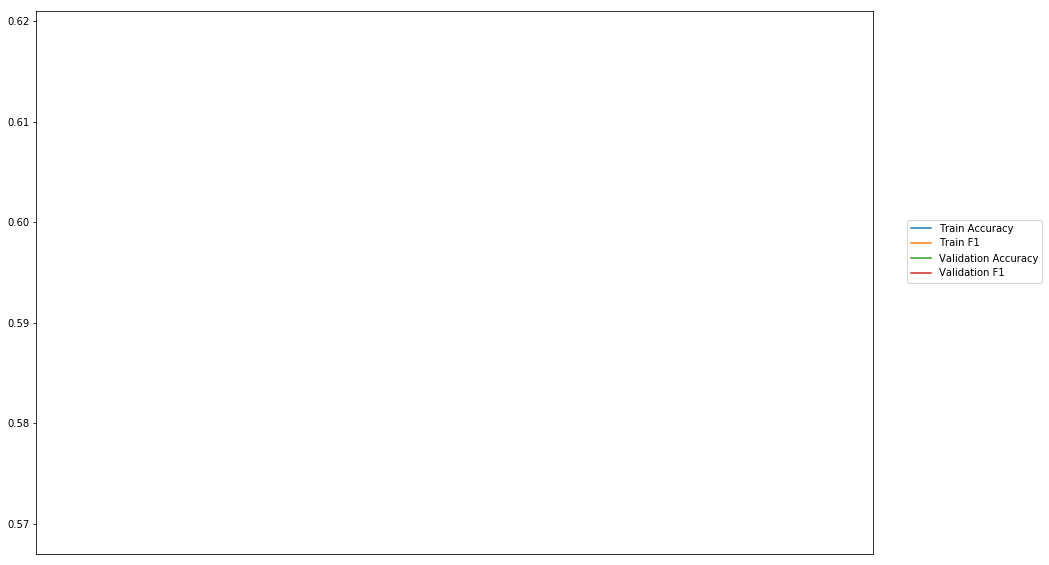

Average Accuracy: 61.56%
Average Precision: 61.22%
Average Recall: 62.50%
Average F1: 61.86%

-----Fold 2--------


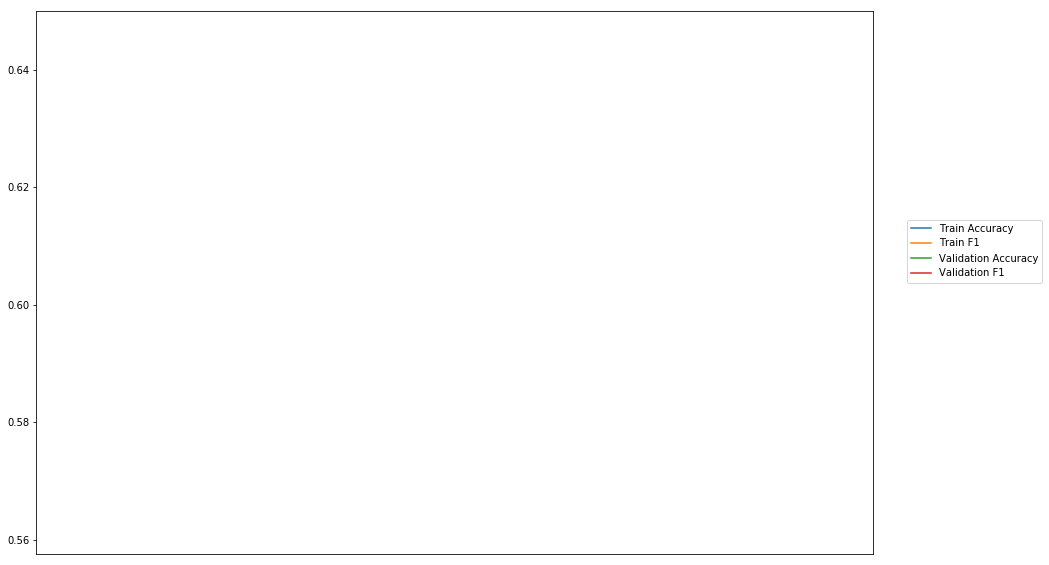

Average Accuracy: 64.58%
Average Precision: 66.67%
Average Recall: 57.59%
Average F1: 61.80%

-----Fold 3--------


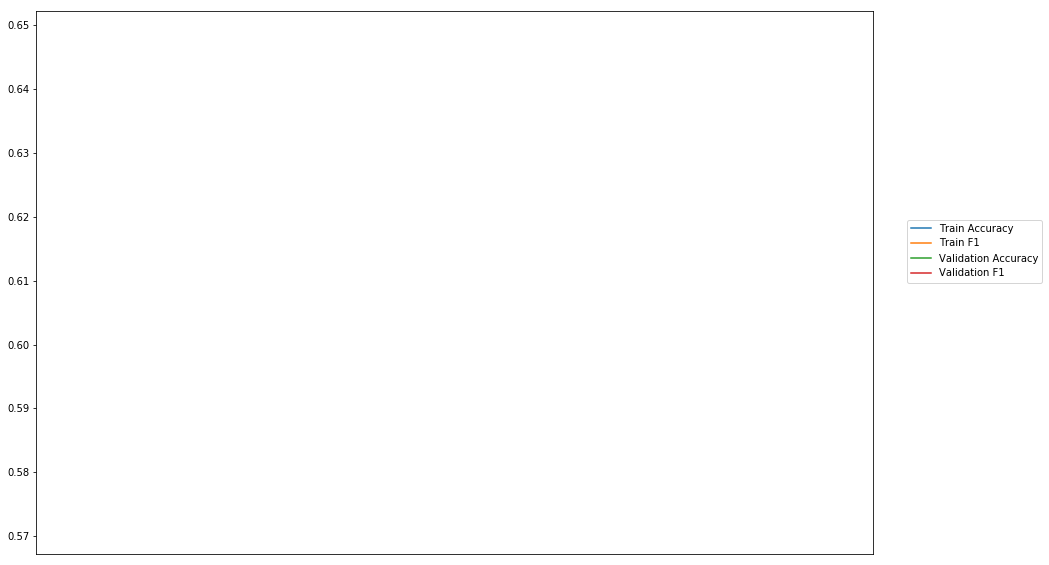

Average Accuracy: 64.84%
Average Precision: 66.47%
Average Recall: 59.16%
Average F1: 62.60%

-----Fold 4--------


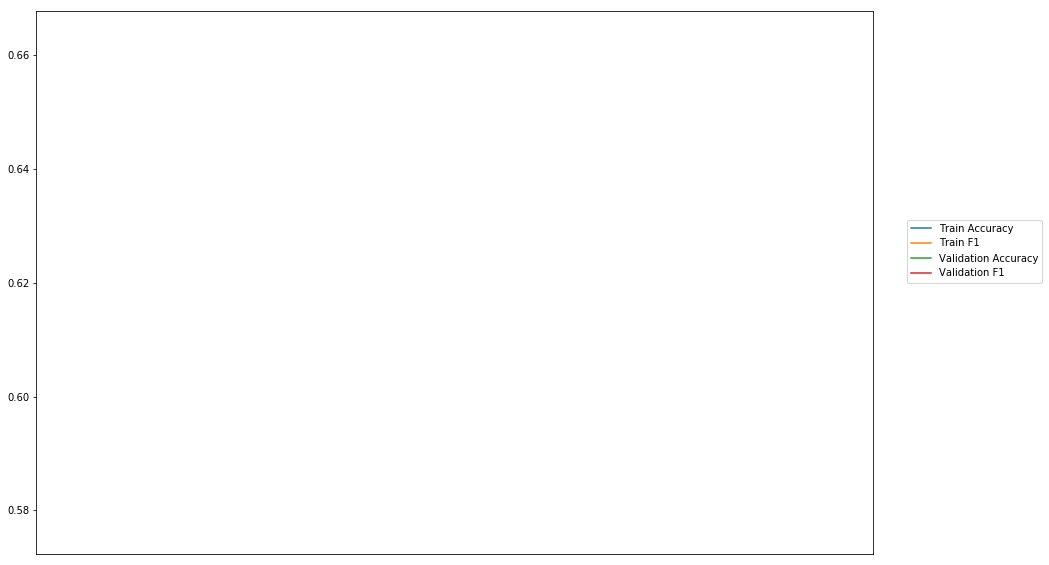

Average Accuracy: 63.45%
Average Precision: 61.33%
Average Recall: 72.25%
Average F1: 66.35%

-----Fold 5--------


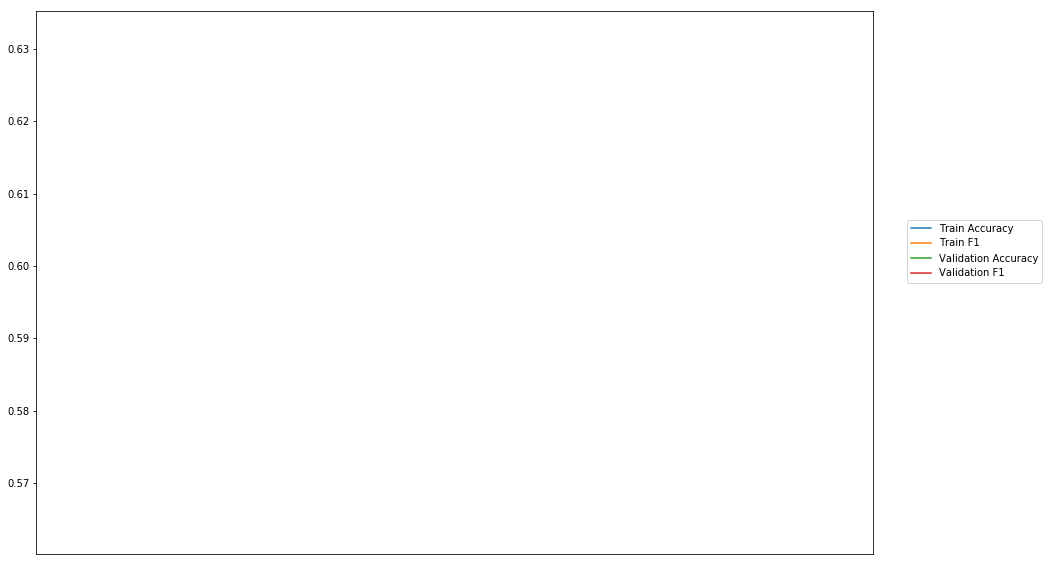

Average Accuracy: 63.19%
Average Precision: 63.30%
Average Recall: 62.30%
Average F1: 62.80%

-----Fold 6--------


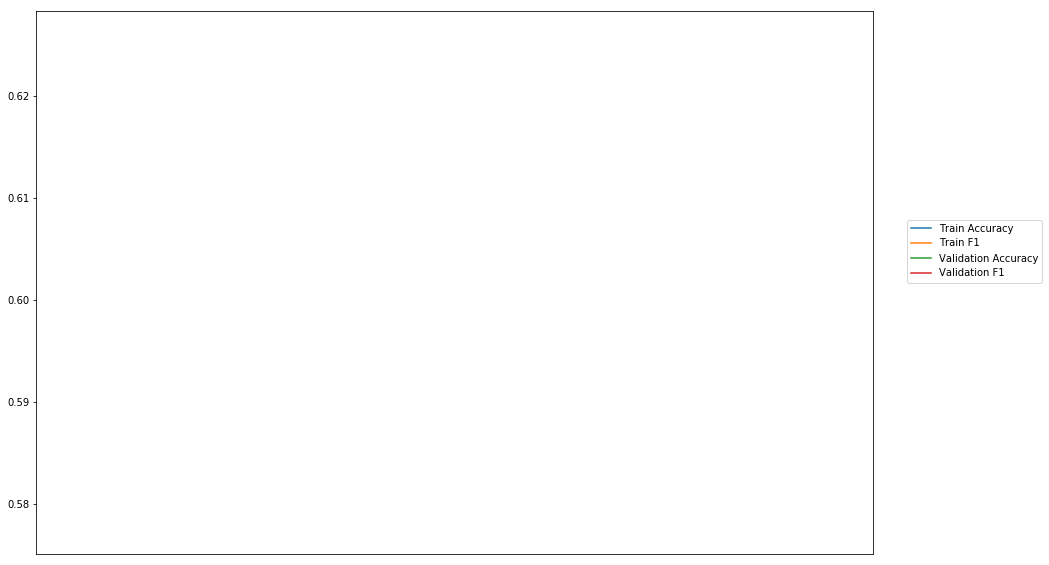

Average Accuracy: 61.62%
Average Precision: 60.89%
Average Recall: 64.40%
Average F1: 62.60%

-----Fold 7--------


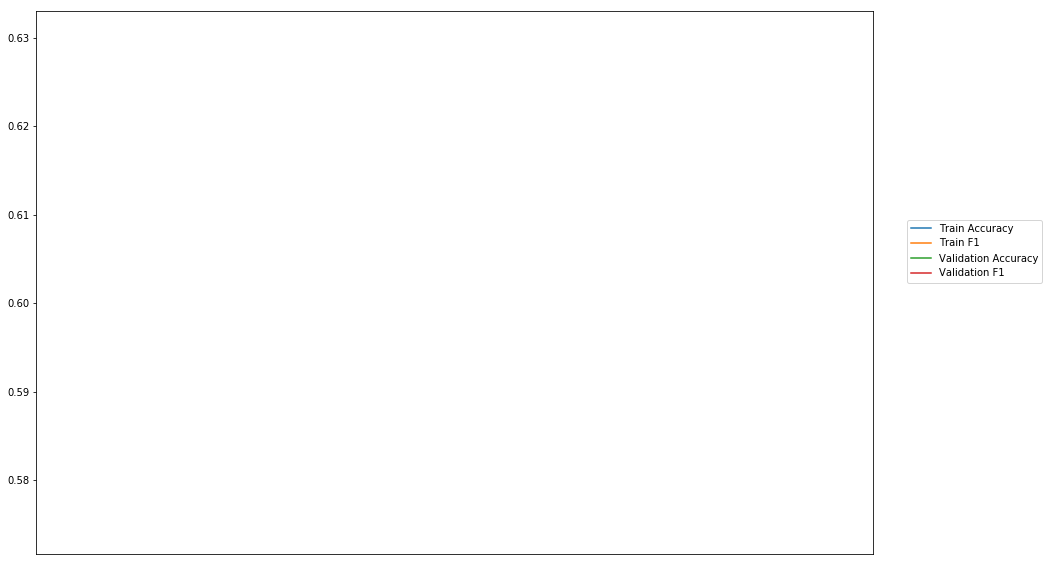

Average Accuracy: 57.44%
Average Precision: 56.42%
Average Recall: 64.40%
Average F1: 60.15%

-----Fold 8--------


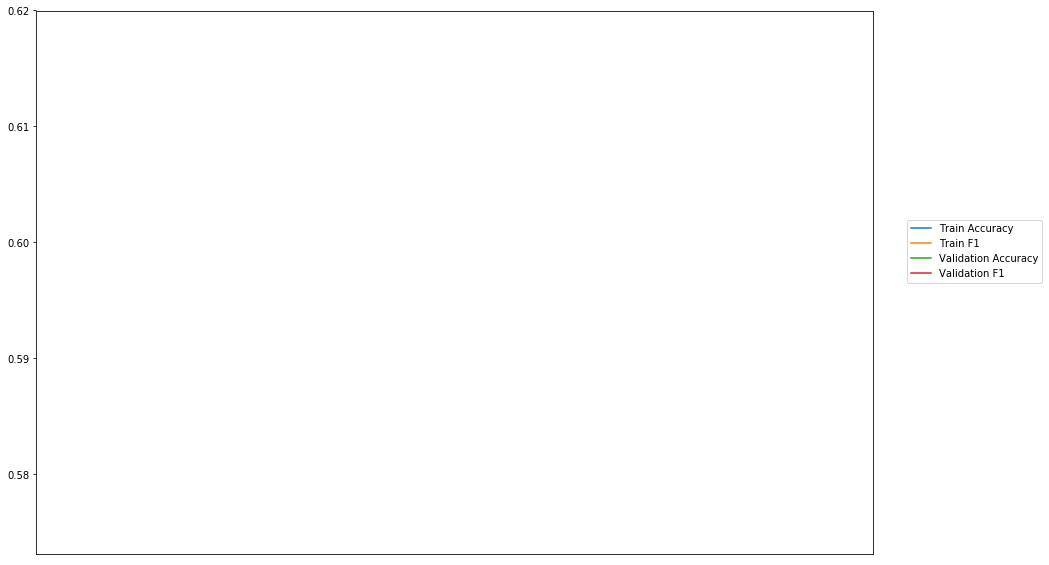

Average Accuracy: 59.79%
Average Precision: 59.79%
Average Recall: 59.16%
Average F1: 59.47%

-----Fold 9--------


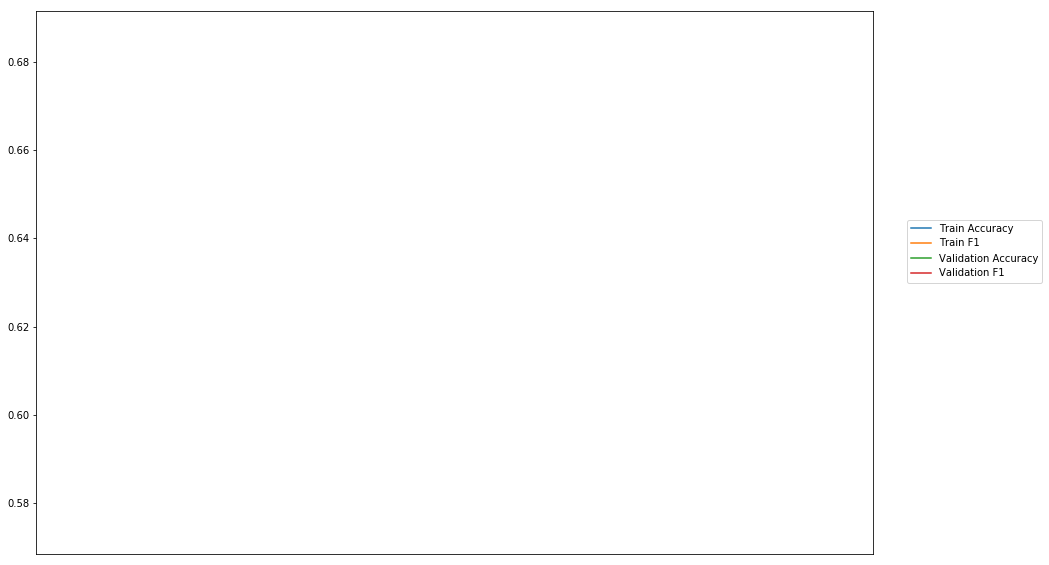

Average Accuracy: 66.06%
Average Precision: 63.68%
Average Recall: 74.35%
Average F1: 68.60%

-----Fold 10--------


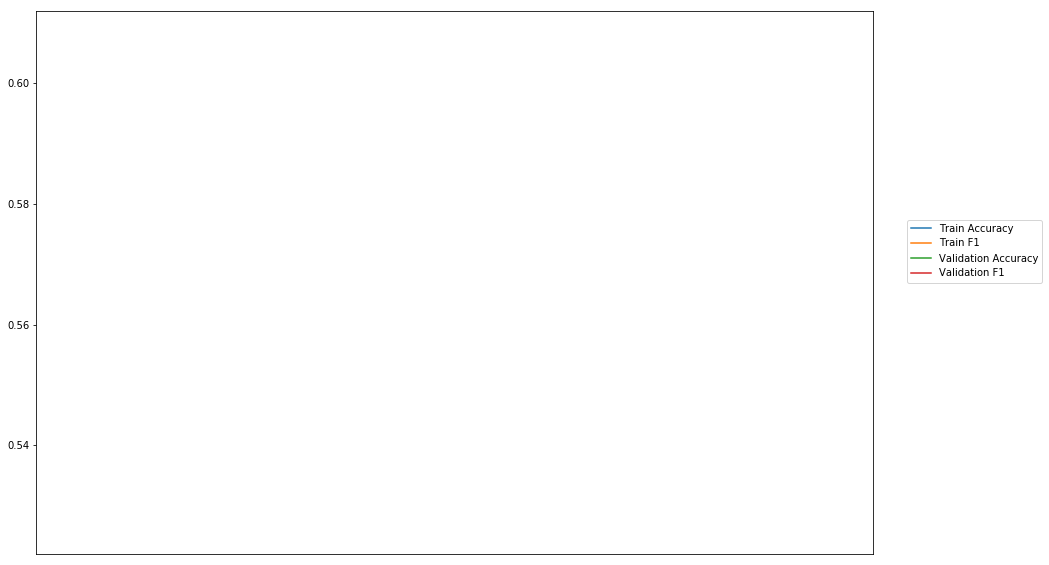

Average Accuracy: 59.53%
Average Precision: 63.24%
Average Recall: 45.03%
Average F1: 52.60%

-------Overallresults-------


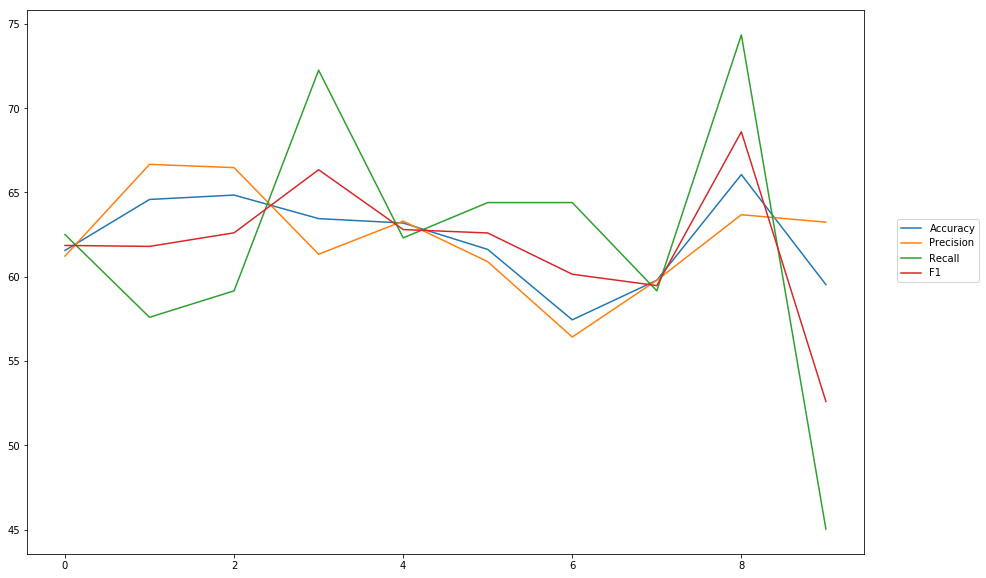

Accuracy: Mean = 62.21% (+/- 2.58%), Max = 66.06%, Min =  57.44%
Precision: Mean = 62.30% (+/- 2.92%), Max = 66.67%, Min =  56.42%
Recall: Mean = 62.11% (+/- 7.70%), Max = 74.35%, Min =  45.03%
F1: Mean = 61.88% (+/- 4.02%), Max = 68.60%, Min =  52.60%


In [11]:
#Train and test the basic architecture with 10-fold corss validation
cross_val(model, 1, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'epoch_1')


-----Fold 1--------


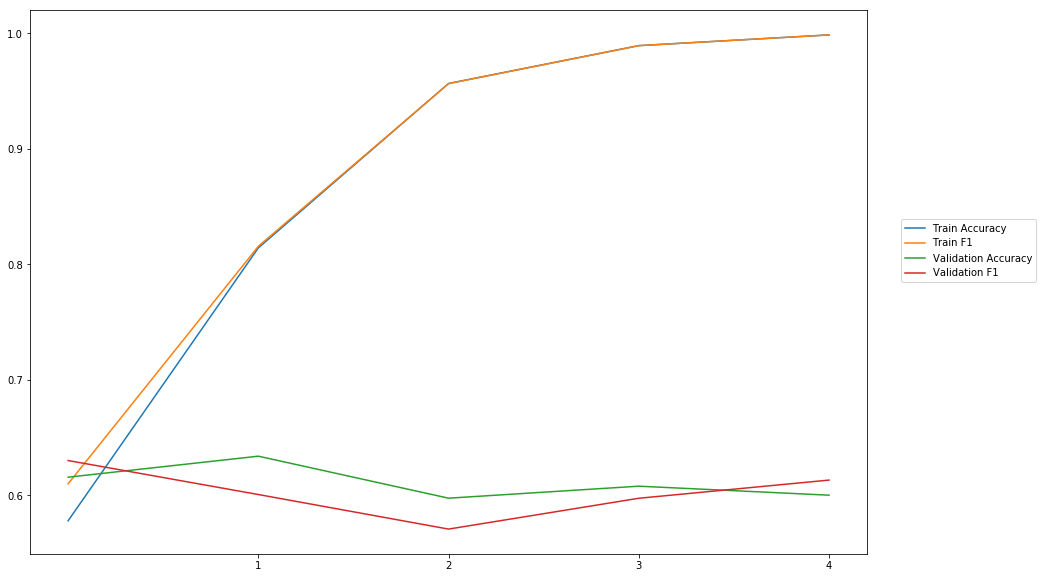

Average Accuracy: 61.09%
Average Precision: 61.56%
Average Recall: 59.27%
Average F1: 60.23%

-----Fold 2--------


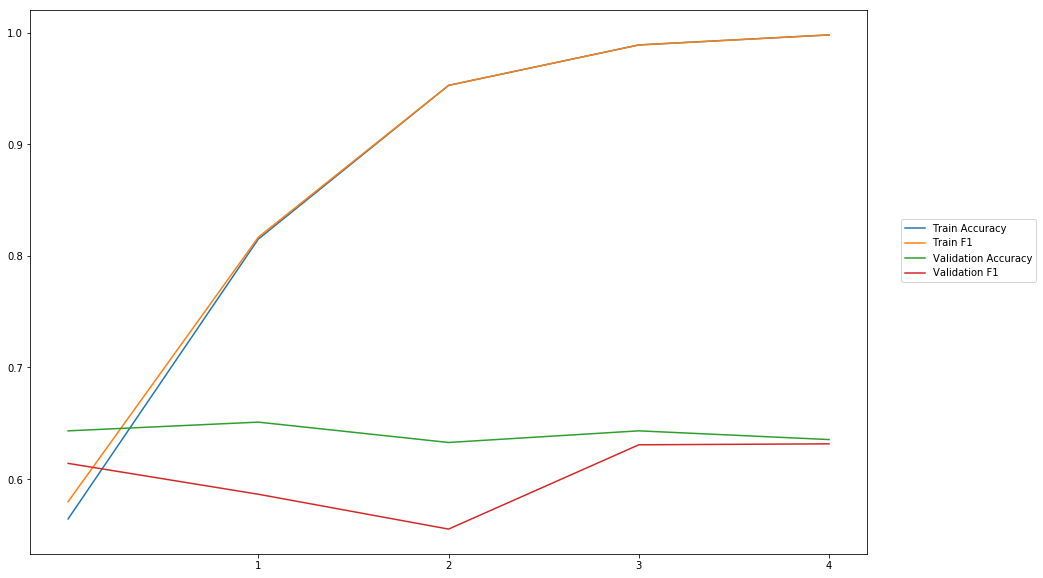

Average Accuracy: 64.11%
Average Precision: 67.25%
Average Recall: 55.39%
Average F1: 60.36%

-----Fold 3--------


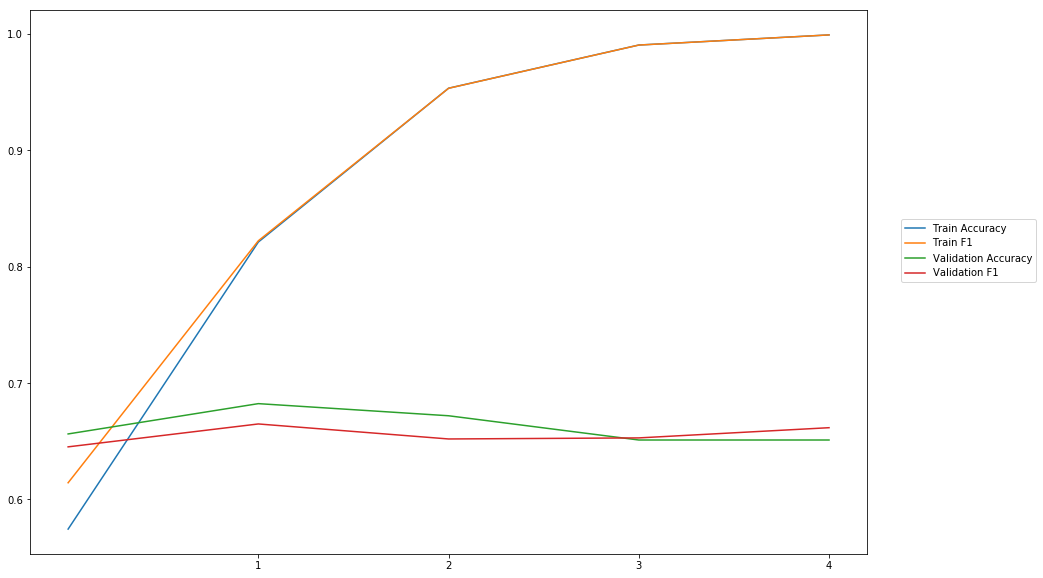

Average Accuracy: 66.25%
Average Precision: 66.75%
Average Recall: 64.50%
Average F1: 65.53%

-----Fold 4--------


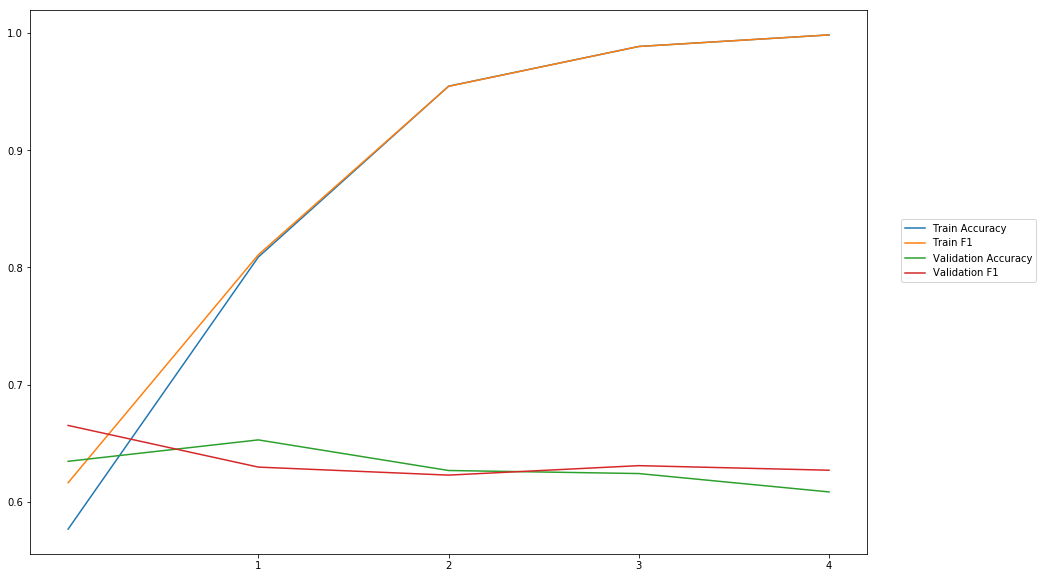

Average Accuracy: 62.92%
Average Precision: 62.56%
Average Recall: 64.82%
Average F1: 63.50%

-----Fold 5--------


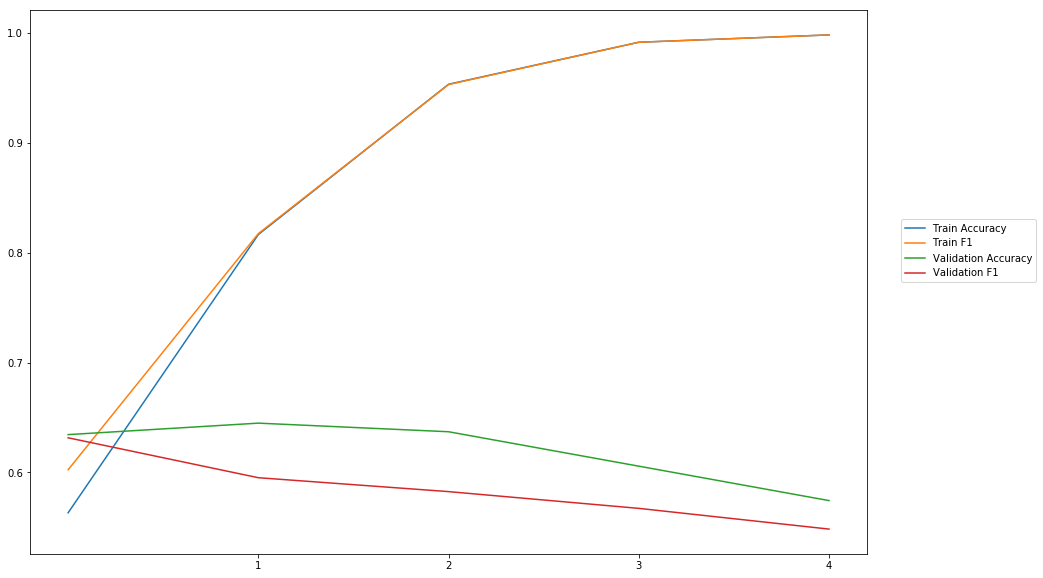

Average Accuracy: 61.93%
Average Precision: 64.33%
Average Recall: 53.93%
Average F1: 58.50%

-----Fold 6--------


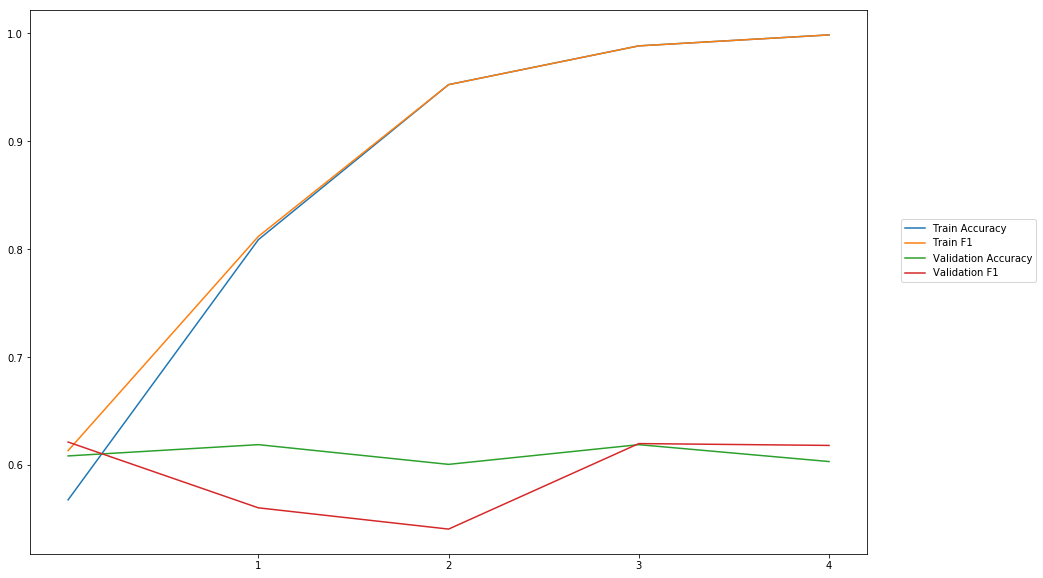

Average Accuracy: 60.99%
Average Precision: 62.08%
Average Recall: 57.38%
Average F1: 59.20%

-----Fold 7--------


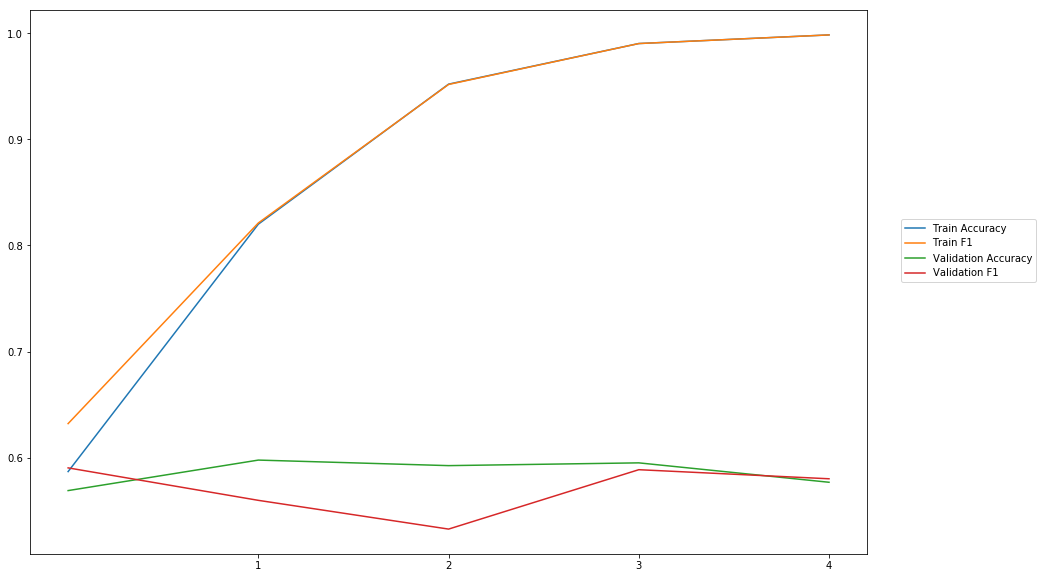

Average Accuracy: 58.64%
Average Precision: 59.42%
Average Recall: 55.39%
Average F1: 57.05%

-----Fold 8--------


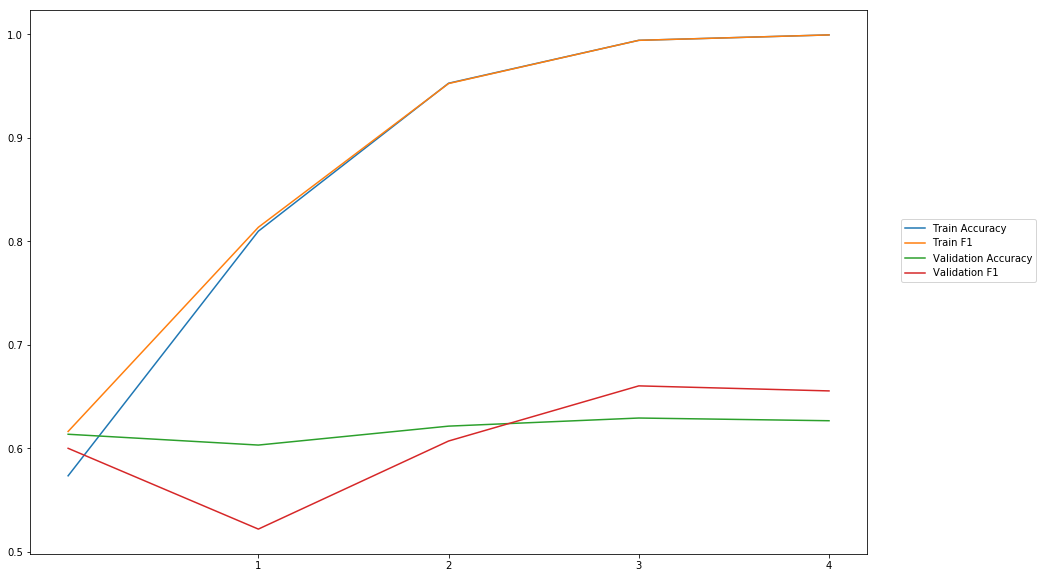

Average Accuracy: 61.88%
Average Precision: 62.36%
Average Recall: 60.73%
Average F1: 60.90%

-----Fold 9--------


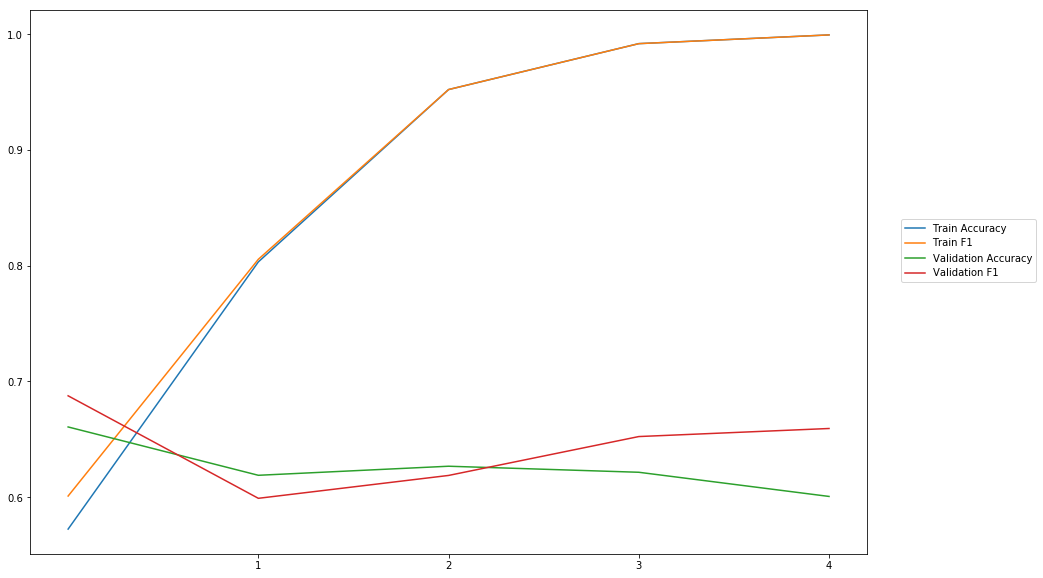

Average Accuracy: 62.56%
Average Precision: 61.43%
Average Recall: 68.27%
Average F1: 64.33%

-----Fold 10--------


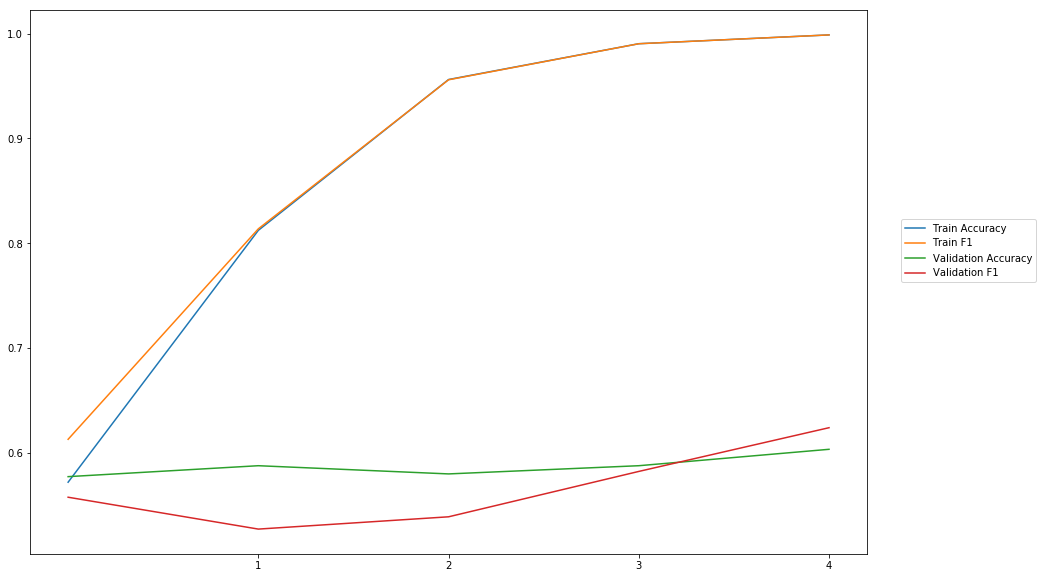

Average Accuracy: 58.69%
Average Precision: 59.46%
Average Recall: 54.45%
Average F1: 56.58%

-------Overallresults-------


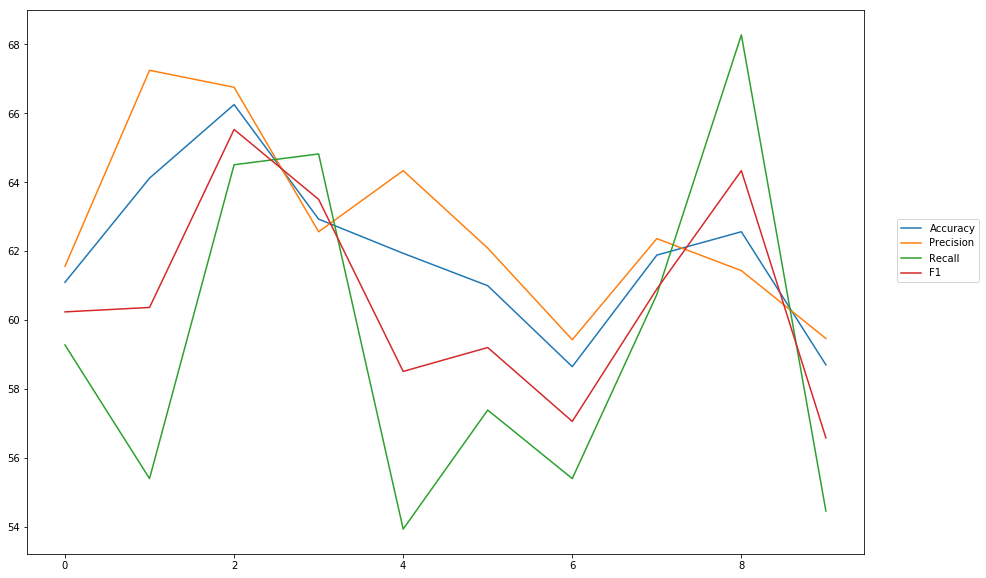

Accuracy: Mean = 61.91% (+/- 2.18%), Max = 66.25%, Min =  58.64%
Precision: Mean = 62.72% (+/- 2.54%), Max = 67.25%, Min =  59.42%
Recall: Mean = 59.41% (+/- 4.76%), Max = 68.27%, Min =  53.93%
F1: Mean = 60.62% (+/- 2.86%), Max = 65.53%, Min =  56.58%


In [12]:
#Train and test the basic architecture with 10-fold corss validation
cross_val(model, 5, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'epoch_5')


-----Fold 1--------


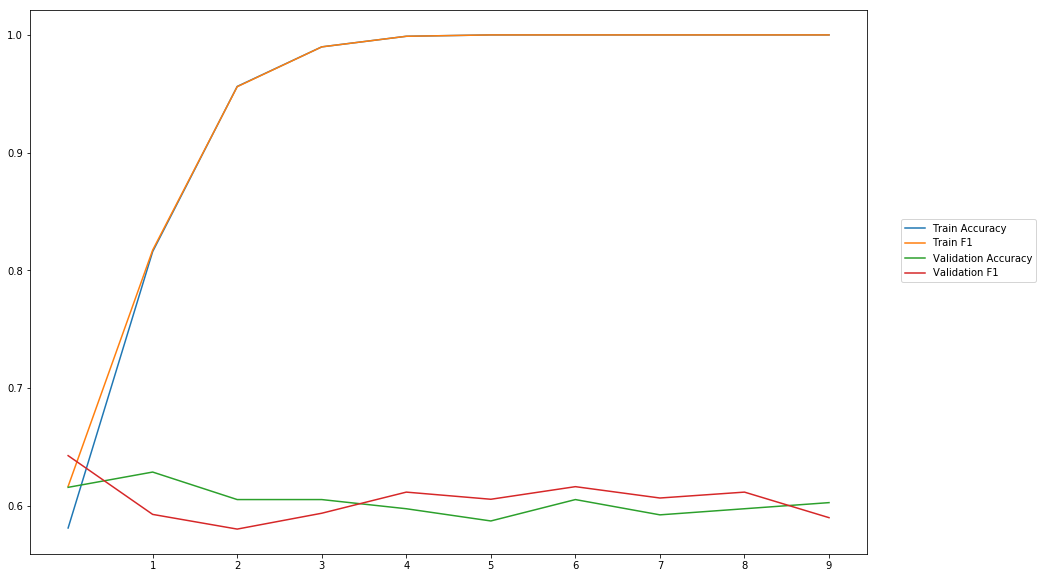

Average Accuracy: 60.36%
Average Precision: 60.28%
Average Recall: 61.04%
Average F1: 60.50%

-----Fold 2--------


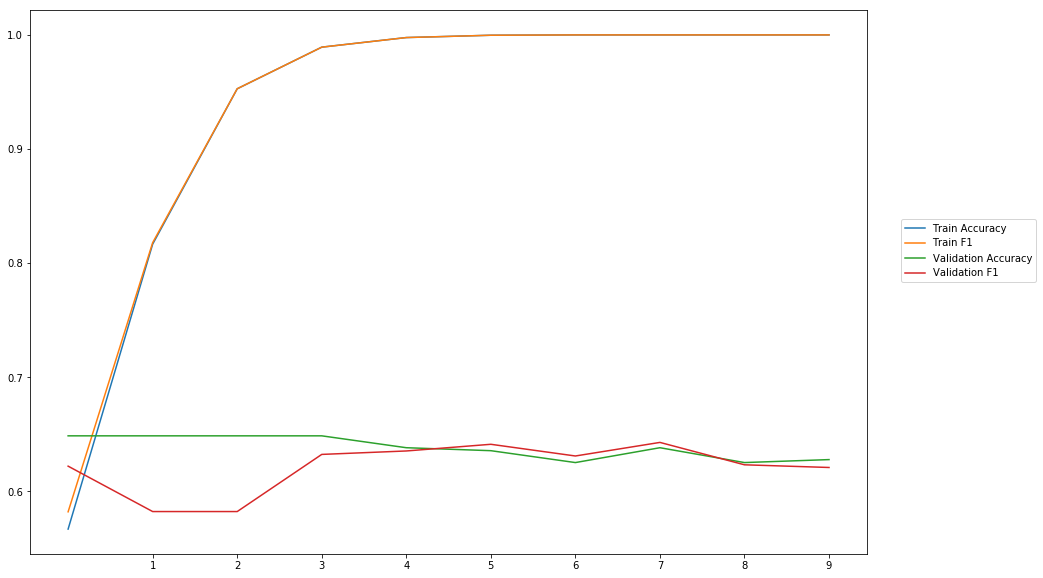

Average Accuracy: 63.83%
Average Precision: 65.18%
Average Recall: 59.95%
Average F1: 62.11%

-----Fold 3--------


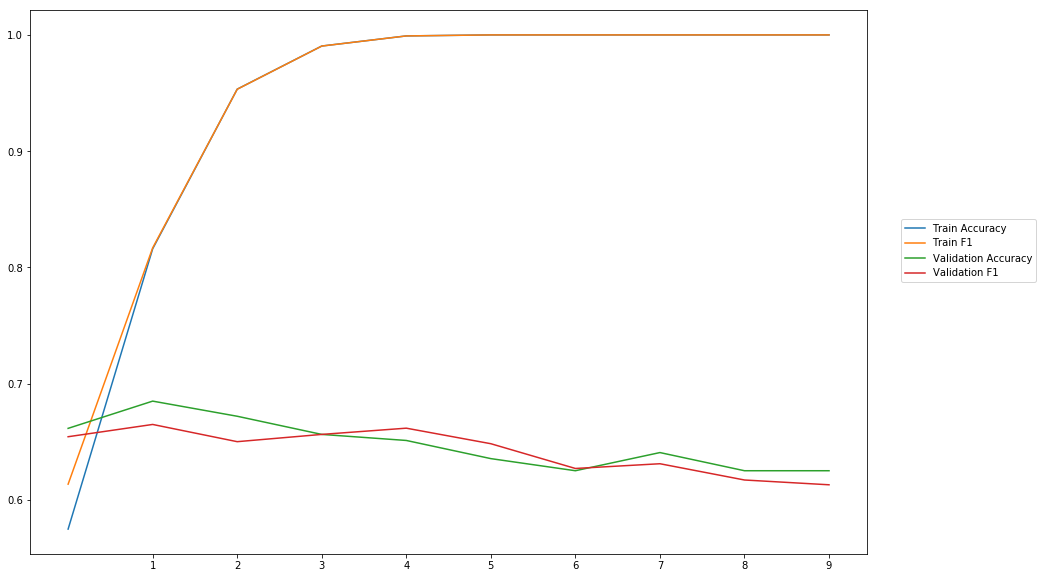

Average Accuracy: 64.77%
Average Precision: 65.00%
Average Recall: 63.61%
Average F1: 64.23%

-----Fold 4--------


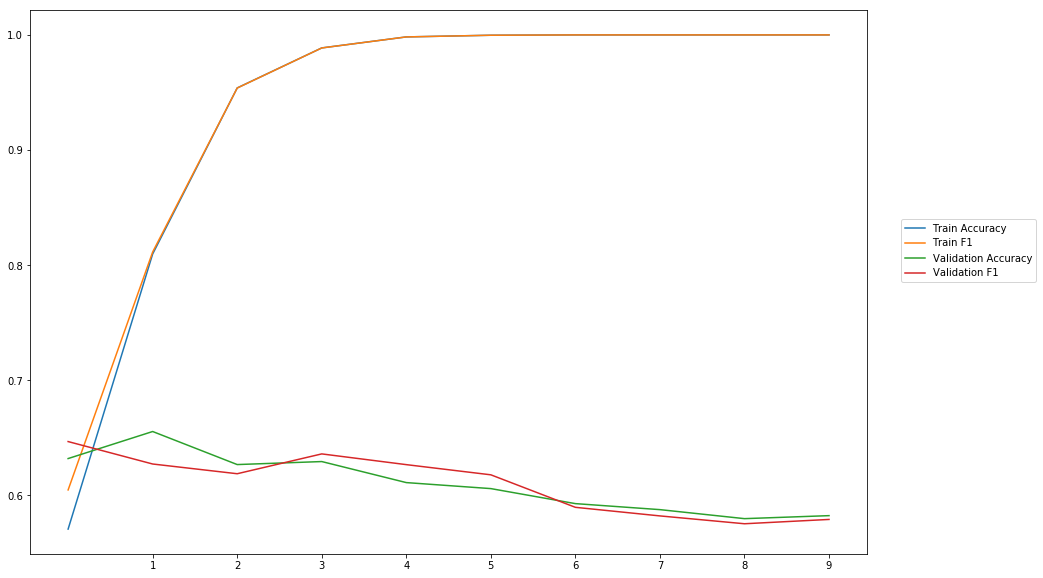

Average Accuracy: 61.02%
Average Precision: 60.96%
Average Recall: 61.15%
Average F1: 60.98%

-----Fold 5--------


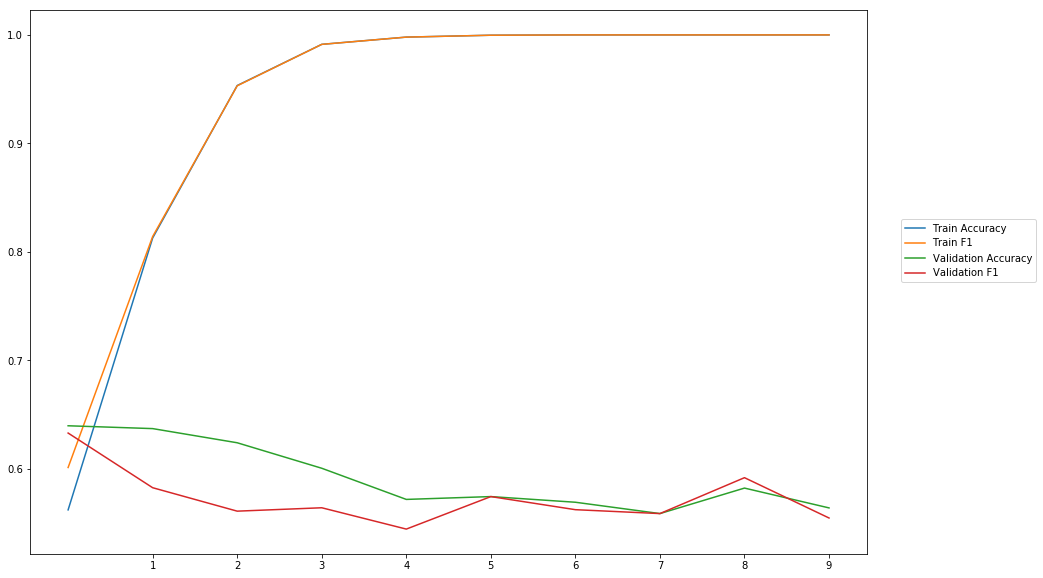

Average Accuracy: 59.22%
Average Precision: 60.39%
Average Recall: 54.87%
Average F1: 57.27%

-----Fold 6--------


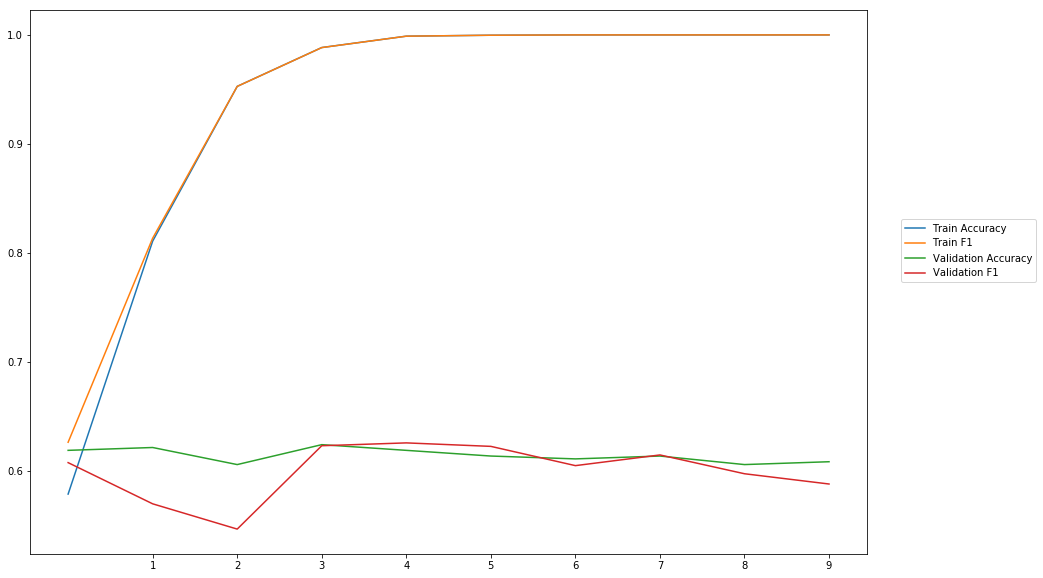

Average Accuracy: 61.41%
Average Precision: 62.17%
Average Recall: 58.32%
Average F1: 60.00%

-----Fold 7--------


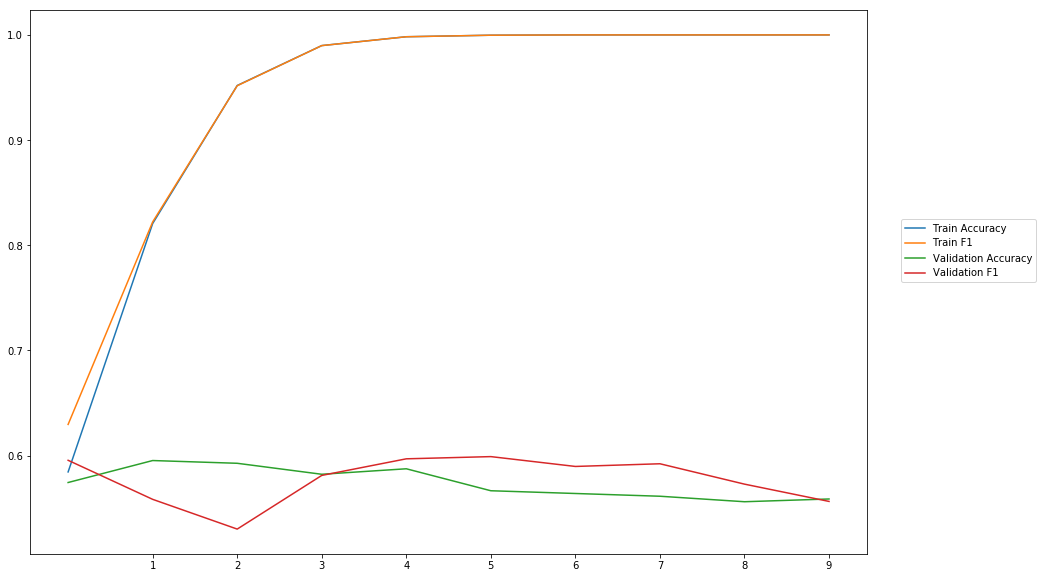

Average Accuracy: 57.39%
Average Precision: 57.38%
Average Recall: 58.64%
Average F1: 57.72%

-----Fold 8--------


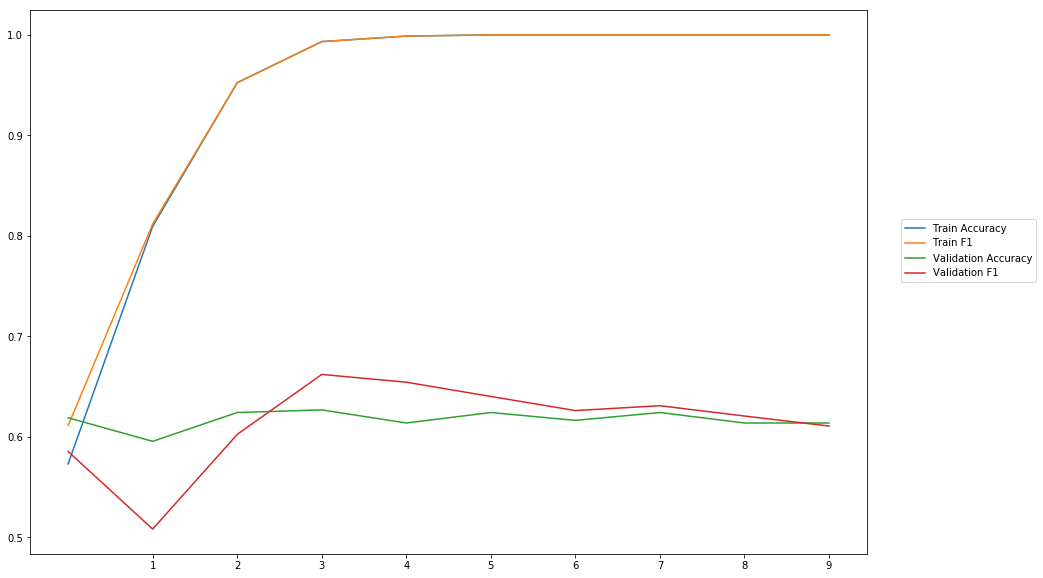

Average Accuracy: 61.70%
Average Precision: 61.78%
Average Recall: 61.94%
Average F1: 61.39%

-----Fold 9--------


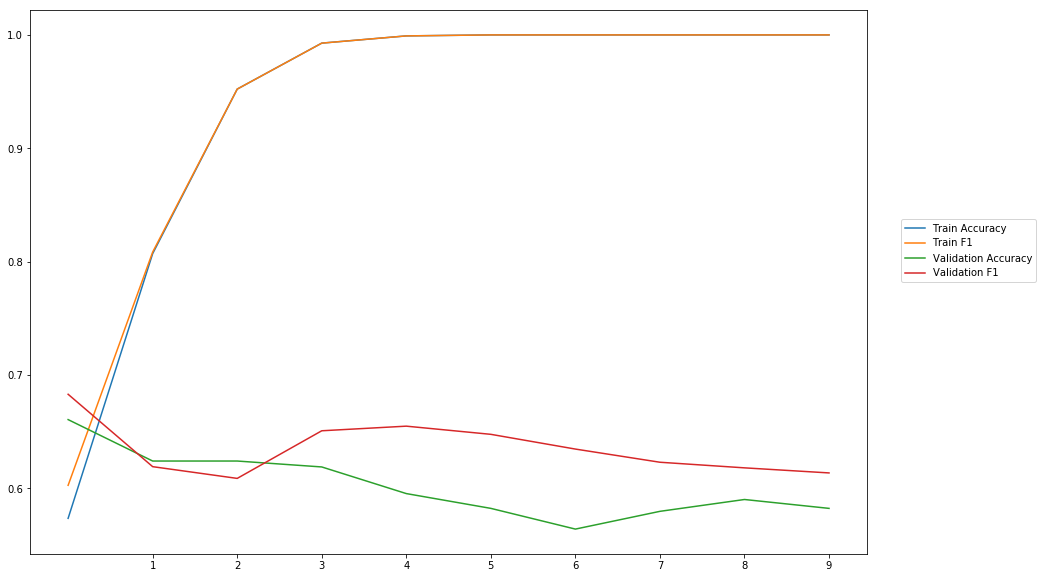

Average Accuracy: 60.21%
Average Precision: 58.81%
Average Recall: 69.69%
Average F1: 63.53%

-----Fold 10--------


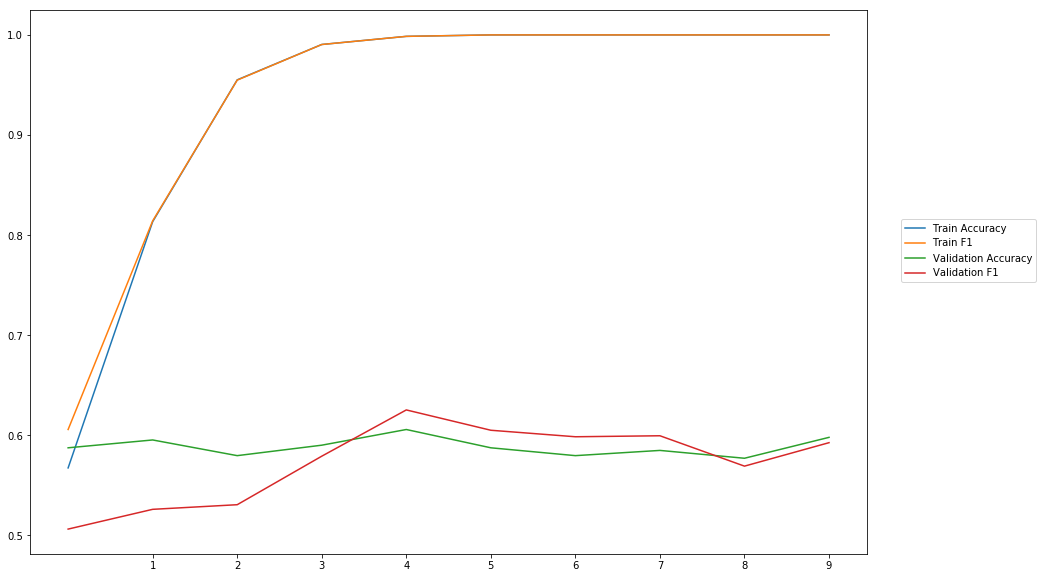

Average Accuracy: 58.85%
Average Precision: 59.52%
Average Recall: 56.07%
Average F1: 57.32%

-------Overallresults-------


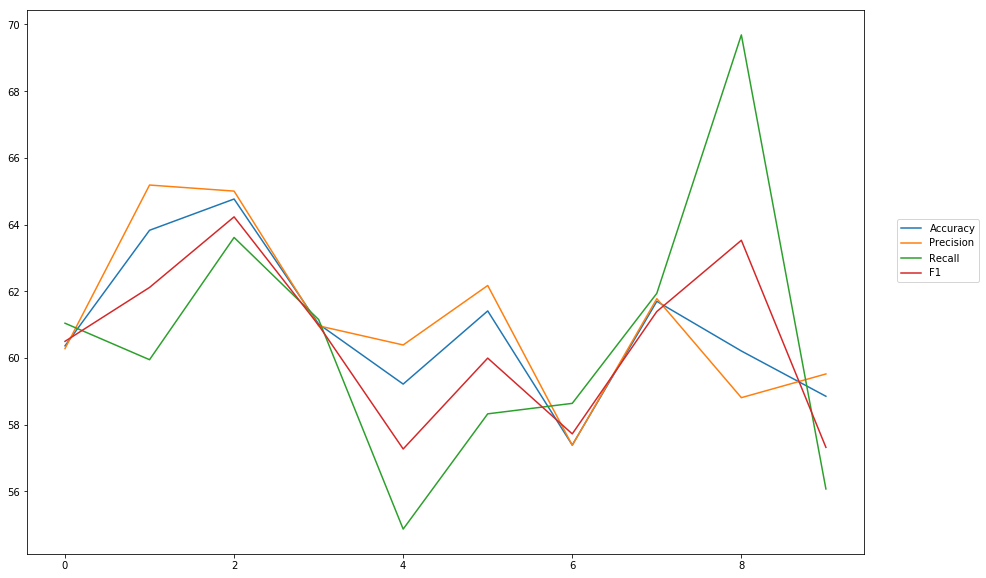

Accuracy: Mean = 60.87% (+/- 2.11%), Max = 64.77%, Min =  57.39%
Precision: Mean = 61.15% (+/- 2.37%), Max = 65.18%, Min =  57.38%
Recall: Mean = 60.53% (+/- 3.96%), Max = 69.69%, Min =  54.87%
F1: Mean = 60.51% (+/- 2.35%), Max = 64.23%, Min =  57.27%


In [13]:
#Train and test the basic architecture with 10-fold corss validation
cross_val(model, 10, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'epoch_10')


-----Fold 1--------


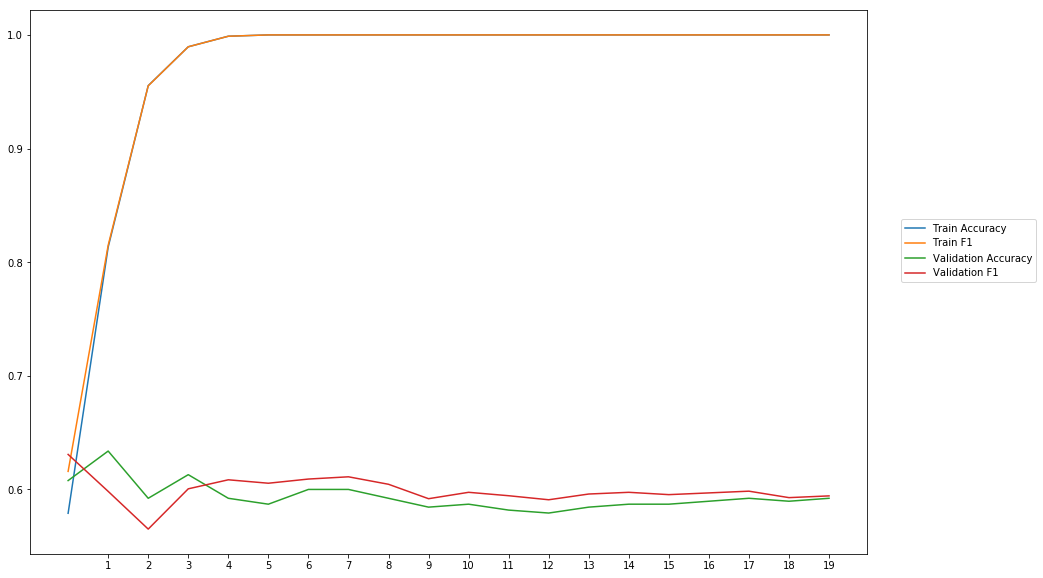

Average Accuracy: 59.36%
Average Precision: 59.07%
Average Recall: 60.91%
Average F1: 59.90%

-----Fold 2--------


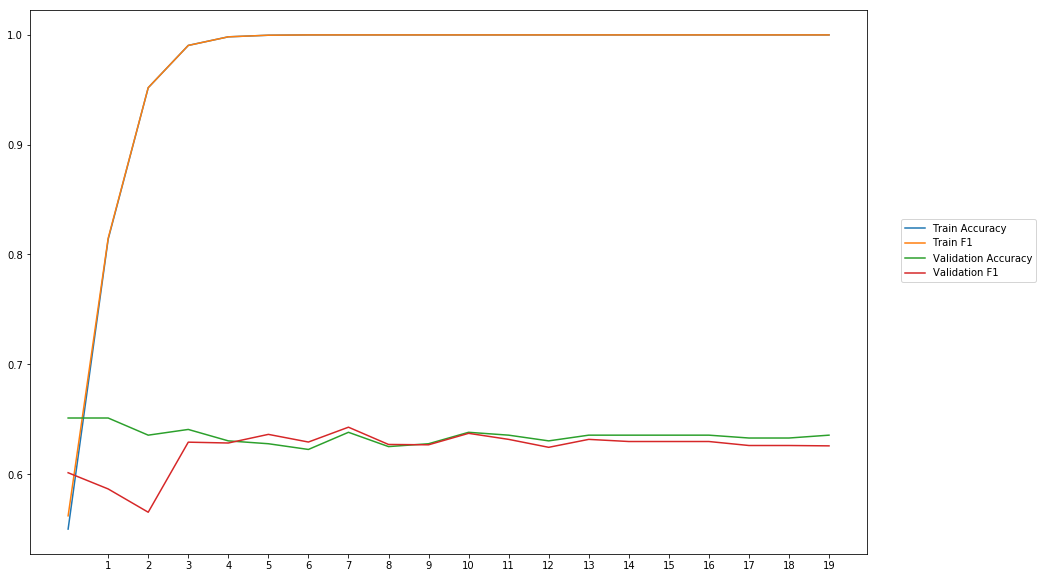

Average Accuracy: 63.48%
Average Precision: 64.22%
Average Recall: 60.94%
Average F1: 62.31%

-----Fold 3--------


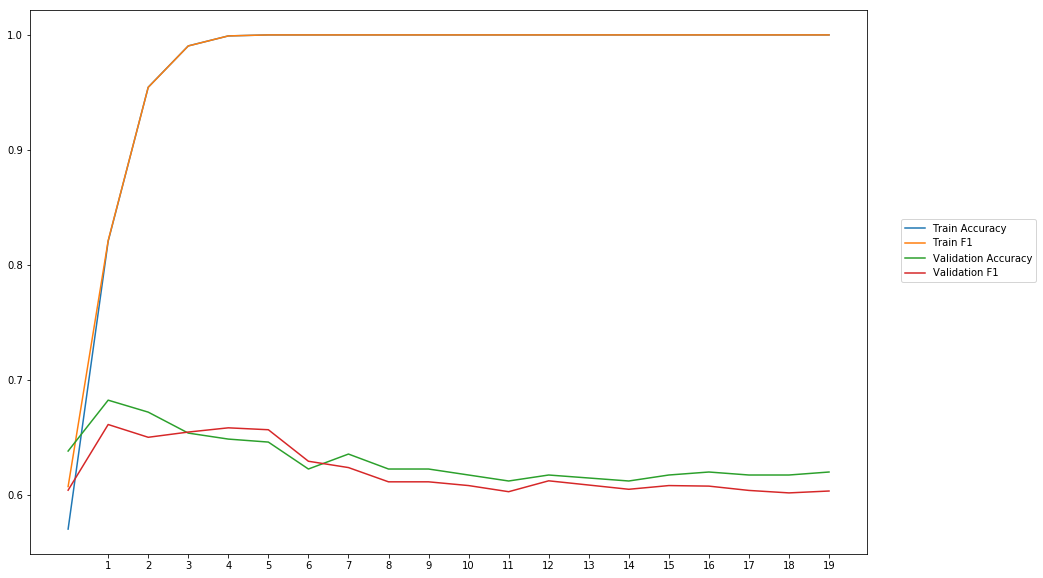

Average Accuracy: 63.03%
Average Precision: 63.42%
Average Recall: 60.94%
Average F1: 62.10%

-----Fold 4--------


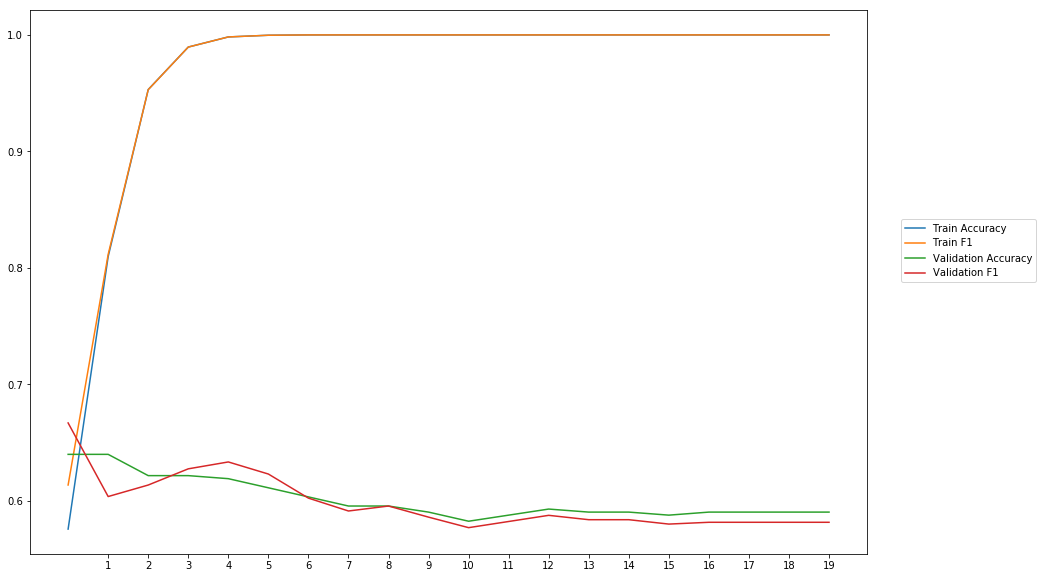

Average Accuracy: 60.13%
Average Precision: 60.14%
Average Recall: 59.58%
Average F1: 59.80%

-----Fold 5--------


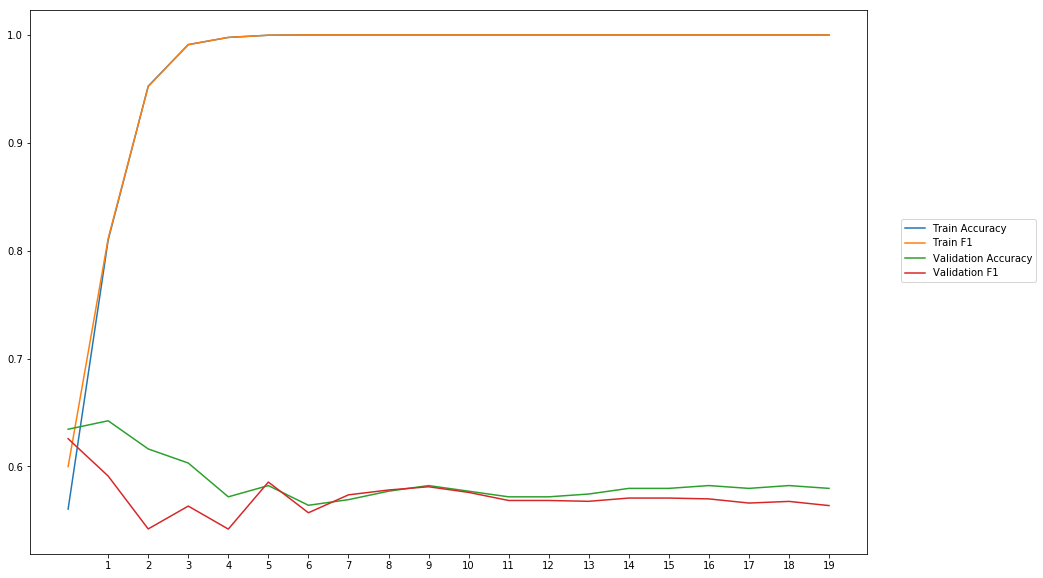

Average Accuracy: 58.60%
Average Precision: 59.32%
Average Recall: 55.39%
Average F1: 57.14%

-----Fold 6--------


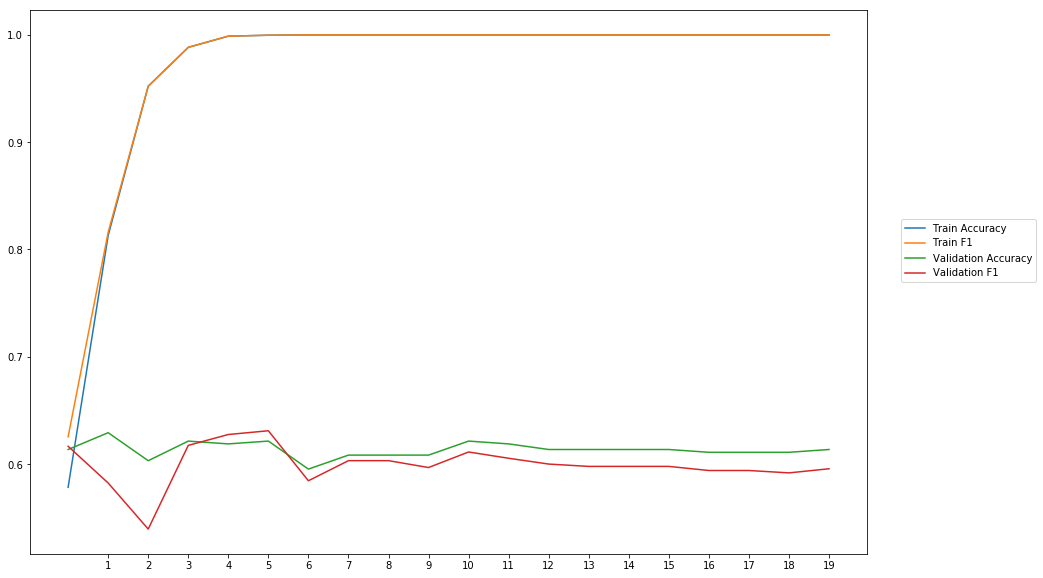

Average Accuracy: 61.34%
Average Precision: 62.07%
Average Recall: 58.14%
Average F1: 59.94%

-----Fold 7--------


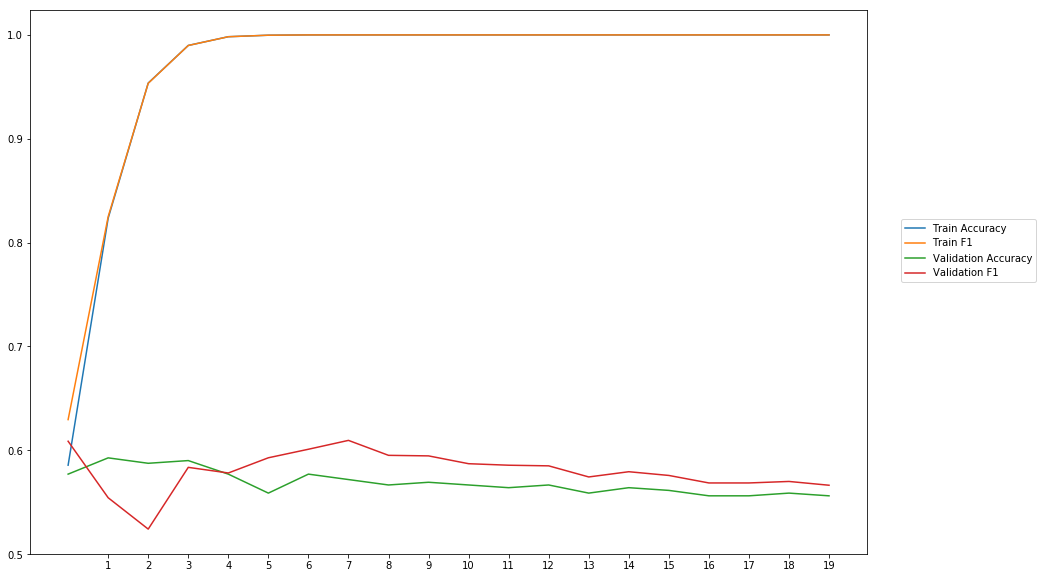

Average Accuracy: 56.88%
Average Precision: 56.52%
Average Recall: 59.95%
Average F1: 58.01%

-----Fold 8--------


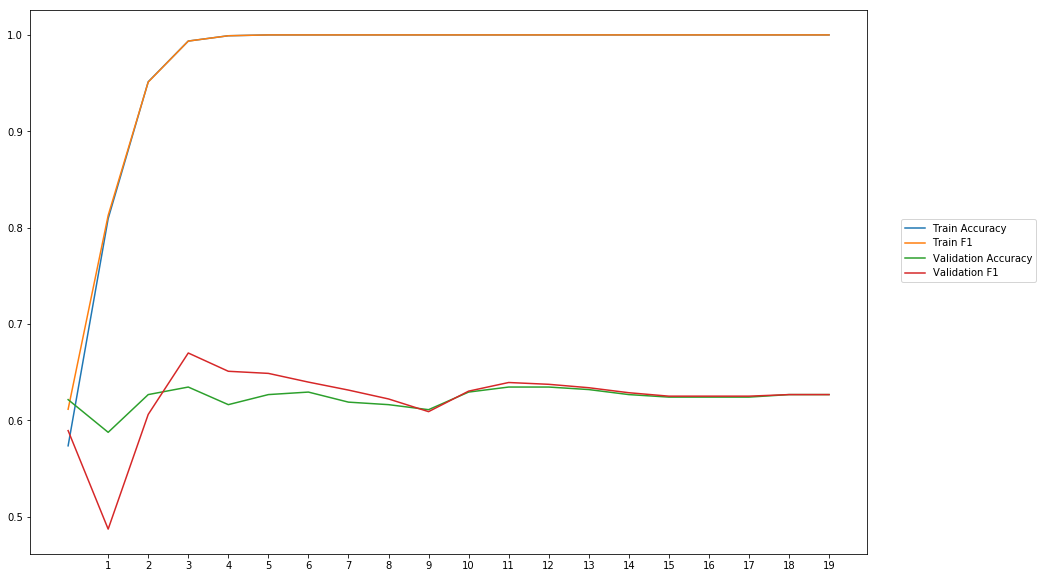

Average Accuracy: 62.35%
Average Precision: 62.23%
Average Recall: 62.80%
Average F1: 62.25%

-----Fold 9--------


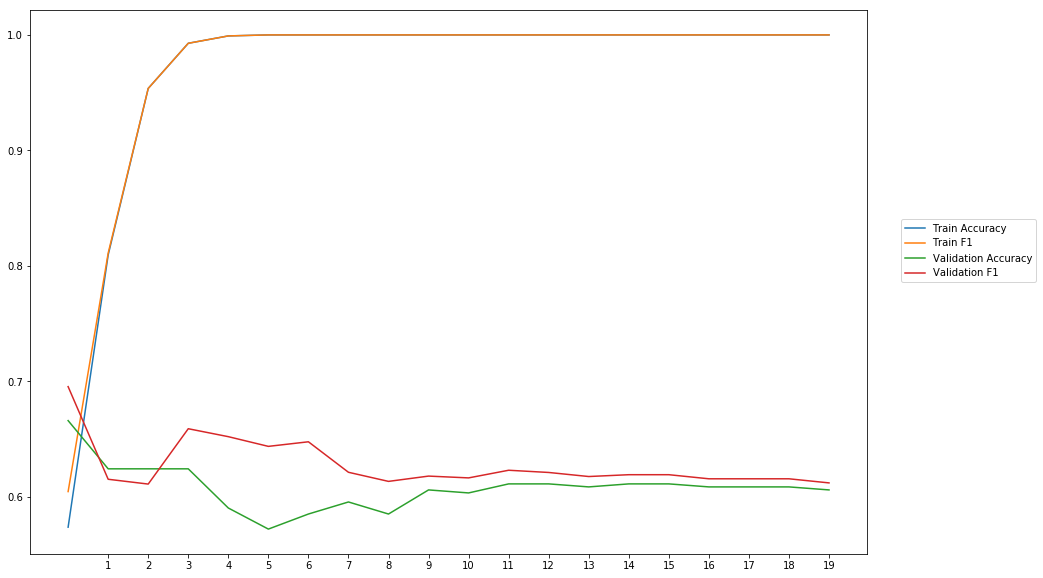

Average Accuracy: 60.78%
Average Precision: 59.77%
Average Recall: 66.44%
Average F1: 62.74%

-----Fold 10--------


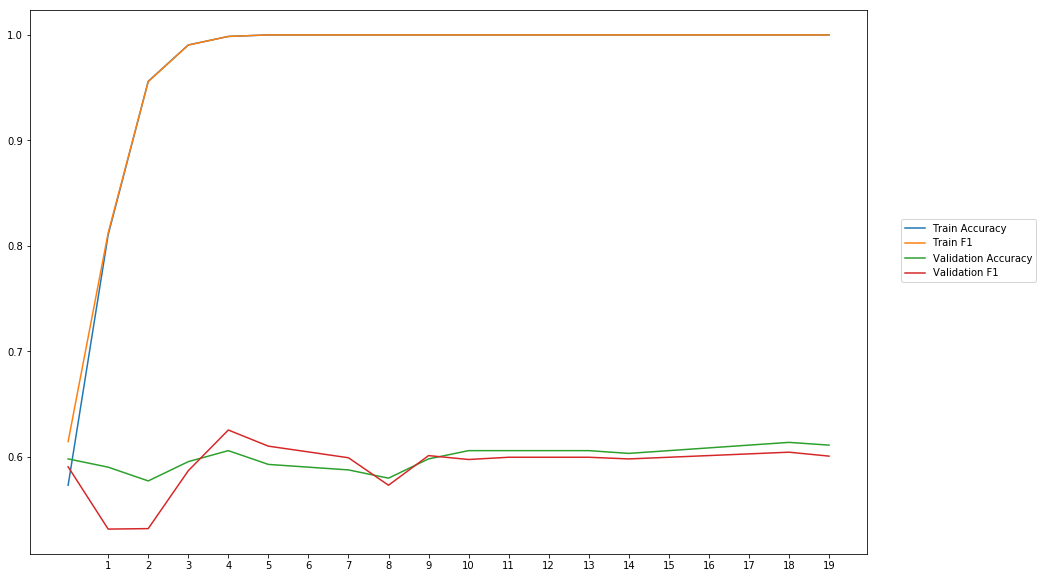

Average Accuracy: 59.95%
Average Precision: 60.14%
Average Recall: 58.64%
Average F1: 59.27%

-------Overallresults-------


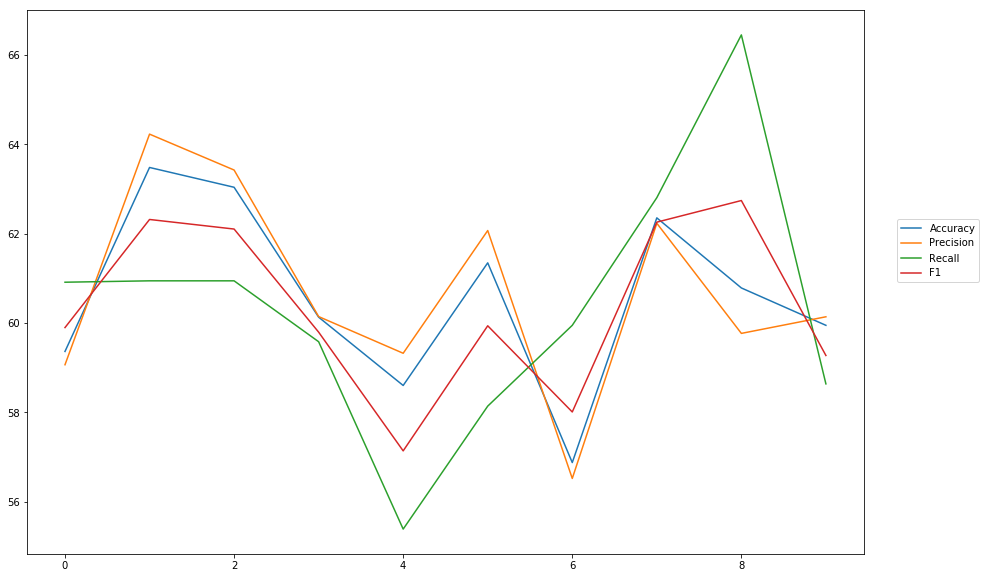

Accuracy: Mean = 60.59% (+/- 1.95%), Max = 63.48%, Min =  56.88%
Precision: Mean = 60.69% (+/- 2.18%), Max = 64.22%, Min =  56.52%
Recall: Mean = 60.37% (+/- 2.78%), Max = 66.44%, Min =  55.39%
F1: Mean = 60.35% (+/- 1.84%), Max = 62.74%, Min =  57.14%


In [14]:
#Train and test the basic architecture with 10-fold corss validation
cross_val(model, 20, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'epoch_20')


-----Fold 1--------


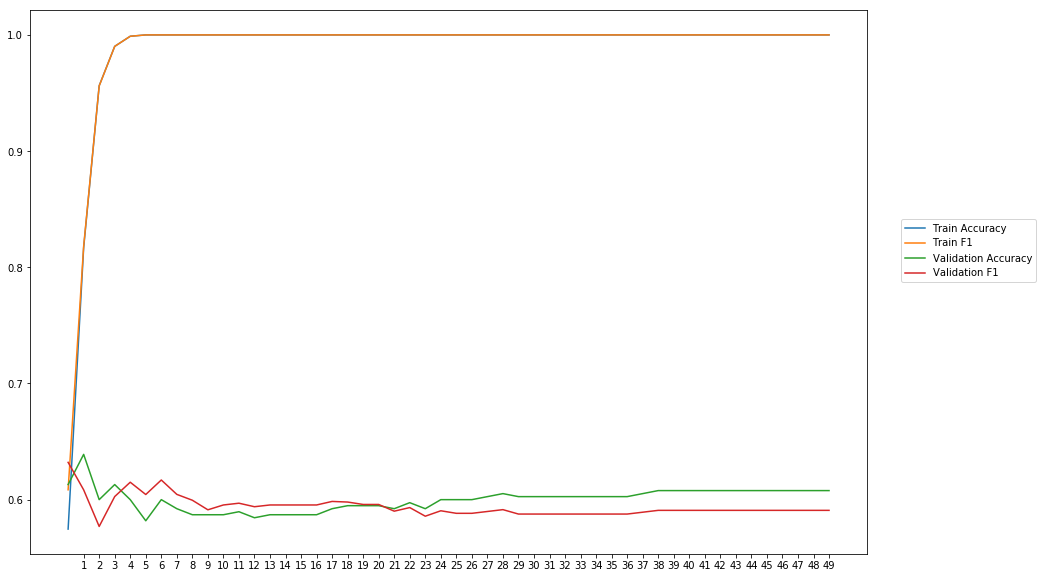

Average Accuracy: 60.02%
Average Precision: 60.25%
Average Recall: 58.72%
Average F1: 59.41%

-----Fold 2--------


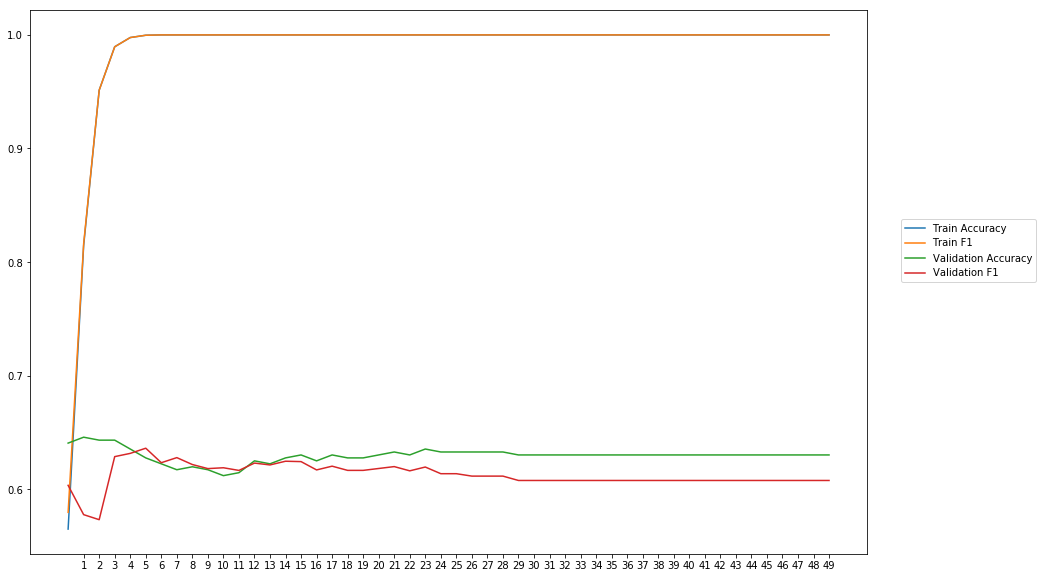

Average Accuracy: 62.96%
Average Precision: 63.95%
Average Recall: 59.02%
Average F1: 61.28%

-----Fold 3--------


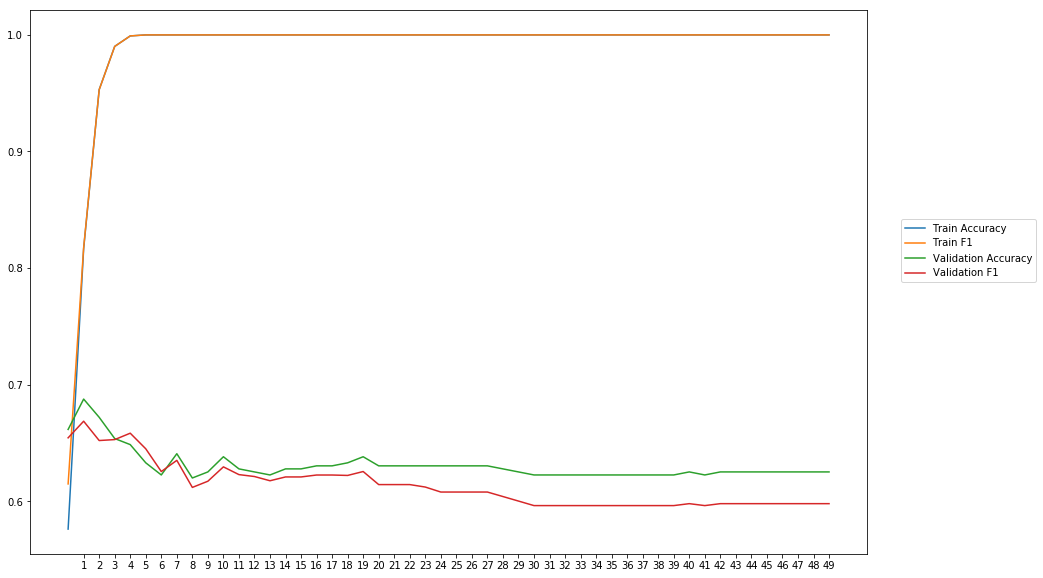

Average Accuracy: 63.06%
Average Precision: 63.96%
Average Recall: 59.02%
Average F1: 61.34%

-----Fold 4--------


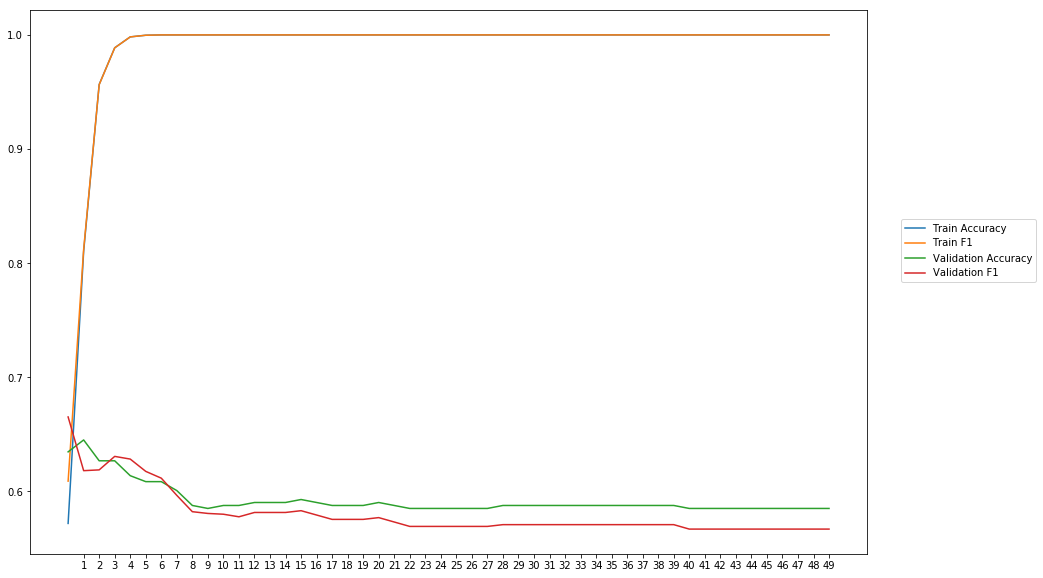

Average Accuracy: 59.22%
Average Precision: 59.58%
Average Recall: 56.64%
Average F1: 58.03%

-----Fold 5--------


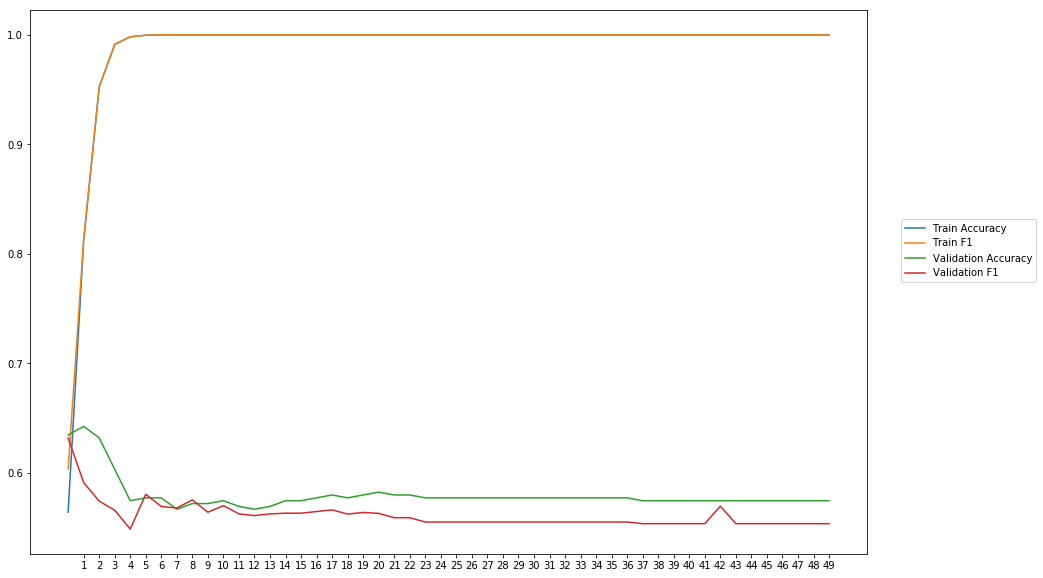

Average Accuracy: 57.96%
Average Precision: 58.62%
Average Recall: 53.87%
Average F1: 56.13%

-----Fold 6--------


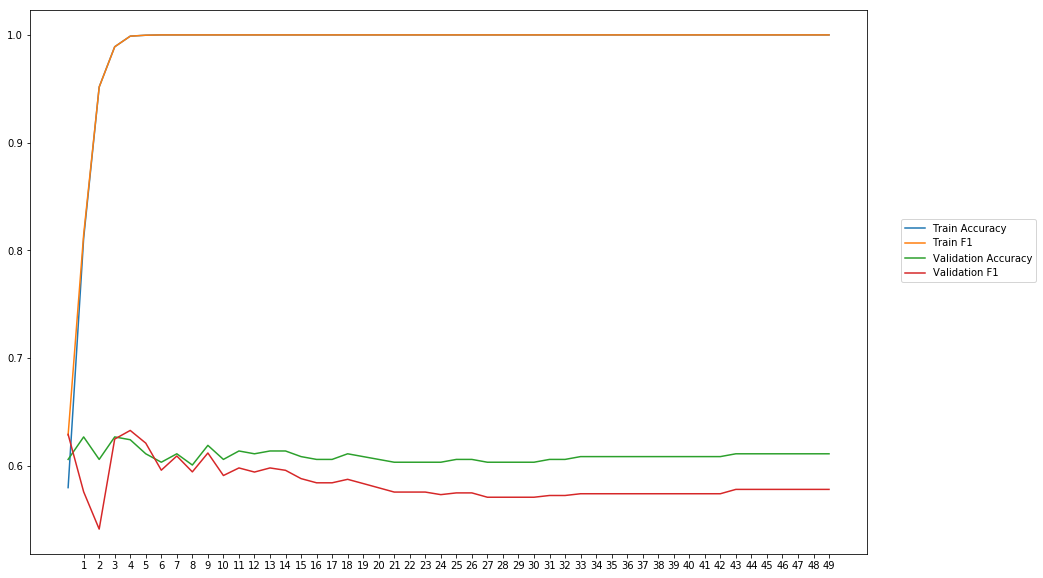

Average Accuracy: 60.89%
Average Precision: 62.24%
Average Recall: 55.08%
Average F1: 58.35%

-----Fold 7--------


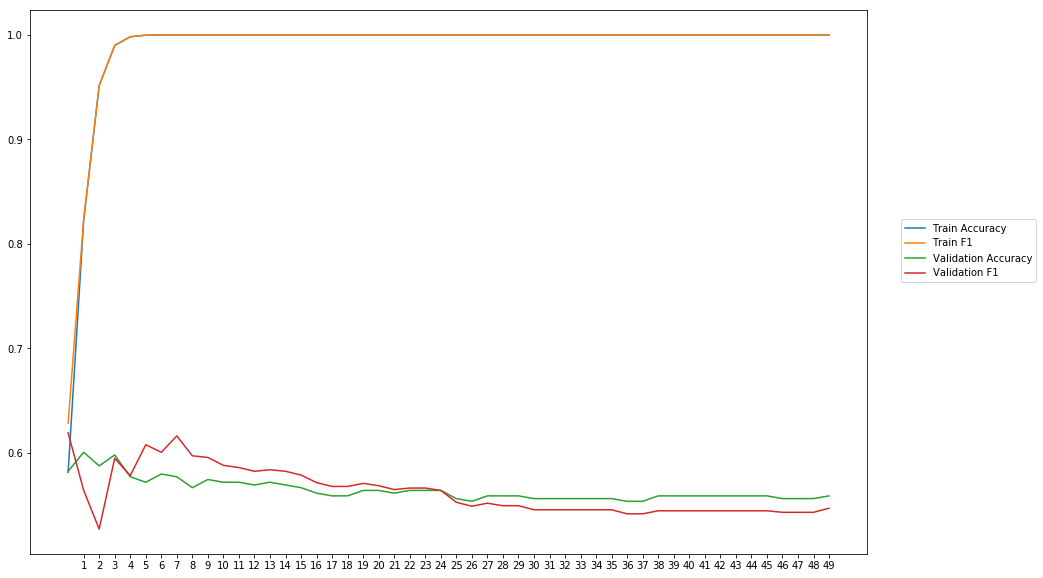

Average Accuracy: 56.44%
Average Precision: 56.35%
Average Recall: 56.44%
Average F1: 56.29%

-----Fold 8--------


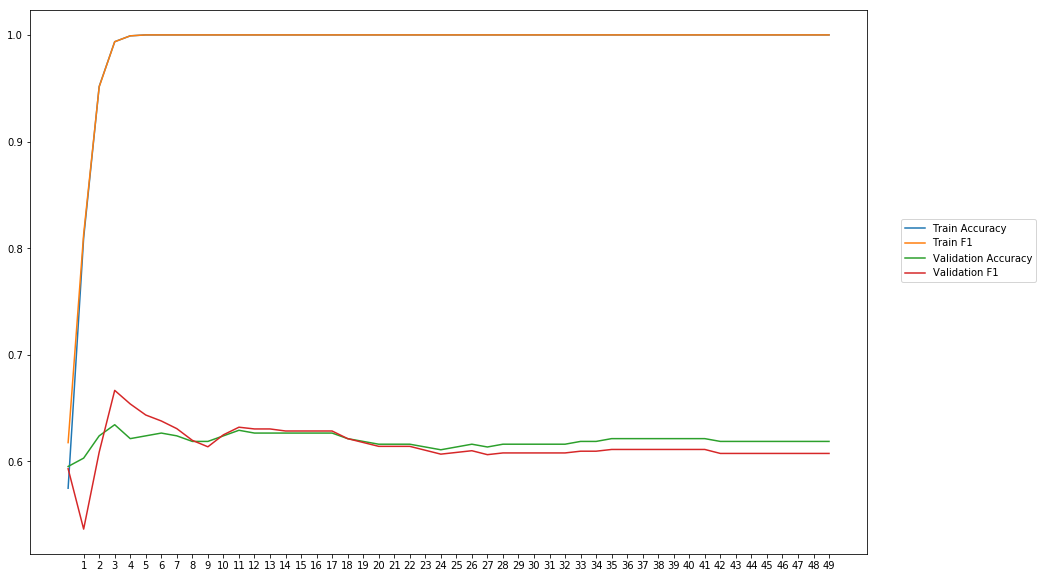

Average Accuracy: 61.96%
Average Precision: 62.07%
Average Recall: 61.12%
Average F1: 61.52%

-----Fold 9--------


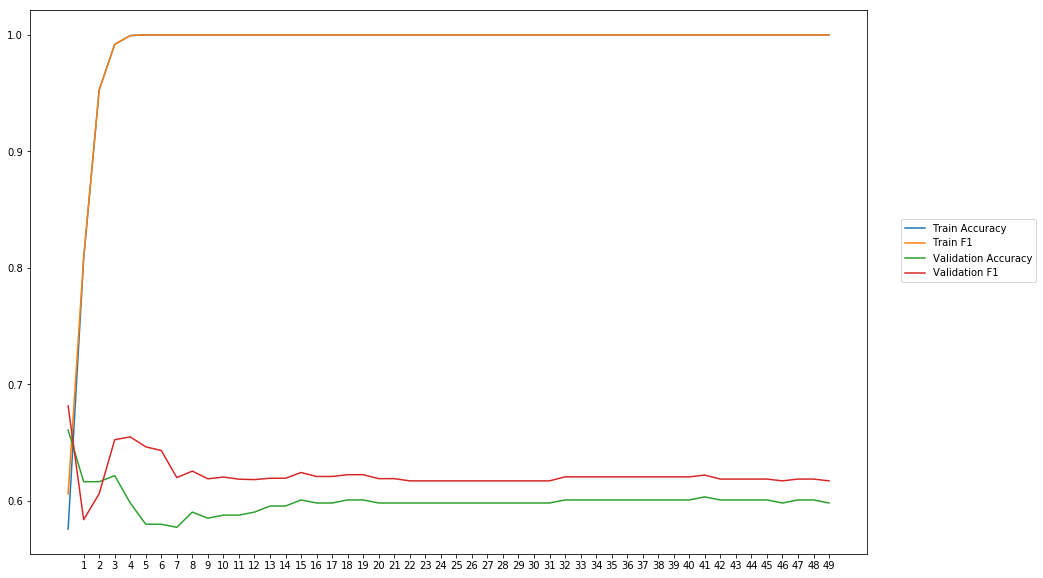

Average Accuracy: 59.92%
Average Precision: 58.78%
Average Recall: 66.18%
Average F1: 62.18%

-----Fold 10--------


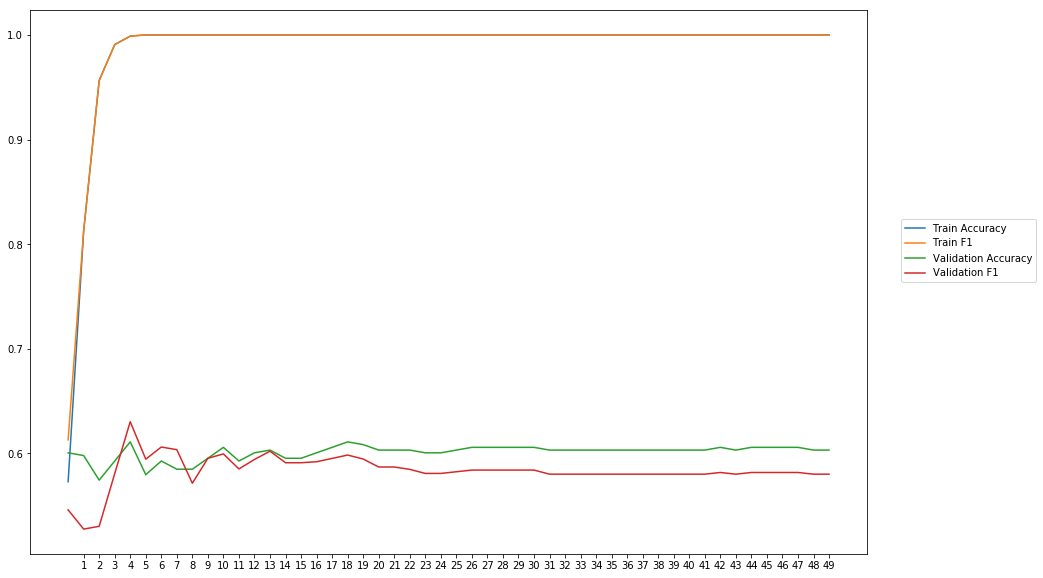

Average Accuracy: 60.09%
Average Precision: 60.88%
Average Recall: 56.20%
Average F1: 58.36%

-------Overallresults-------


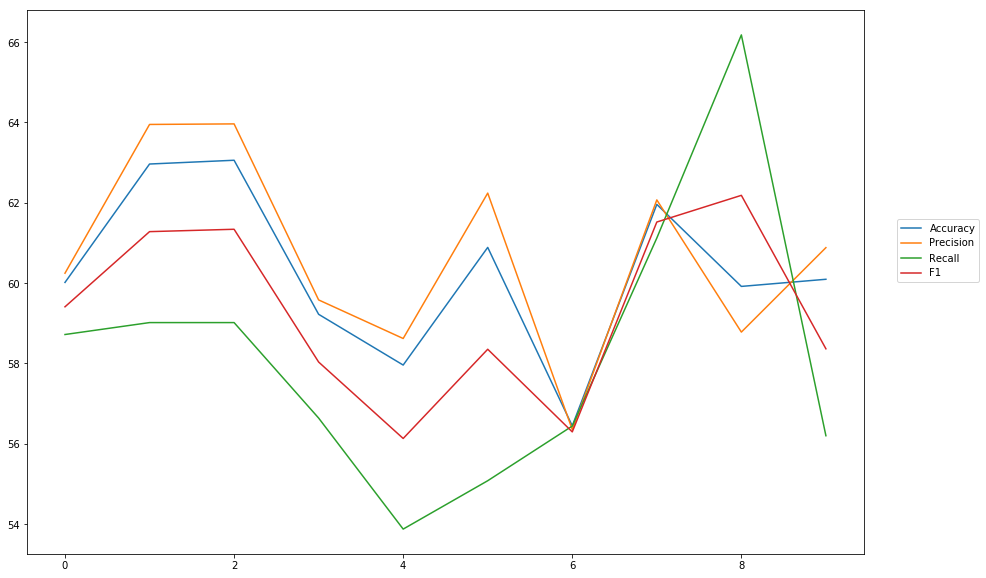

Accuracy: Mean = 60.25% (+/- 1.99%), Max = 63.06%, Min =  56.44%
Precision: Mean = 60.67% (+/- 2.32%), Max = 63.96%, Min =  56.35%
Recall: Mean = 58.23% (+/- 3.34%), Max = 66.18%, Min =  53.87%
F1: Mean = 59.29% (+/- 2.09%), Max = 62.18%, Min =  56.13%


In [15]:
#Train and test the basic architecture with 10-fold corss validation
cross_val(model, 50, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'epoch_50')


-----Fold 1--------


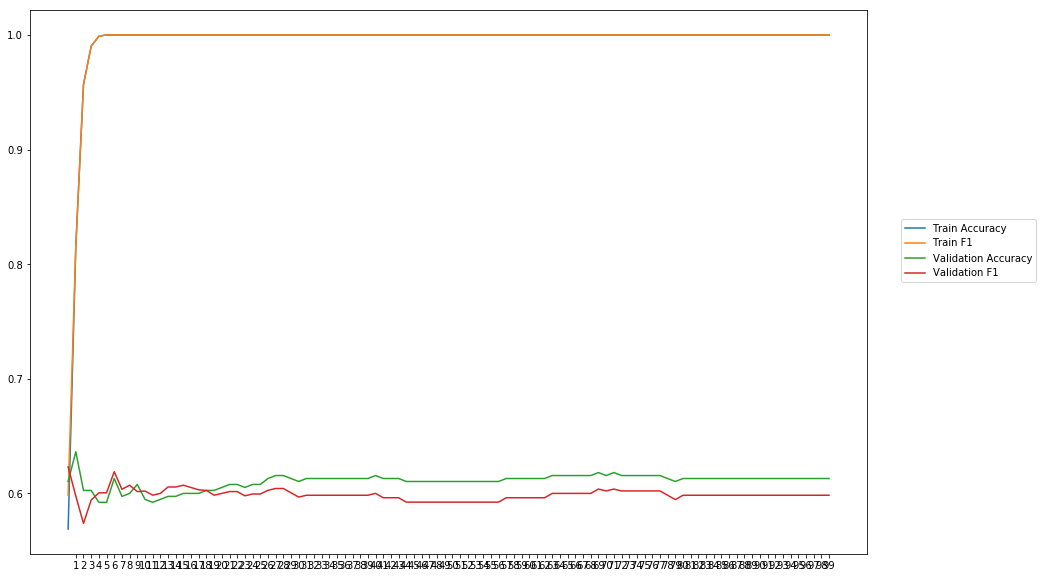

Average Accuracy: 61.05%
Average Precision: 61.60%
Average Recall: 58.33%
Average F1: 59.89%

-----Fold 2--------


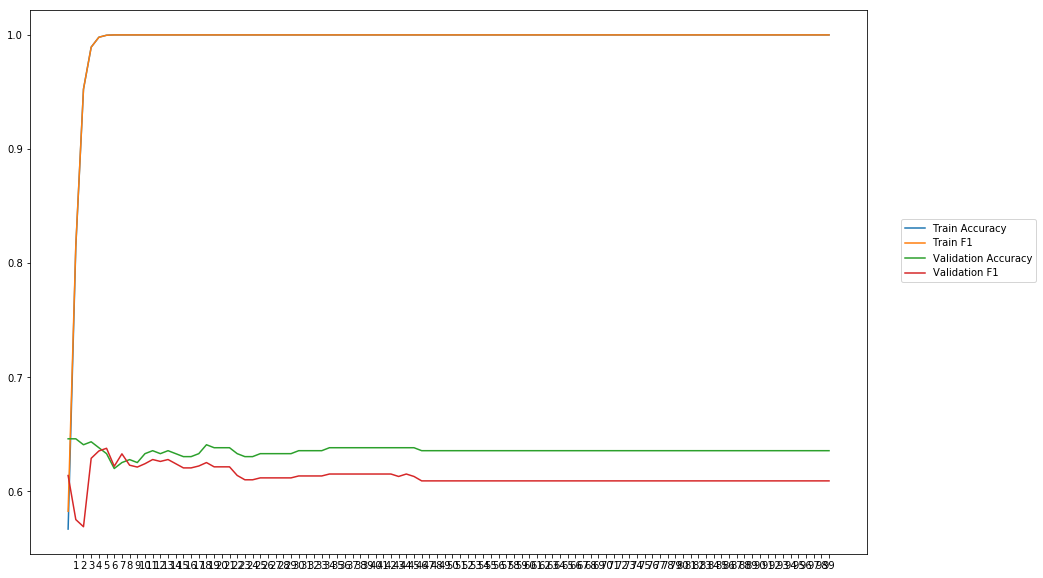

Average Accuracy: 63.53%
Average Precision: 65.00%
Average Recall: 57.98%
Average F1: 61.24%

-----Fold 3--------


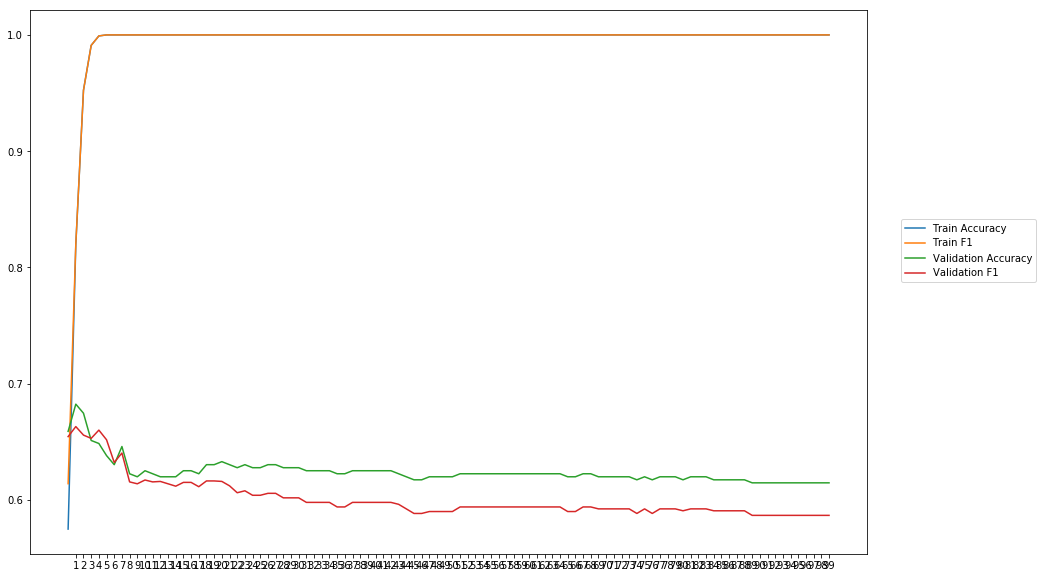

Average Accuracy: 62.41%
Average Precision: 63.65%
Average Recall: 56.99%
Average F1: 60.10%

-----Fold 4--------


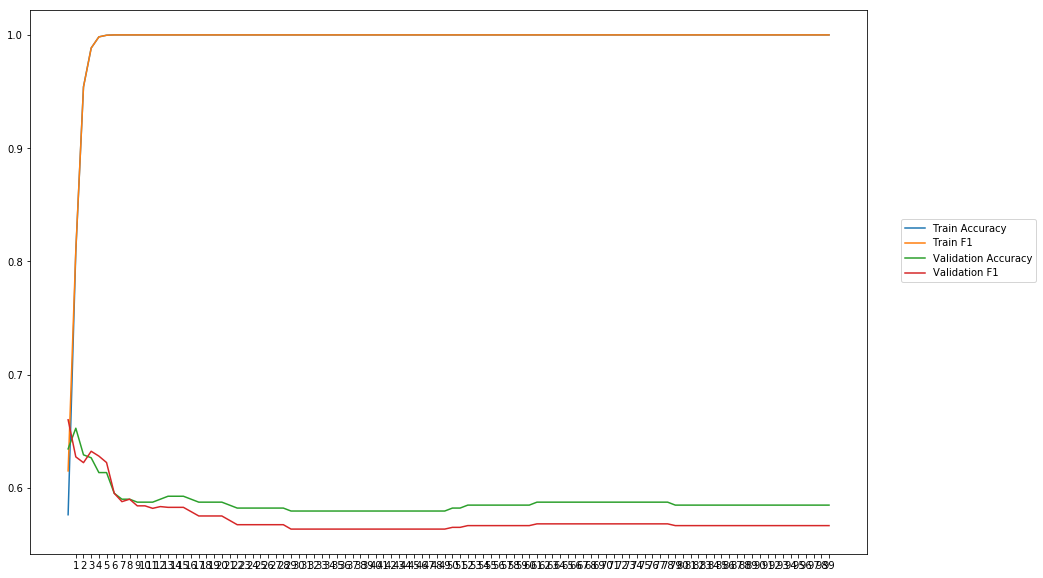

Average Accuracy: 58.73%
Average Precision: 59.19%
Average Recall: 55.52%
Average F1: 57.27%

-----Fold 5--------


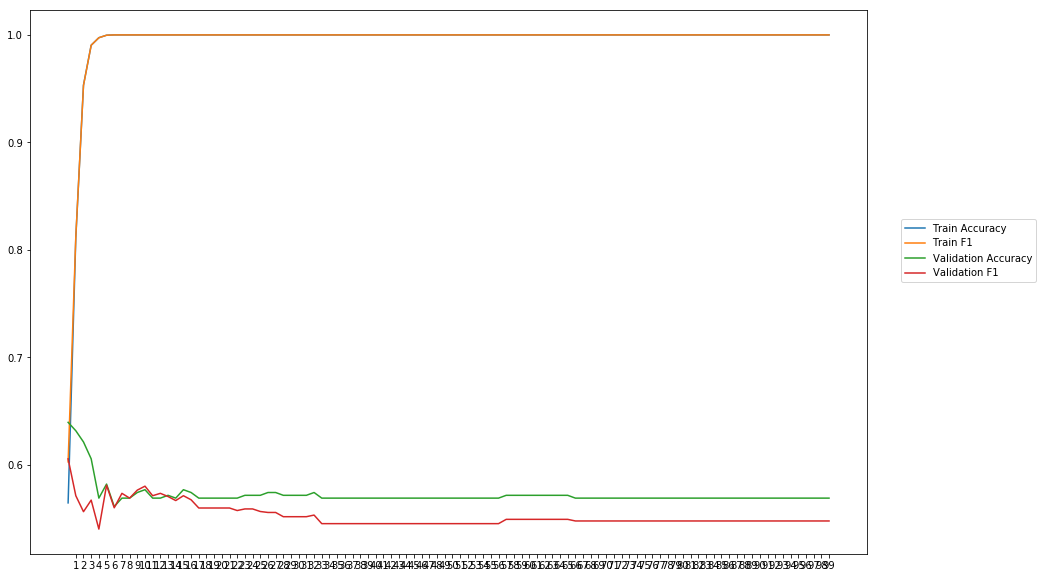

Average Accuracy: 57.23%
Average Precision: 57.82%
Average Recall: 53.02%
Average F1: 55.28%

-----Fold 6--------


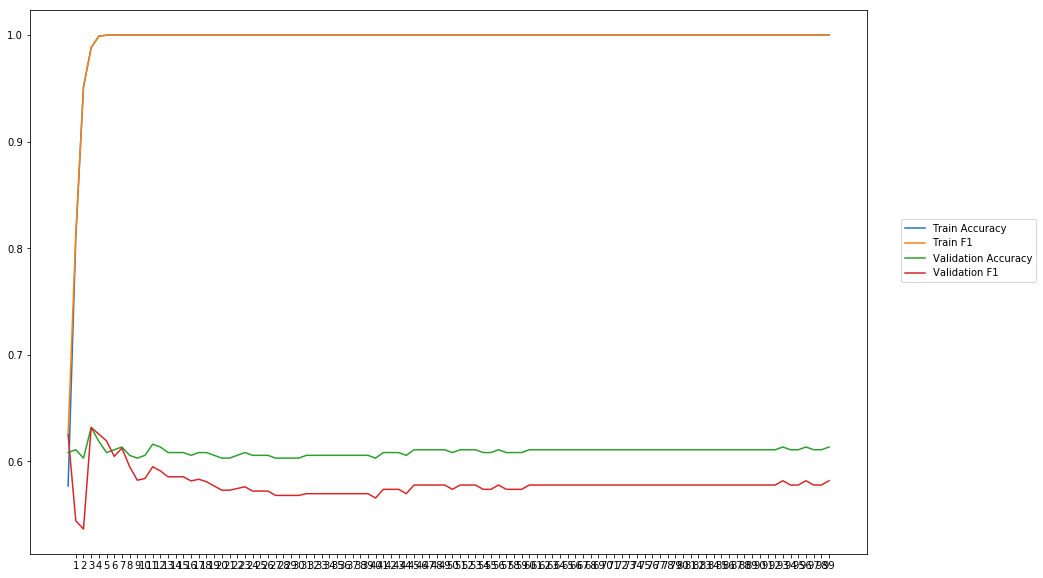

Average Accuracy: 60.93%
Average Precision: 62.62%
Average Recall: 53.88%
Average F1: 57.87%

-----Fold 7--------


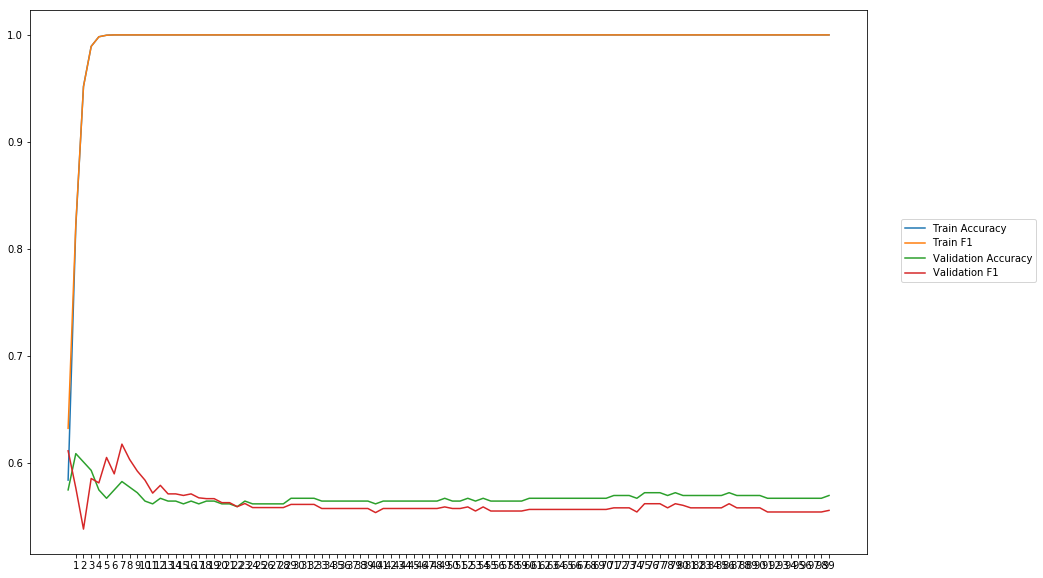

Average Accuracy: 56.74%
Average Precision: 56.78%
Average Recall: 55.71%
Average F1: 56.19%

-----Fold 8--------


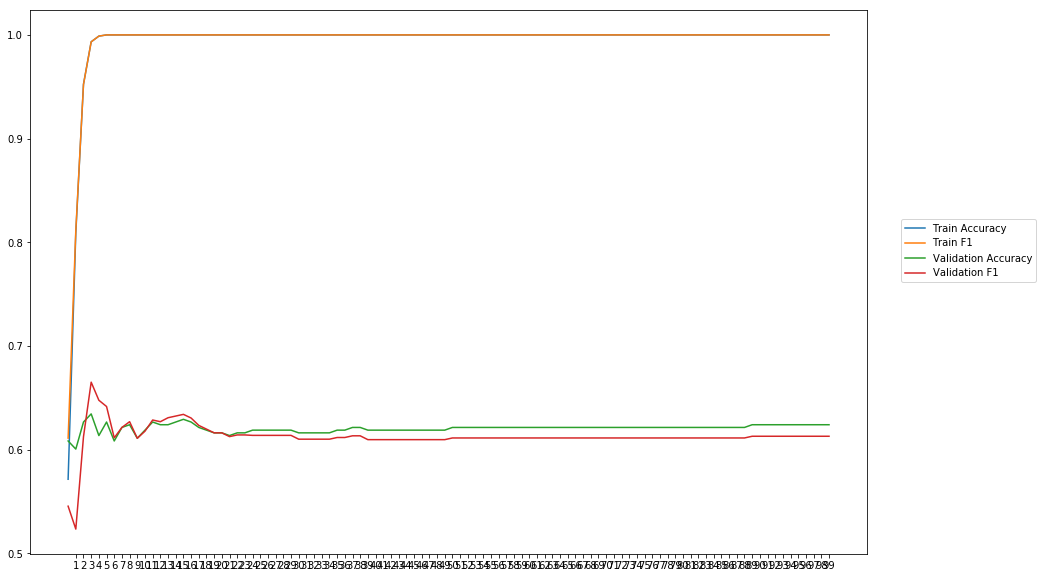

Average Accuracy: 62.05%
Average Precision: 62.38%
Average Recall: 60.35%
Average F1: 61.29%

-----Fold 9--------


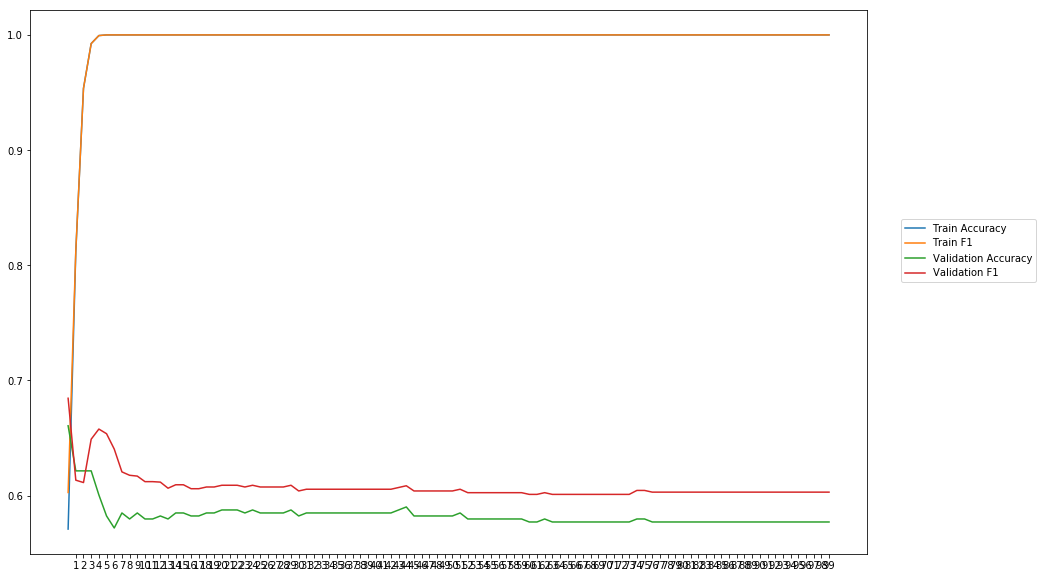

Average Accuracy: 58.30%
Average Precision: 57.26%
Average Recall: 64.80%
Average F1: 60.76%

-----Fold 10--------


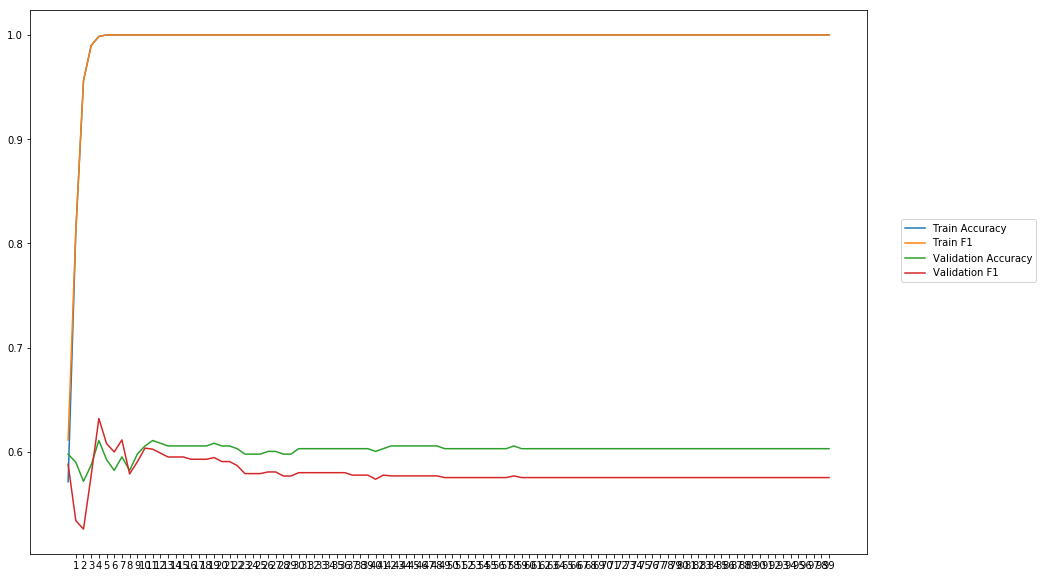

Average Accuracy: 60.22%
Average Precision: 61.29%
Average Recall: 55.07%
Average F1: 57.97%

-------Overallresults-------


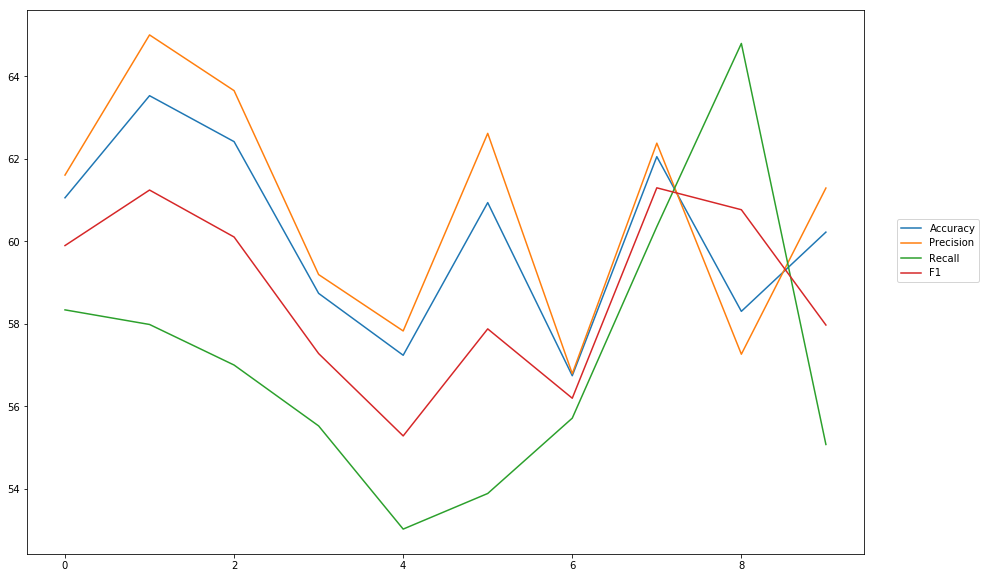

Accuracy: Mean = 60.12% (+/- 2.17%), Max = 63.53%, Min =  56.74%
Precision: Mean = 60.76% (+/- 2.69%), Max = 65.00%, Min =  56.78%
Recall: Mean = 57.16% (+/- 3.28%), Max = 64.80%, Min =  53.02%
F1: Mean = 58.79% (+/- 2.05%), Max = 61.29%, Min =  55.28%


In [16]:
#Train and test the basic architecture with 10-fold corss validation
cross_val(model, 100, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'epoch_100')


-----Fold 1--------


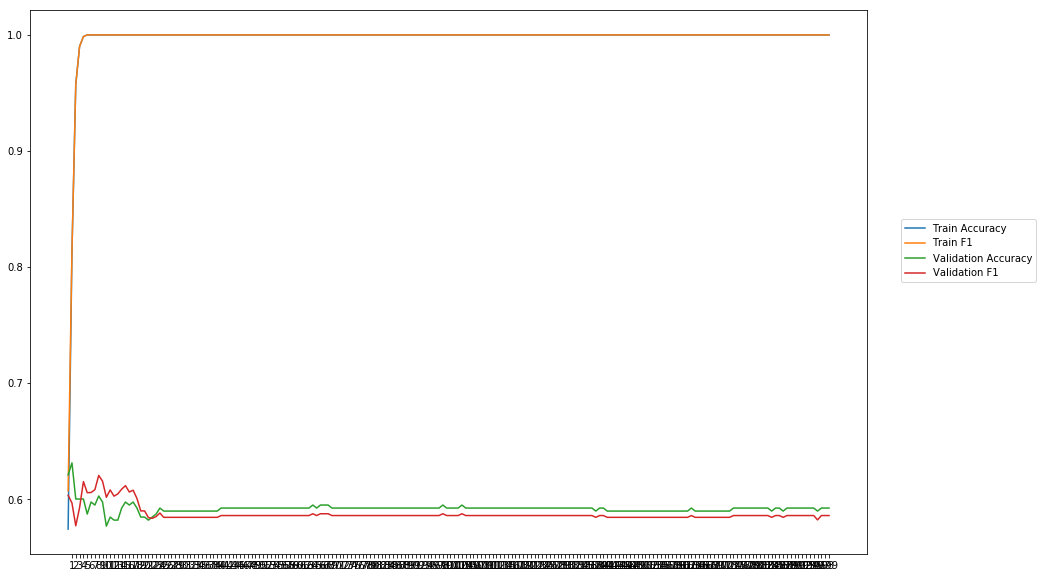

Average Accuracy: 59.18%
Average Precision: 59.25%
Average Recall: 58.24%
Average F1: 58.72%

-----Fold 2--------


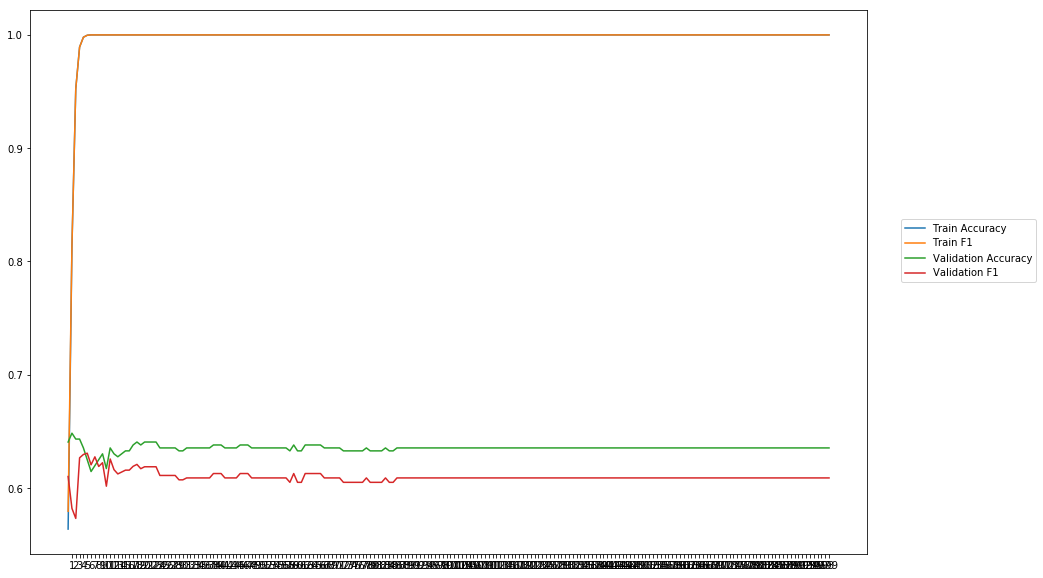

Average Accuracy: 63.52%
Average Precision: 65.18%
Average Recall: 57.32%
Average F1: 60.97%

-----Fold 3--------


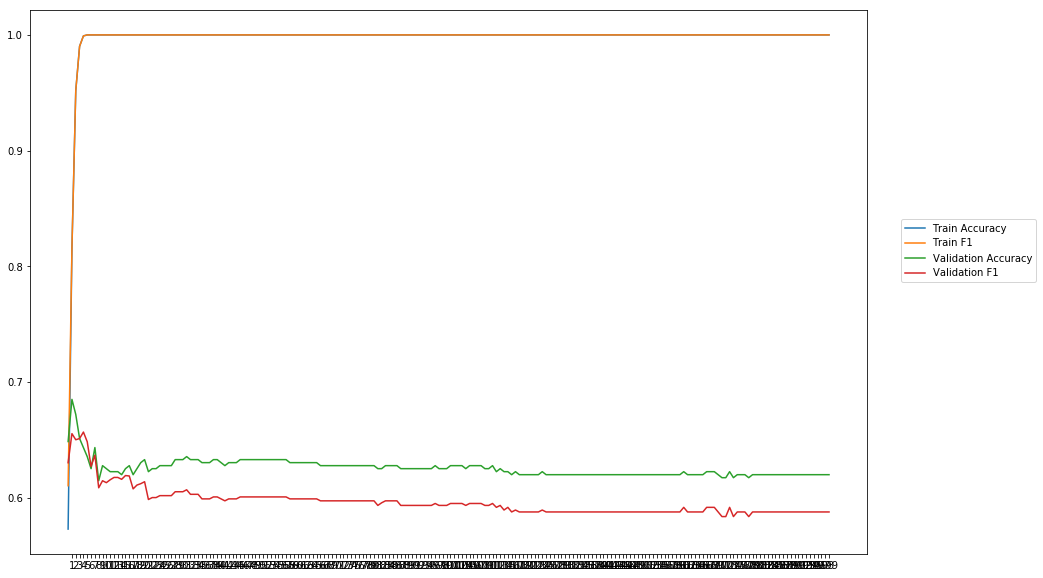

Average Accuracy: 62.55%
Average Precision: 64.27%
Average Recall: 55.67%
Average F1: 59.64%

-----Fold 4--------


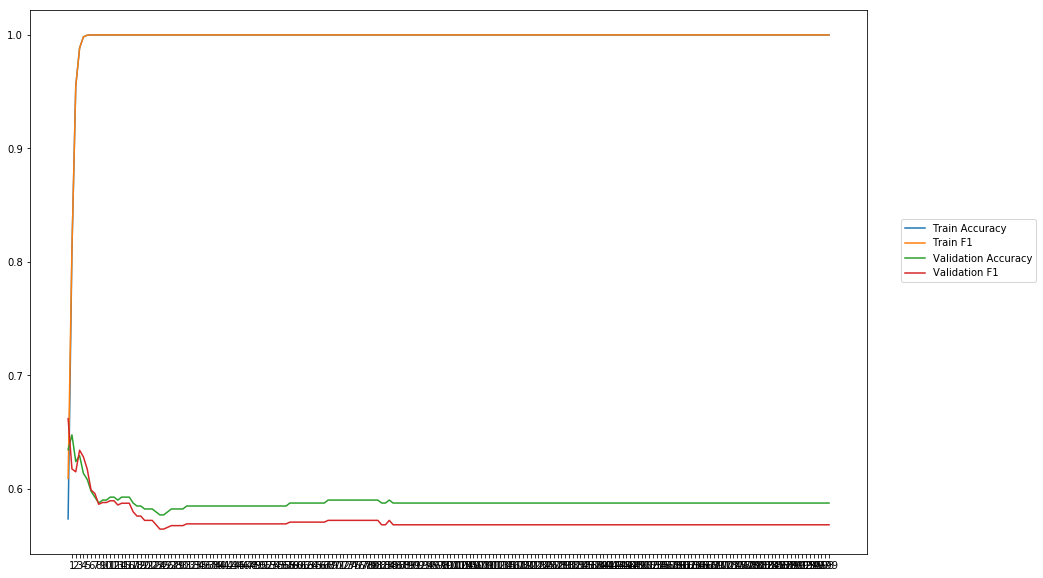

Average Accuracy: 58.83%
Average Precision: 59.39%
Average Recall: 55.18%
Average F1: 57.19%

-----Fold 5--------


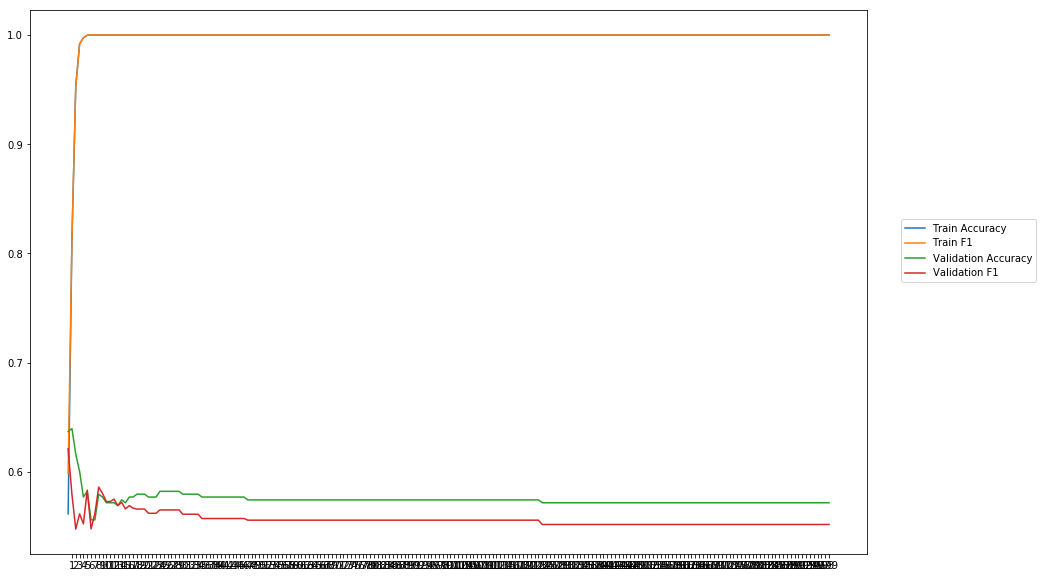

Average Accuracy: 57.49%
Average Precision: 58.03%
Average Recall: 53.49%
Average F1: 55.65%

-----Fold 6--------


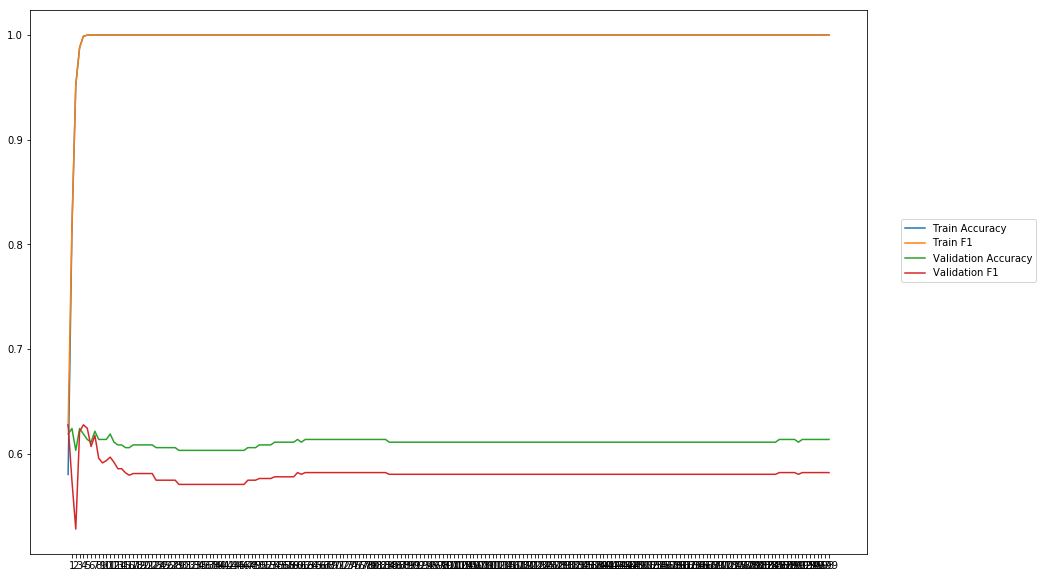

Average Accuracy: 61.06%
Average Precision: 62.72%
Average Recall: 54.09%
Average F1: 58.06%

-----Fold 7--------


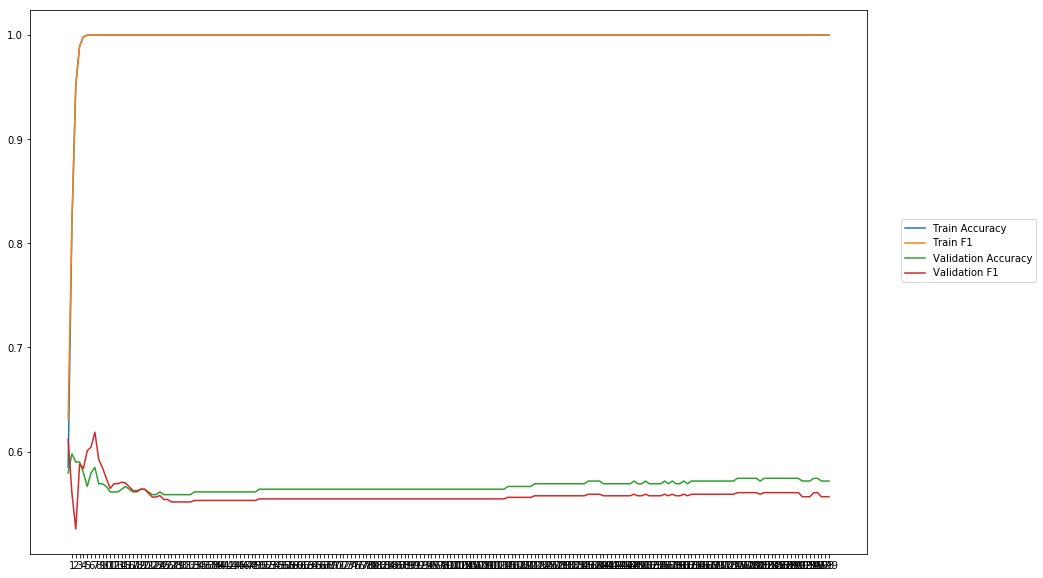

Average Accuracy: 56.72%
Average Precision: 56.86%
Average Recall: 54.91%
Average F1: 55.84%

-----Fold 8--------


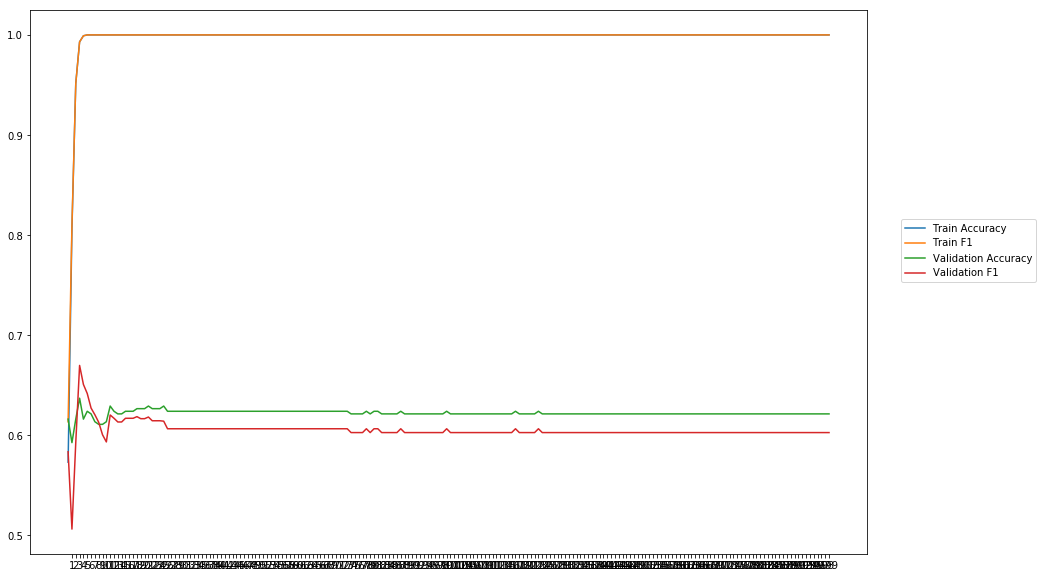

Average Accuracy: 62.21%
Average Precision: 63.19%
Average Recall: 58.11%
Average F1: 60.51%

-----Fold 9--------


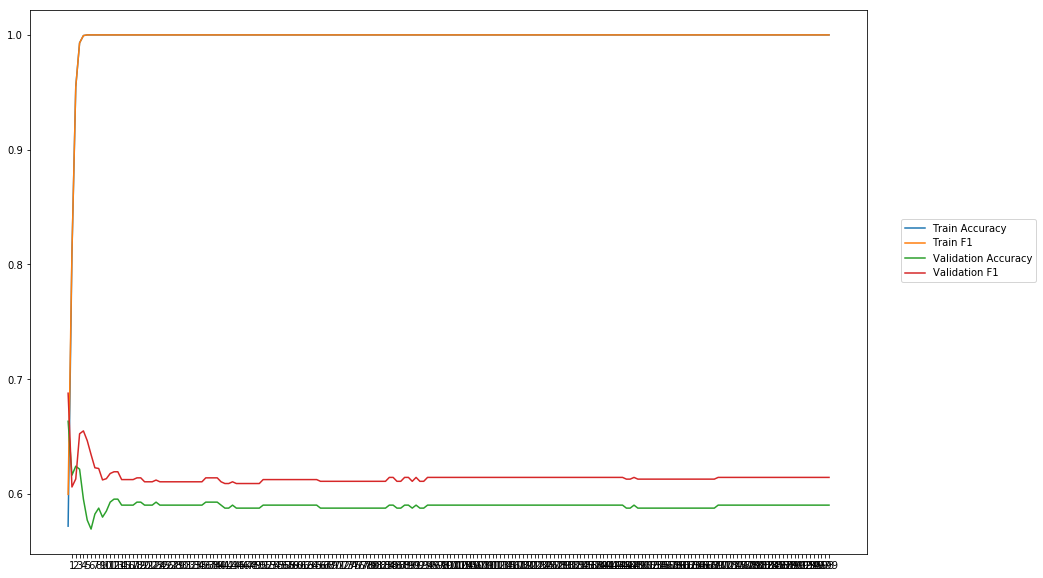

Average Accuracy: 59.01%
Average Precision: 57.89%
Average Recall: 65.40%
Average F1: 61.40%

-----Fold 10--------


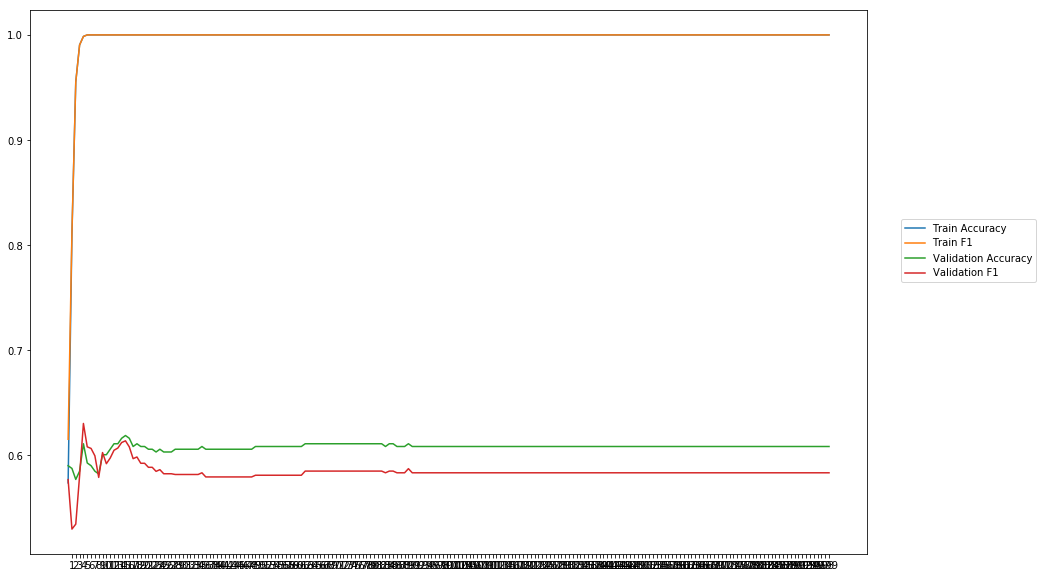

Average Accuracy: 60.75%
Average Precision: 61.94%
Average Recall: 55.32%
Average F1: 58.42%

-------Overallresults-------


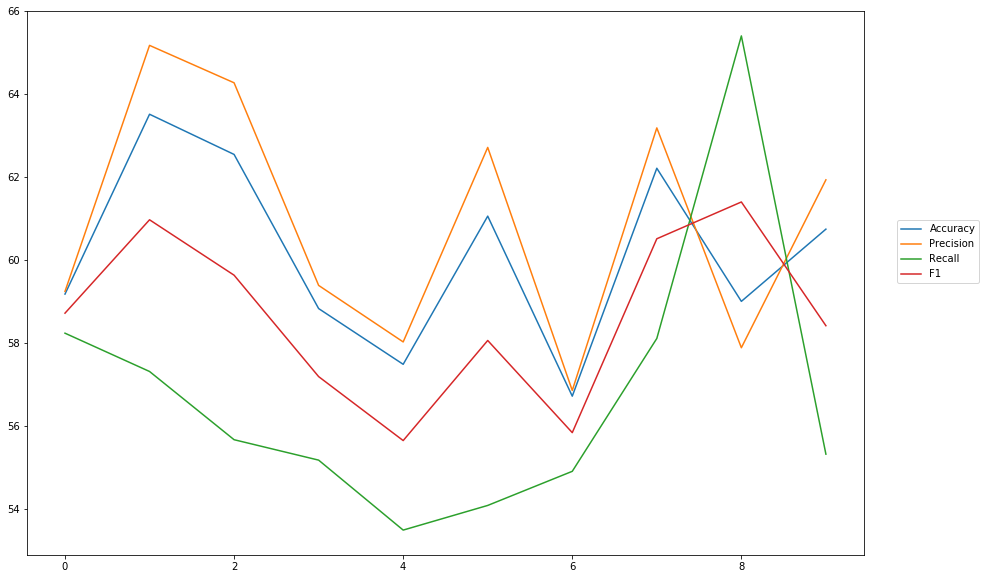

Accuracy: Mean = 60.13% (+/- 2.13%), Max = 63.52%, Min =  56.72%
Precision: Mean = 60.87% (+/- 2.79%), Max = 65.18%, Min =  56.86%
Recall: Mean = 56.77% (+/- 3.26%), Max = 65.40%, Min =  53.49%
F1: Mean = 58.64% (+/- 1.92%), Max = 61.40%, Min =  55.65%


In [17]:
#Train and test the basic architecture with 10-fold corss validation
cross_val(model, 200, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'epoch_200')


-----Fold 1--------


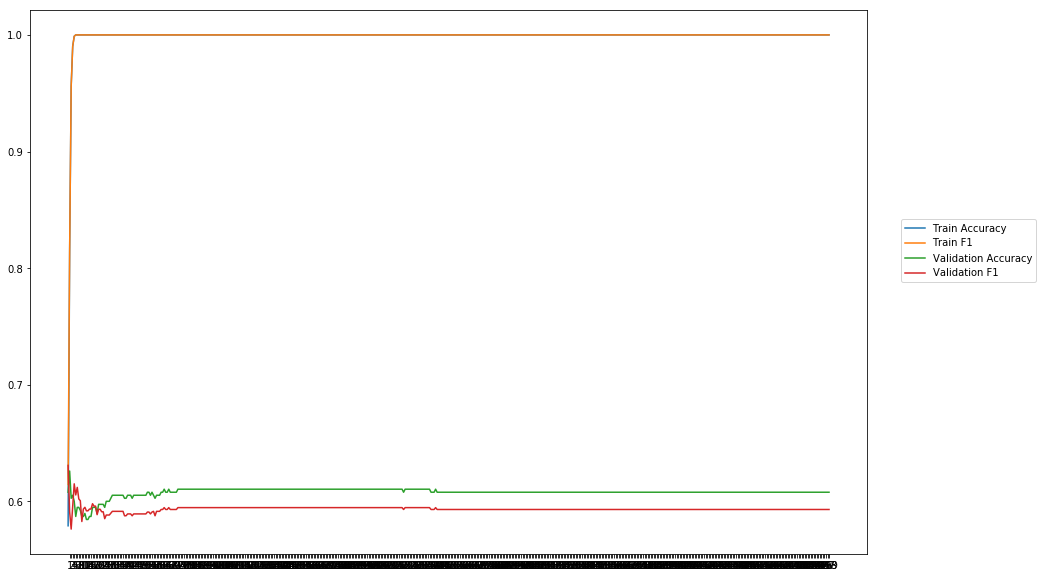

Average Accuracy: 60.78%
Average Precision: 61.44%
Average Recall: 57.41%
Average F1: 59.35%

-----Fold 2--------


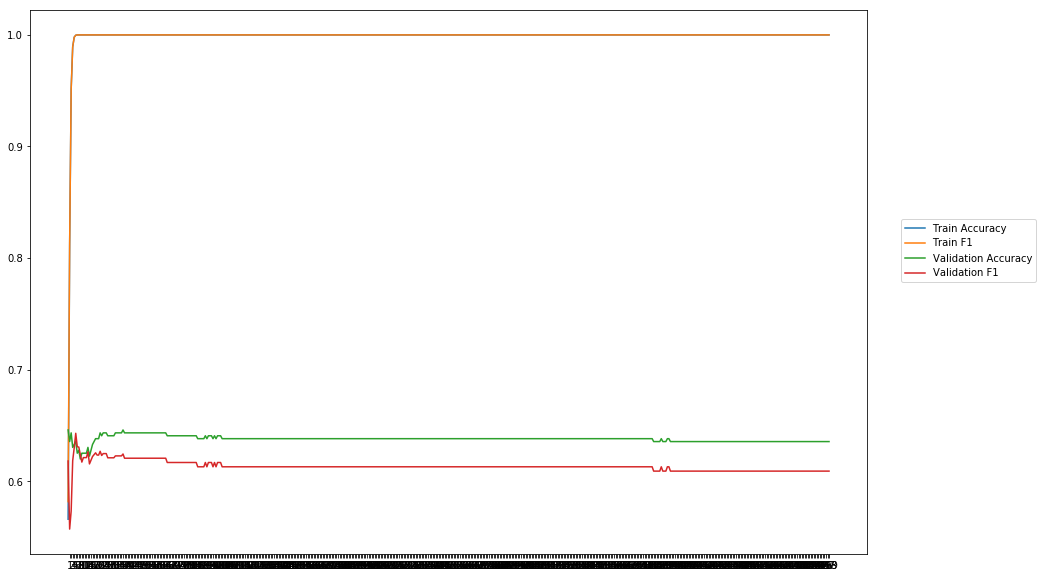

Average Accuracy: 63.77%
Average Precision: 65.40%
Average Recall: 57.73%
Average F1: 61.31%

-----Fold 3--------


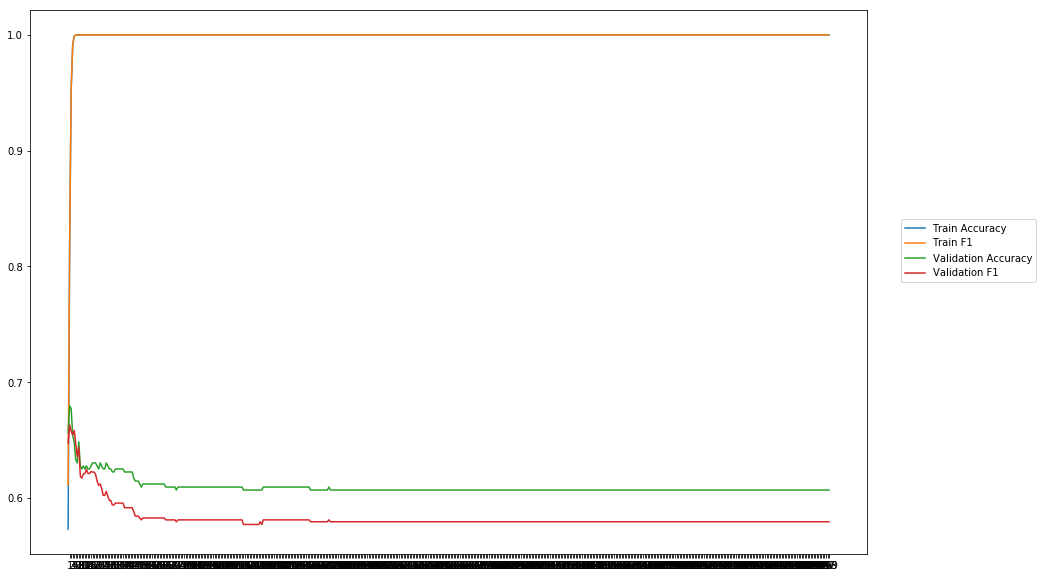

Average Accuracy: 60.95%
Average Precision: 62.18%
Average Recall: 54.84%
Average F1: 58.27%

-----Fold 4--------


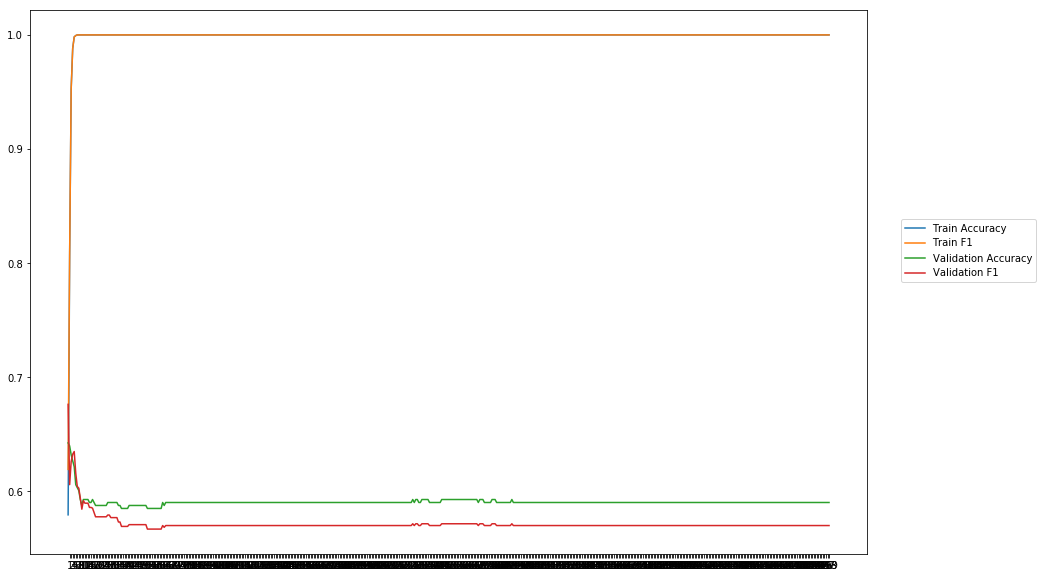

Average Accuracy: 59.05%
Average Precision: 59.77%
Average Recall: 54.75%
Average F1: 57.14%

-----Fold 5--------


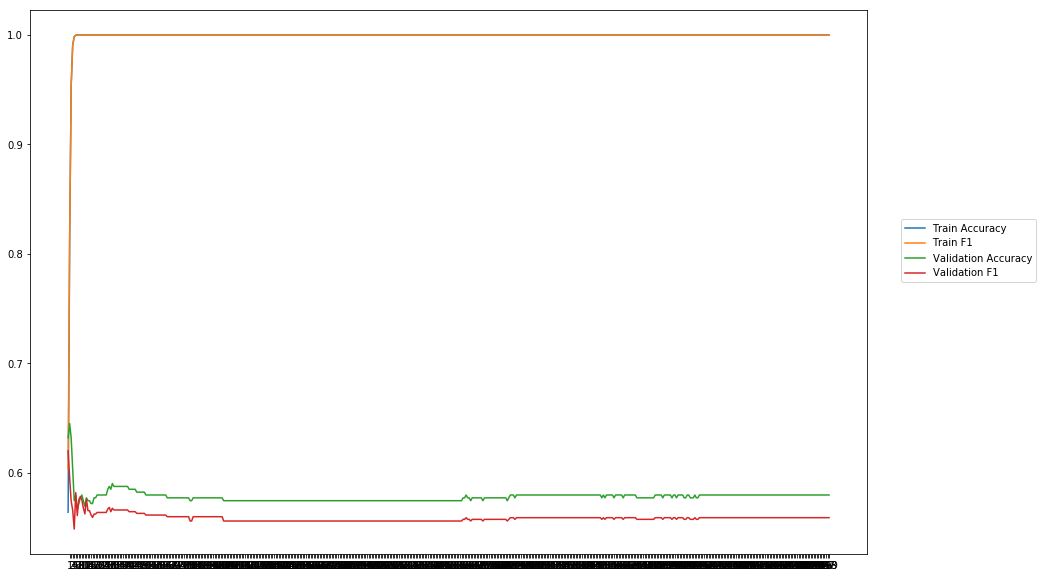

Average Accuracy: 57.80%
Average Precision: 58.39%
Average Recall: 53.57%
Average F1: 55.87%

-----Fold 6--------


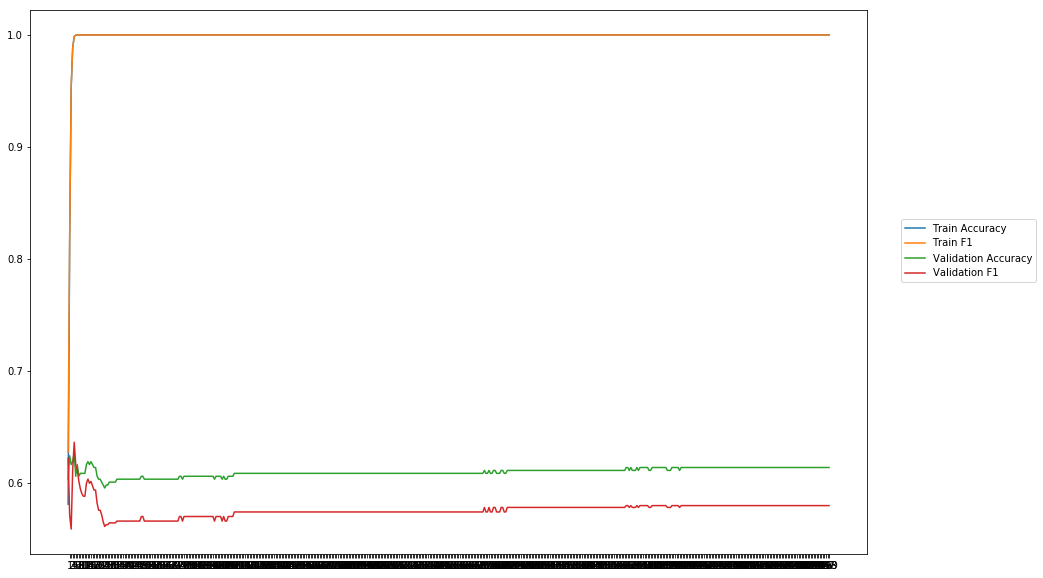

Average Accuracy: 60.95%
Average Precision: 62.82%
Average Recall: 53.17%
Average F1: 57.58%

-----Fold 7--------


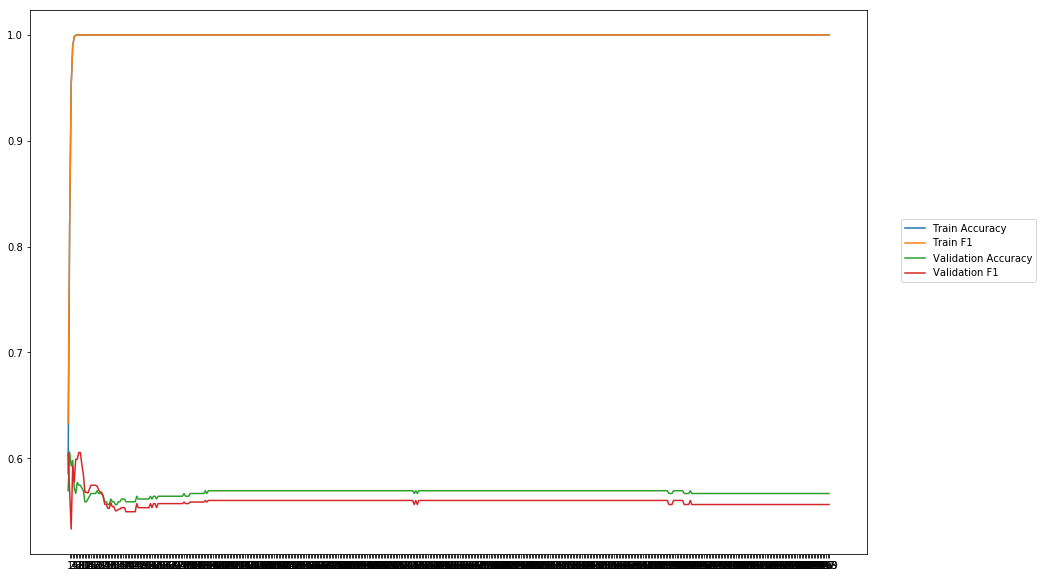

Average Accuracy: 56.79%
Average Precision: 56.91%
Average Recall: 55.04%
Average F1: 55.95%

-----Fold 8--------


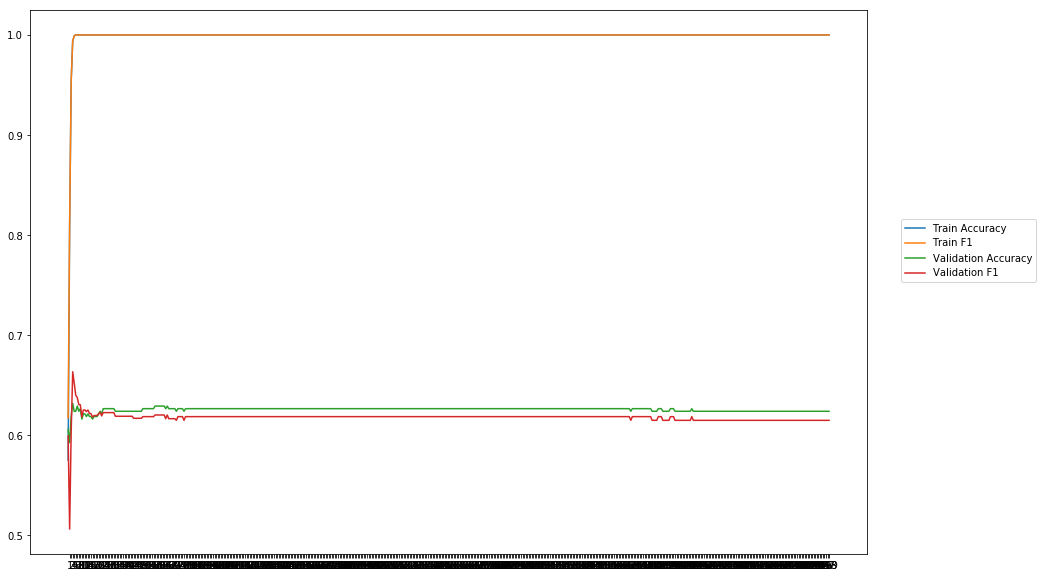

Average Accuracy: 62.57%
Average Precision: 62.93%
Average Recall: 60.72%
Average F1: 61.80%

-----Fold 9--------


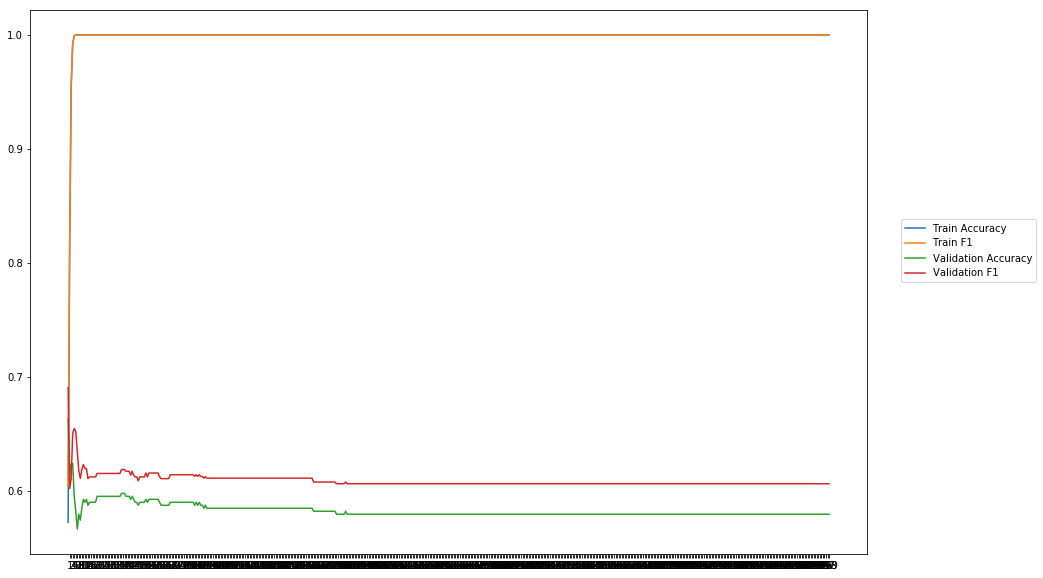

Average Accuracy: 58.28%
Average Precision: 57.18%
Average Recall: 65.14%
Average F1: 60.89%

-----Fold 10--------


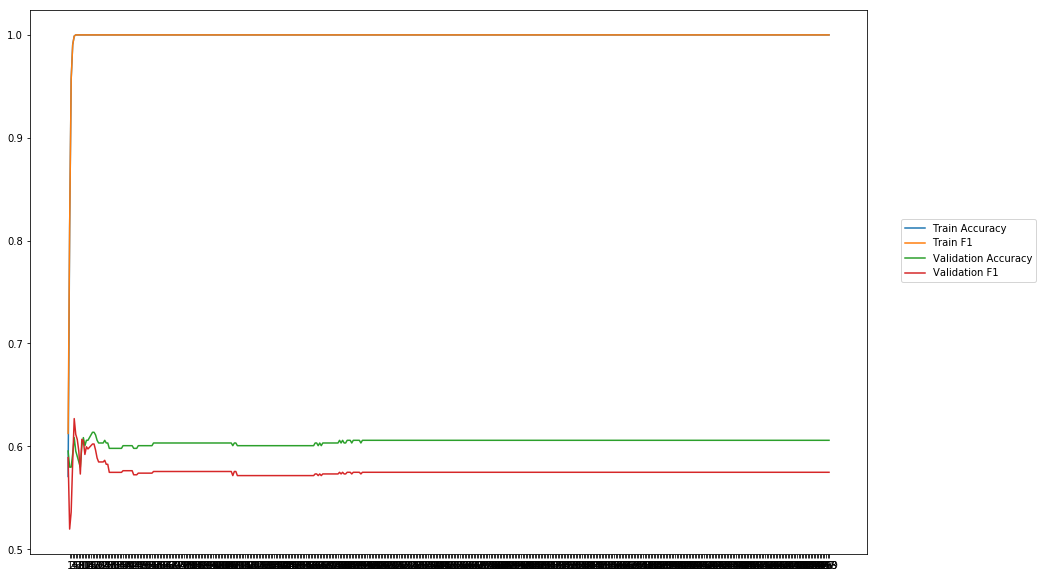

Average Accuracy: 60.42%
Average Precision: 61.89%
Average Recall: 53.74%
Average F1: 57.51%

-------Overallresults-------


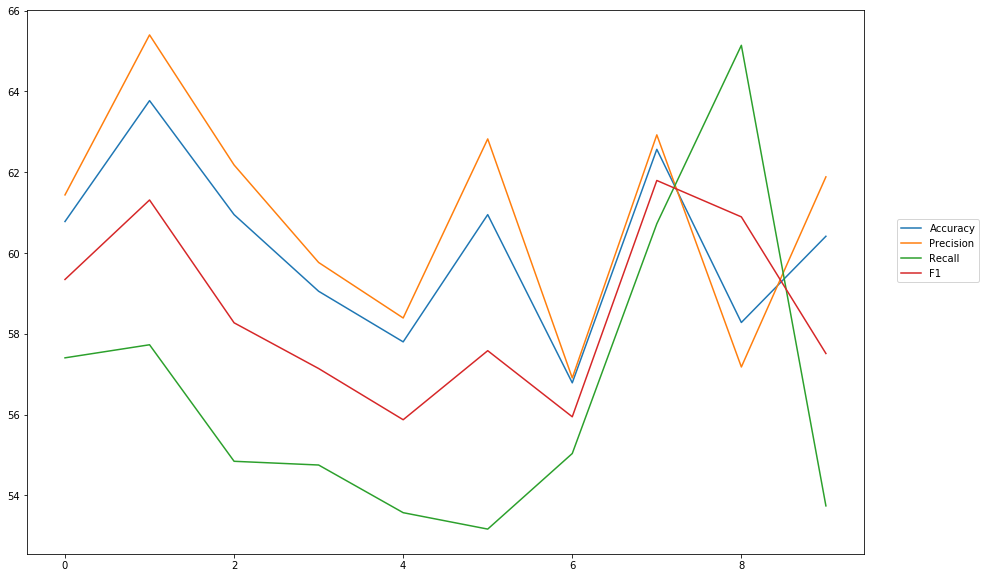

Accuracy: Mean = 60.14% (+/- 2.06%), Max = 63.77%, Min =  56.79%
Precision: Mean = 60.89% (+/- 2.61%), Max = 65.40%, Min =  56.91%
Recall: Mean = 56.61% (+/- 3.61%), Max = 65.14%, Min =  53.17%
F1: Mean = 58.57% (+/- 2.06%), Max = 61.80%, Min =  55.87%


In [18]:
cross_val(model, 500, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'epoch_500')


-----Fold 1--------


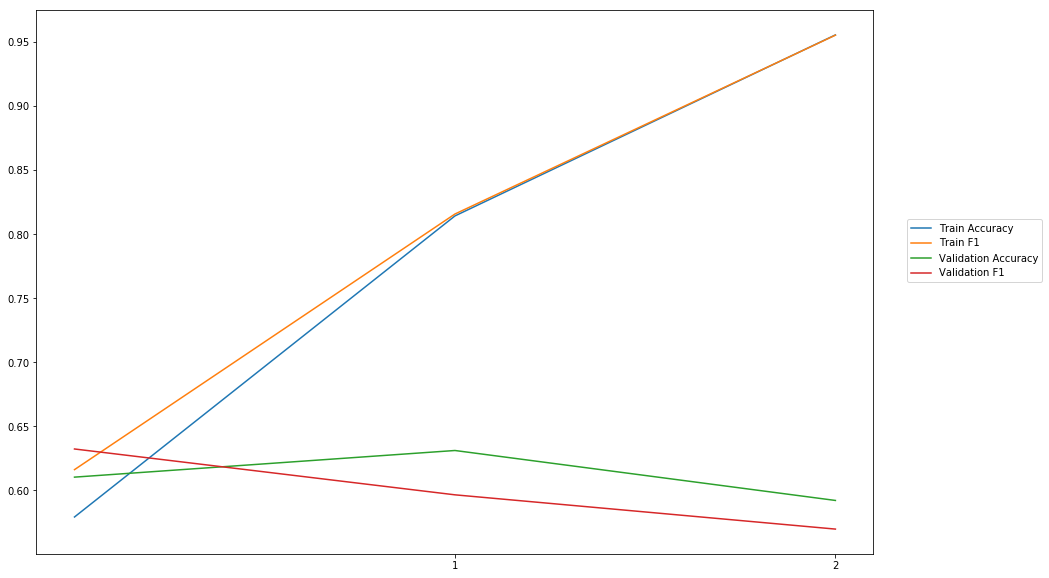

Average Accuracy: 61.13%
Average Precision: 61.82%
Average Recall: 58.68%
Average F1: 59.96%

-----Fold 2--------


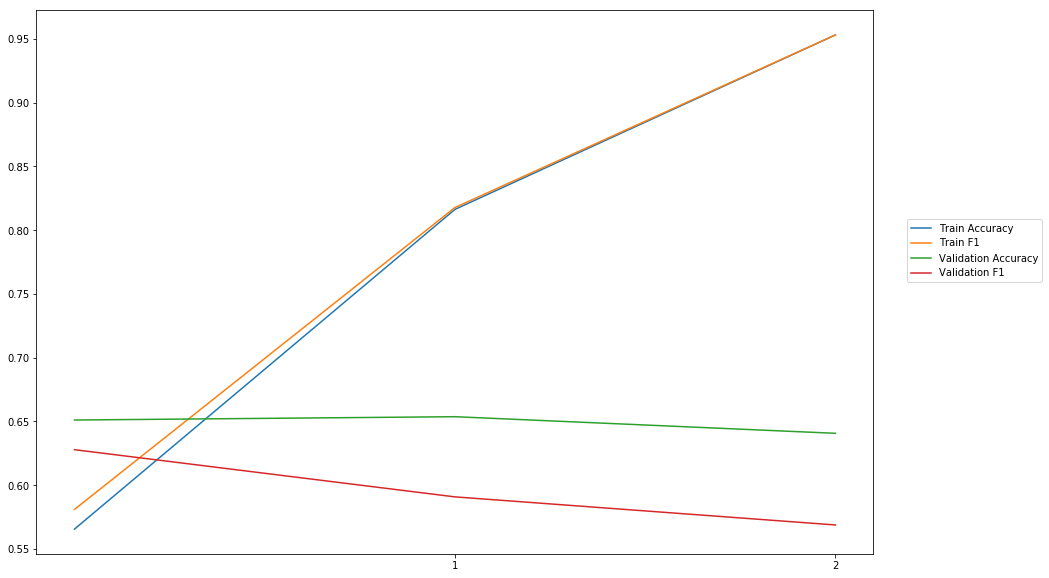

Average Accuracy: 64.84%
Average Precision: 69.68%
Average Recall: 52.36%
Average F1: 59.58%

-----Fold 3--------


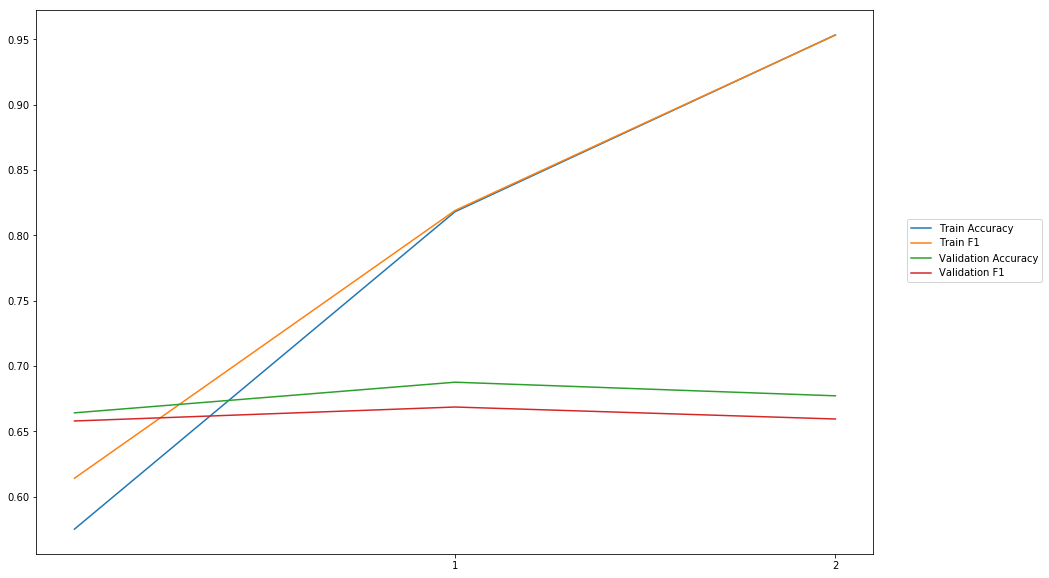

Average Accuracy: 67.62%
Average Precision: 68.93%
Average Recall: 63.70%
Average F1: 66.19%

-----Fold 4--------


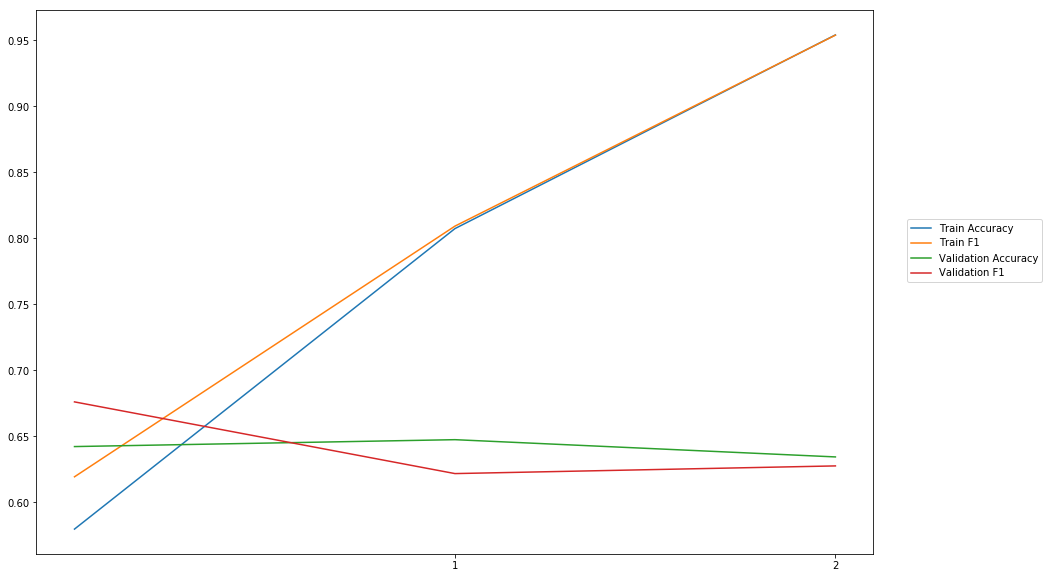

Average Accuracy: 64.14%
Average Precision: 64.10%
Average Recall: 64.92%
Average F1: 64.19%

-----Fold 5--------


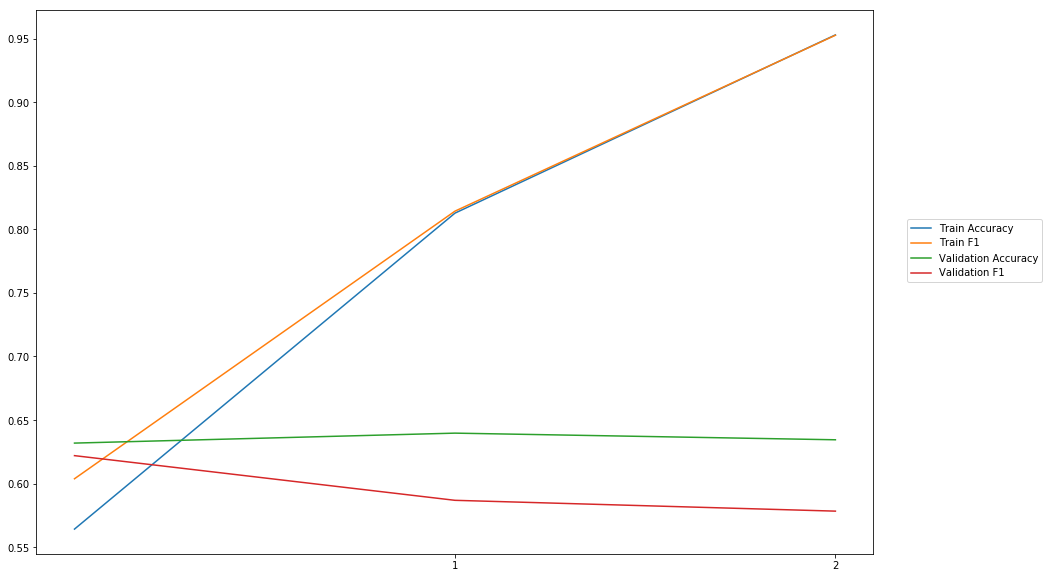

Average Accuracy: 63.53%
Average Precision: 66.78%
Average Recall: 54.10%
Average F1: 59.57%

-----Fold 6--------


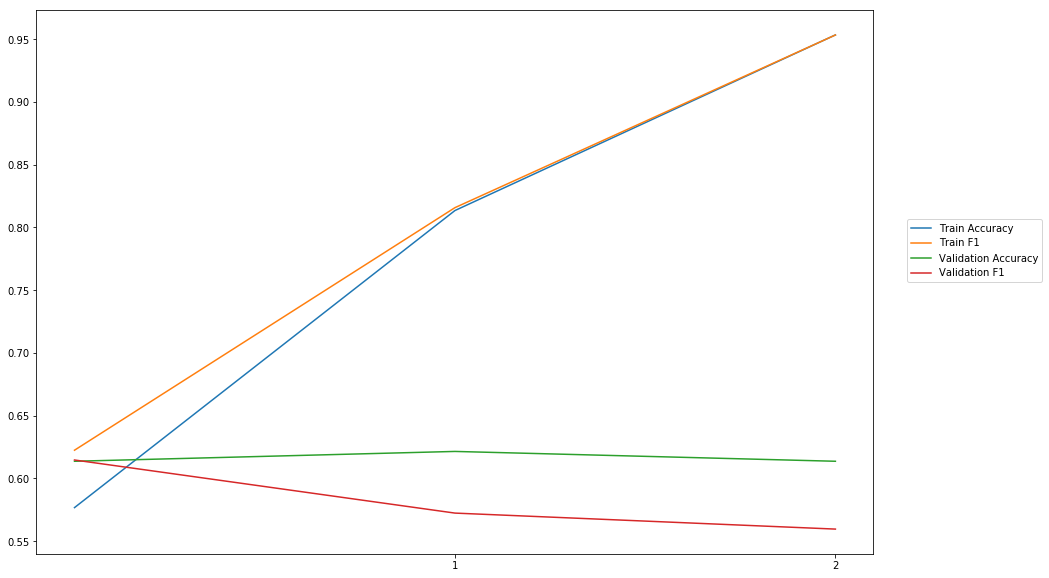

Average Accuracy: 61.62%
Average Precision: 63.84%
Average Recall: 53.93%
Average F1: 58.21%

-----Fold 7--------


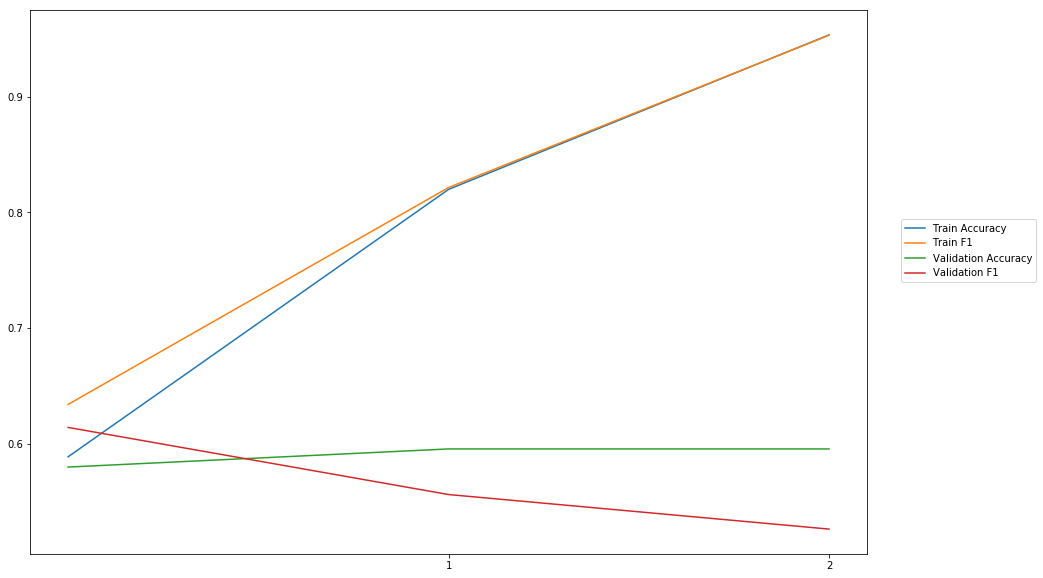

Average Accuracy: 59.01%
Average Precision: 60.42%
Average Recall: 54.28%
Average F1: 56.53%

-----Fold 8--------


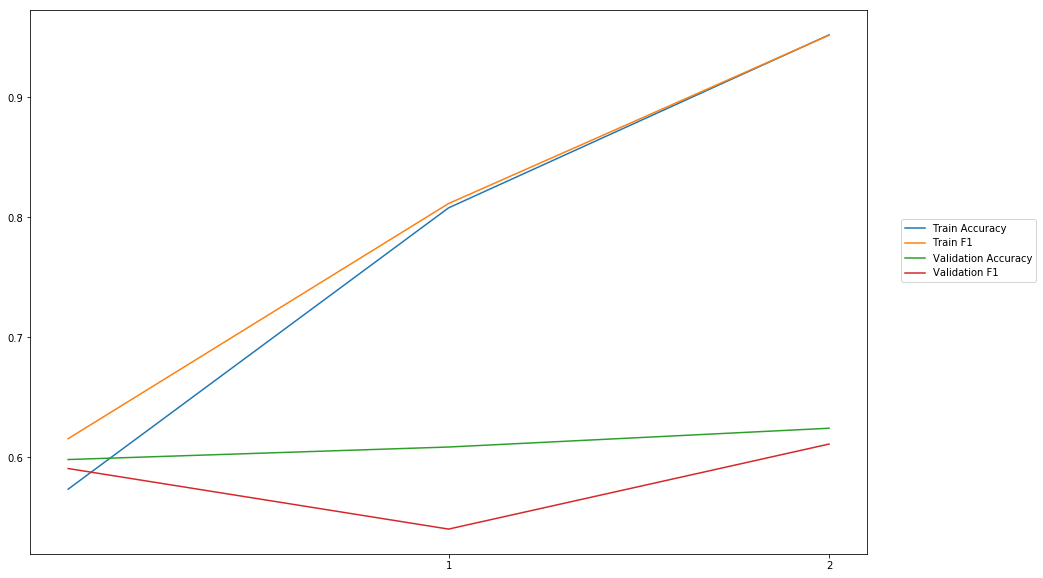

Average Accuracy: 61.01%
Average Precision: 62.77%
Average Recall: 54.45%
Average F1: 58.04%

-----Fold 9--------


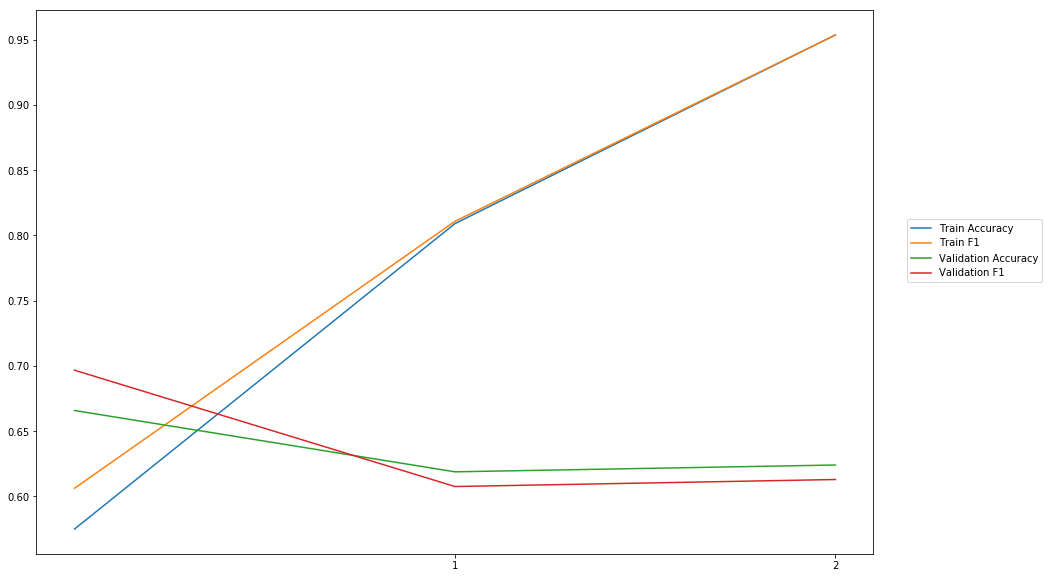

Average Accuracy: 63.62%
Average Precision: 63.02%
Average Recall: 65.27%
Average F1: 63.90%

-----Fold 10--------


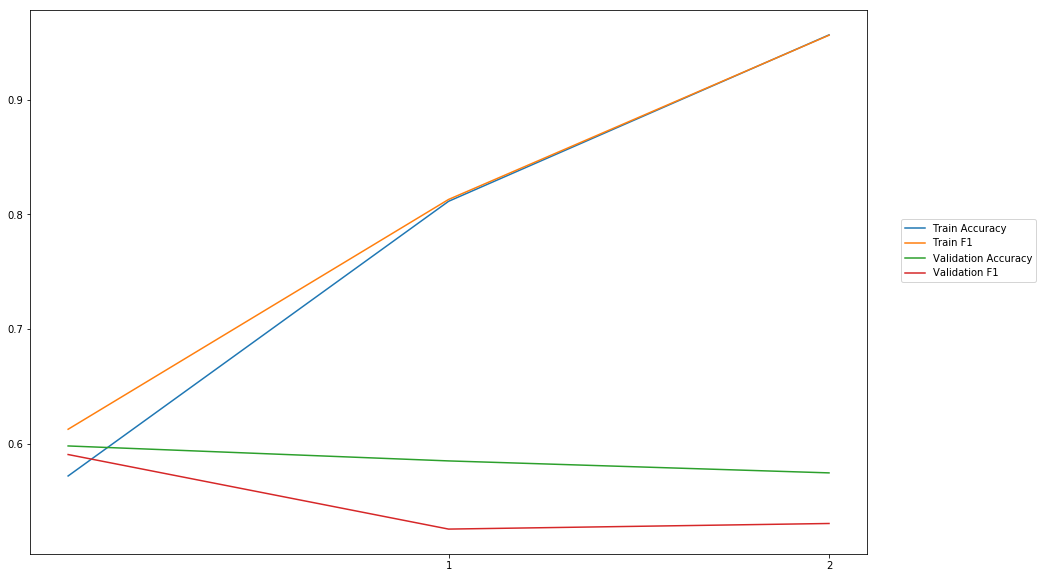

Average Accuracy: 58.57%
Average Precision: 60.03%
Average Recall: 50.79%
Average F1: 54.87%

-------Overallresults-------


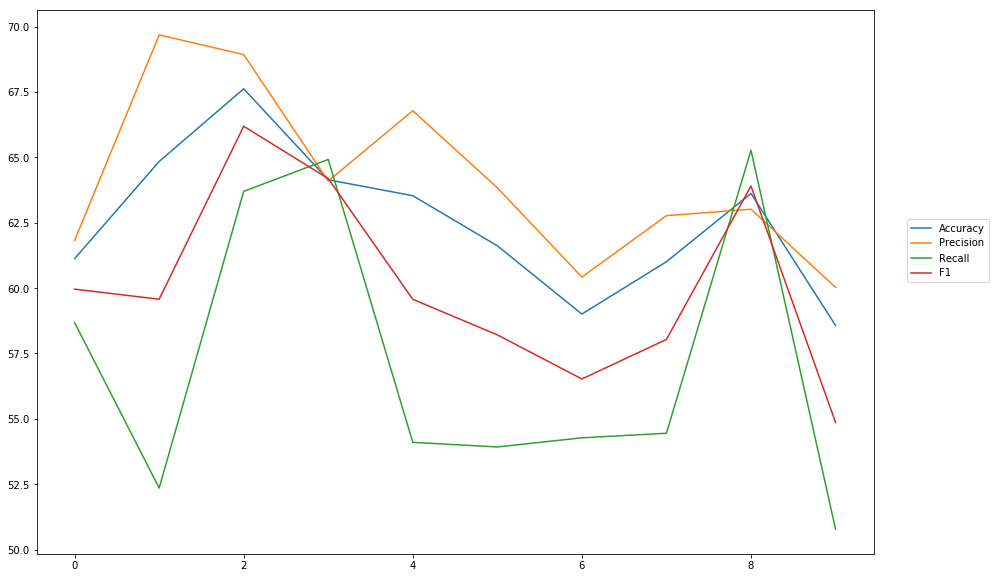

Accuracy: Mean = 62.51% (+/- 2.63%), Max = 67.62%, Min =  58.57%
Precision: Mean = 64.14% (+/- 3.16%), Max = 69.68%, Min =  60.03%
Recall: Mean = 57.25% (+/- 5.20%), Max = 65.27%, Min =  50.79%
F1: Mean = 60.10% (+/- 3.42%), Max = 66.19%, Min =  54.87%


In [20]:
cross_val(model, 3, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'epoch_3')


-----Fold 1--------


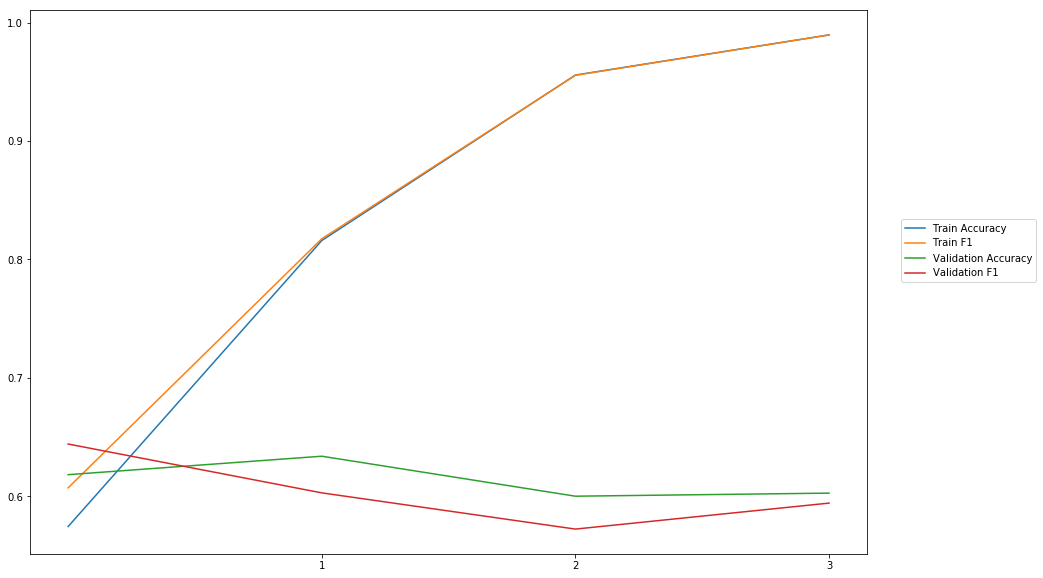

Average Accuracy: 61.36%
Average Precision: 61.92%
Average Recall: 59.24%
Average F1: 60.33%

-----Fold 2--------


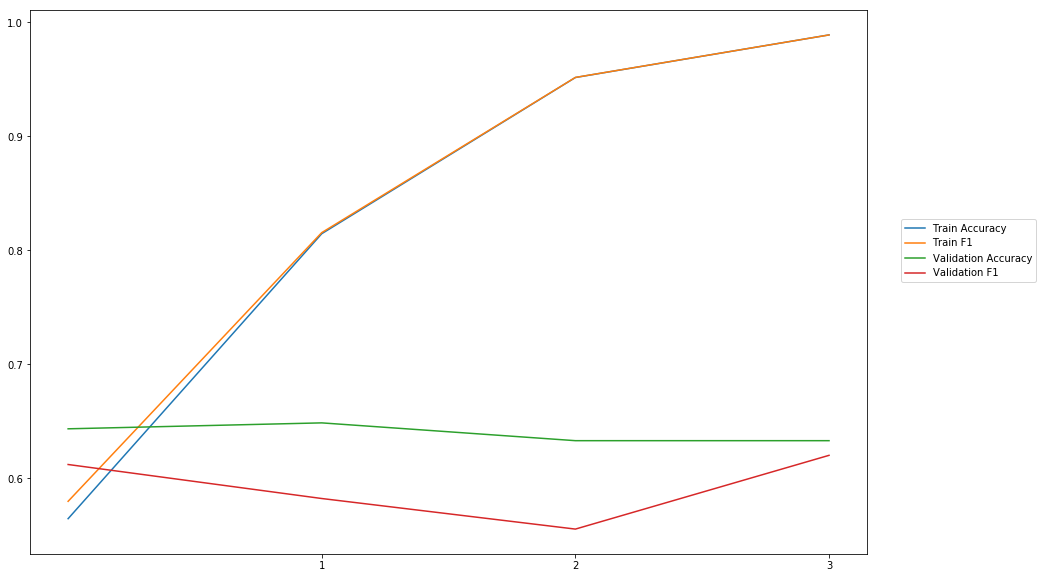

Average Accuracy: 63.93%
Average Precision: 67.90%
Average Recall: 53.01%
Average F1: 59.23%

-----Fold 3--------


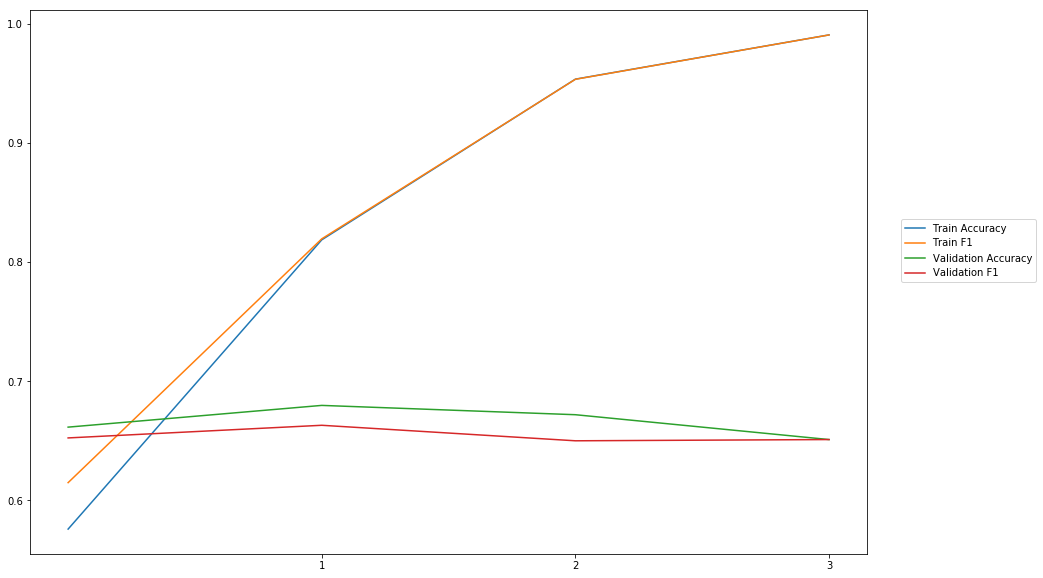

Average Accuracy: 66.60%
Average Precision: 67.55%
Average Recall: 63.48%
Average F1: 65.41%

-----Fold 4--------


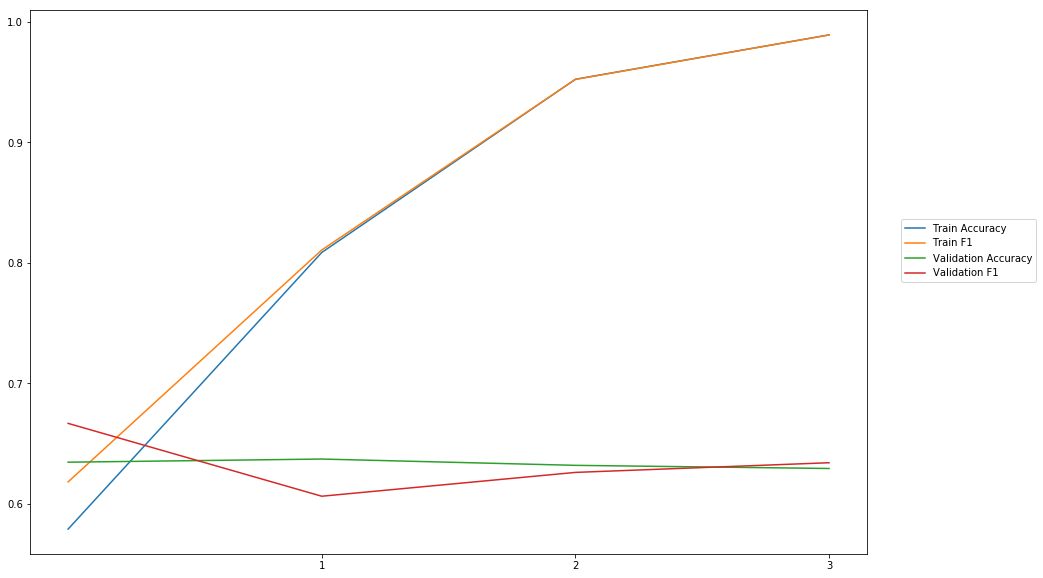

Average Accuracy: 63.32%
Average Precision: 63.27%
Average Recall: 63.87%
Average F1: 63.32%

-----Fold 5--------


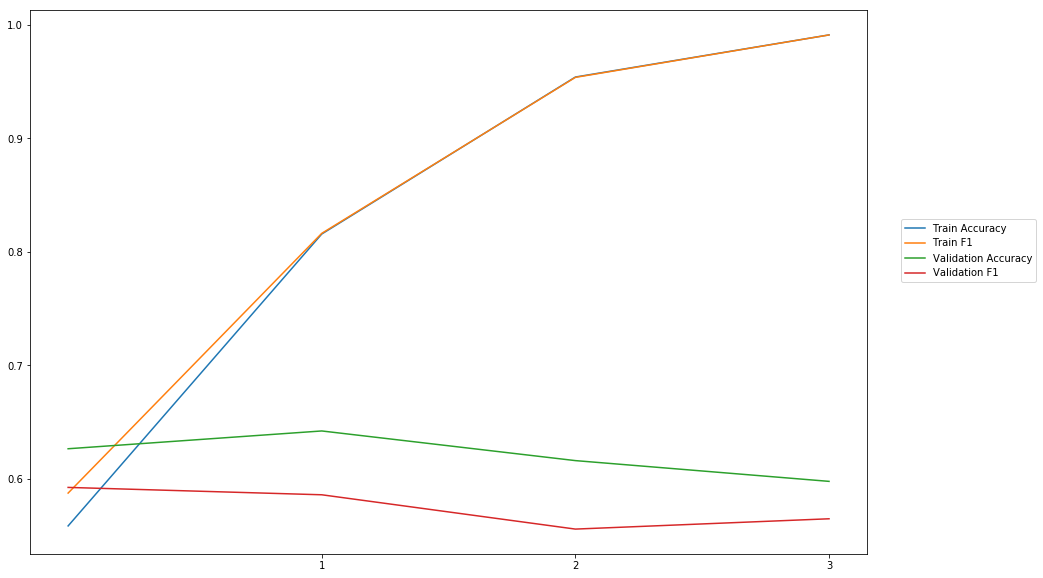

Average Accuracy: 62.08%
Average Precision: 65.34%
Average Recall: 51.44%
Average F1: 57.49%

-----Fold 6--------


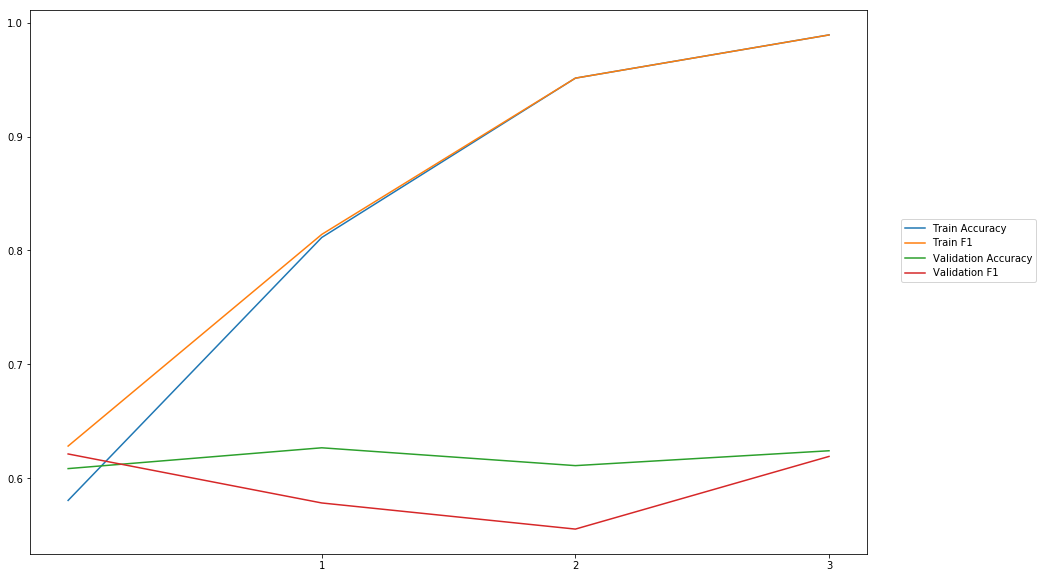

Average Accuracy: 61.75%
Average Precision: 63.34%
Average Recall: 56.41%
Average F1: 59.34%

-----Fold 7--------


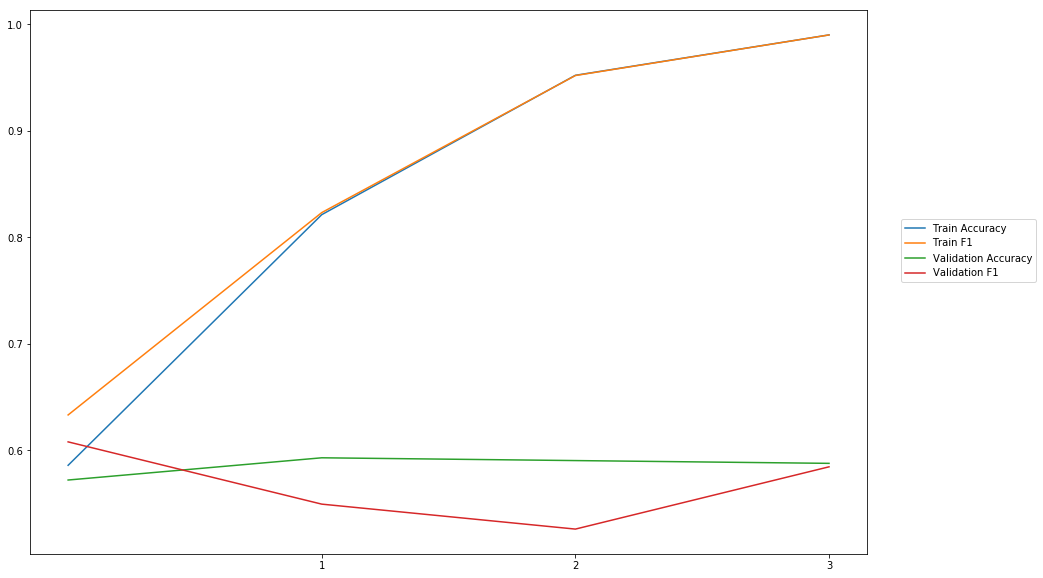

Average Accuracy: 58.55%
Average Precision: 59.53%
Average Recall: 54.97%
Average F1: 56.67%

-----Fold 8--------


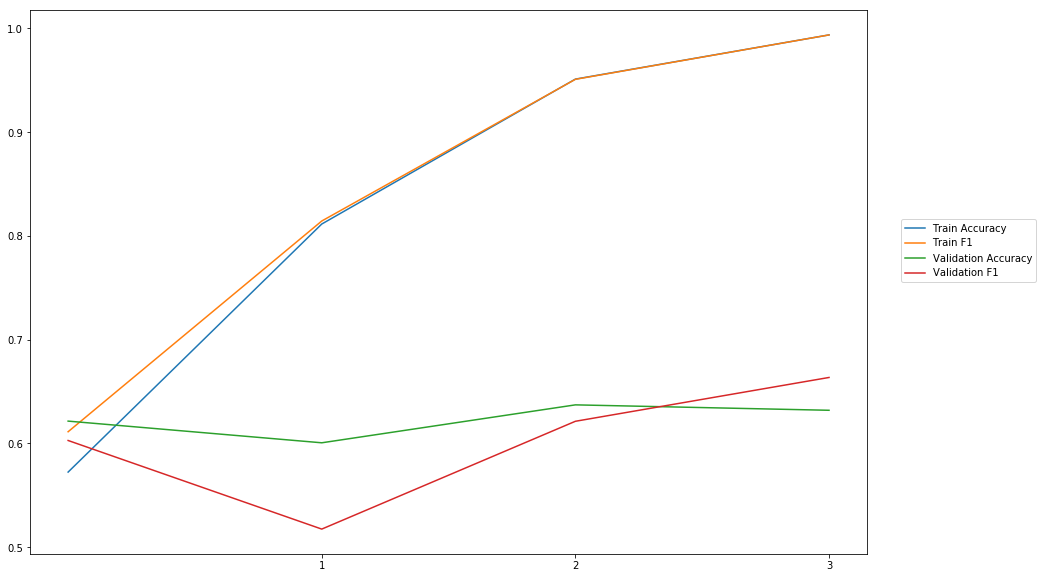

Average Accuracy: 62.27%
Average Precision: 63.51%
Average Recall: 58.25%
Average F1: 60.12%

-----Fold 9--------


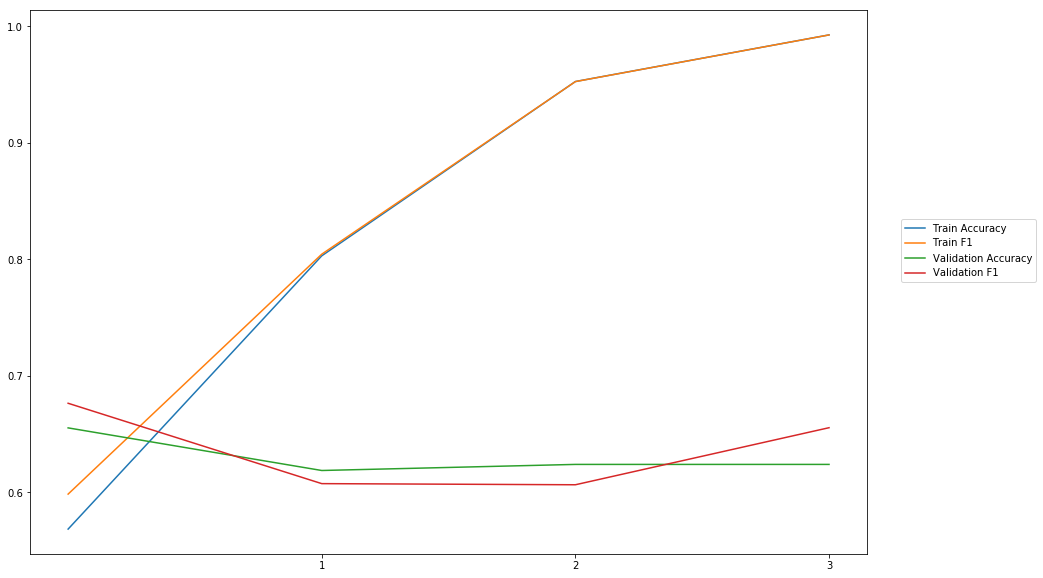

Average Accuracy: 63.05%
Average Precision: 62.45%
Average Recall: 65.31%
Average F1: 63.65%

-----Fold 10--------


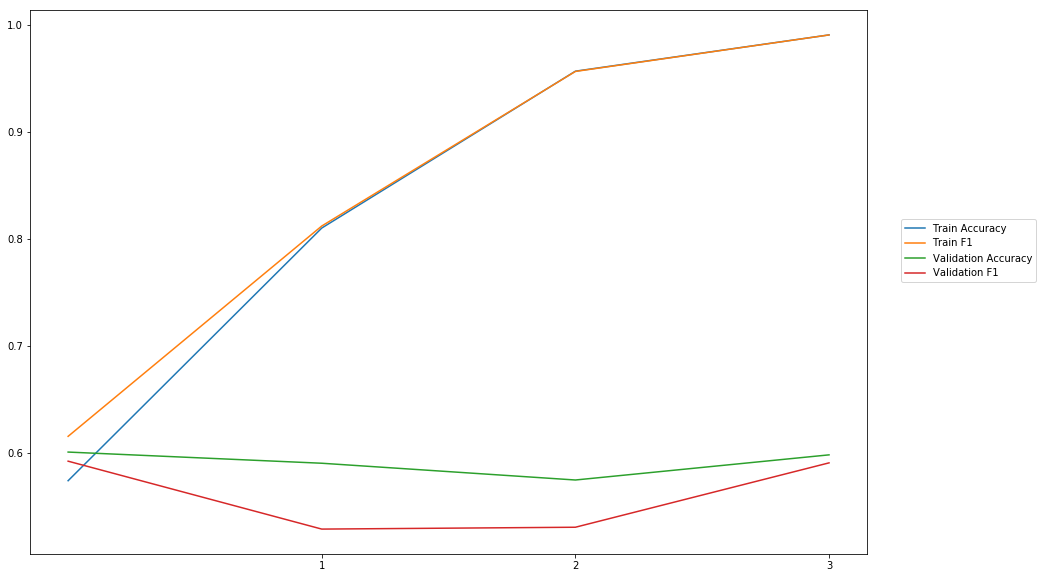

Average Accuracy: 59.07%
Average Precision: 60.32%
Average Recall: 52.62%
Average F1: 56.03%

-------Overallresults-------


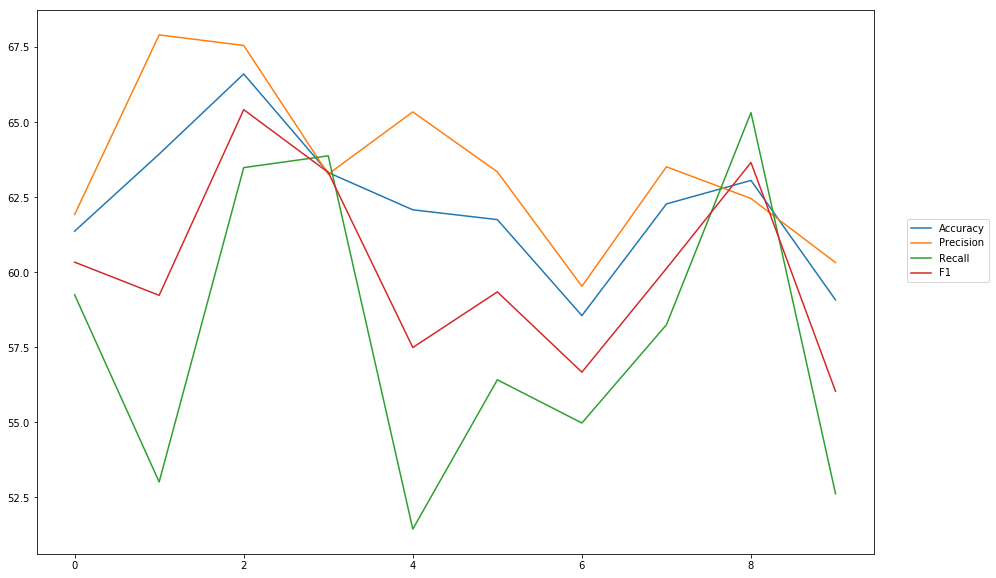

Accuracy: Mean = 62.20% (+/- 2.20%), Max = 66.60%, Min =  58.55%
Precision: Mean = 63.51% (+/- 2.62%), Max = 67.90%, Min =  59.53%
Recall: Mean = 57.86% (+/- 4.78%), Max = 65.31%, Min =  51.44%
F1: Mean = 60.16% (+/- 2.96%), Max = 65.41%, Min =  56.03%


In [21]:
cross_val(model, 4, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'epoch_4')

## Test the best model with heldout testdata

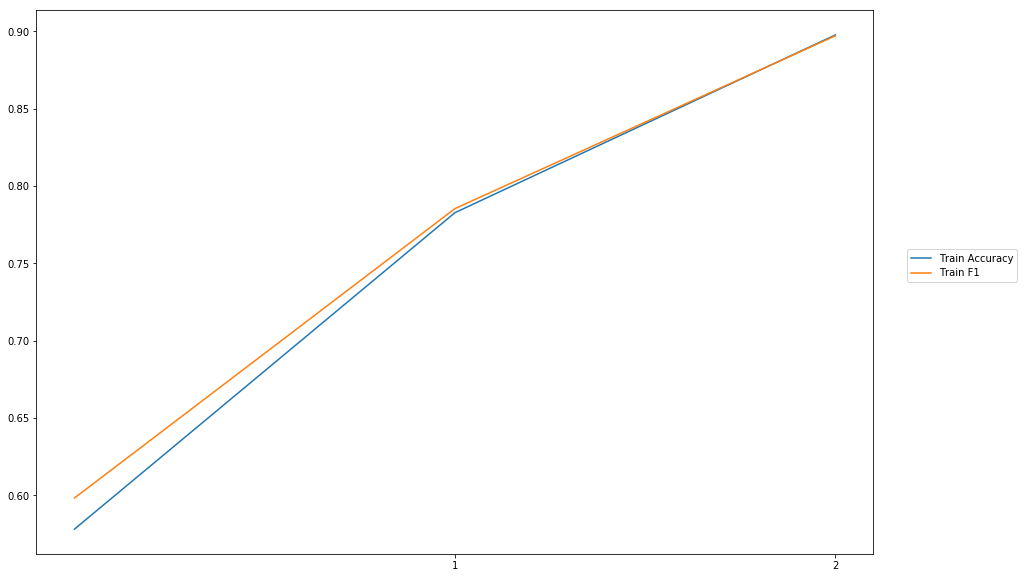


-----Test Scores----
Loss: 0.5923730353919827
Accuracy: 69.51530612244898
Precision: 60.8433734756496
Recall: 64.95176846786117
F1: 62.830477100876216


In [9]:
train_evaluate_final_model(model, 3, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, test_data, test_labels, softmax, outputpath, 'final_Epochs')